## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,0.85,12.233545,19.097736
1,5.808,2.496,-0.073,0.392,-0.139,2.674,1.00,14.964220,17.704655
2,5.796,2.546,0.030,0.501,-0.030,2.734,1.00,15.329449,17.559893
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.97,15.392742,20.676994
4,6.059,2.643,0.122,0.647,-0.386,2.809,1.00,17.944009,21.851387


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
dtypes: float64(9)
memory usage: 7.4 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Gs_cub_m", "ln_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Gs_cub_m                                             \
                       count      mean       std    min      25%    50%   
Dominant_specias                                                          
Alder                    4.0  5.907250  0.445830  5.342  5.65925  5.985   
Aspen                    1.0  4.956000       NaN  4.956  4.95600  4.956   
Birch                   23.0  4.676174  0.813911  2.398  4.56900  4.949   
Oak                      3.0  5.409667  0.406291  4.956  5.24450  5.533   
Pine                    71.0  4.990775  1.410734  1.609  4.44850  5.642   
Spruce                   1.0  6.431000       NaN  6.431  6.43100  6.431   

                                ln_M_AG_kg_m2                             \
                     75%    max         count      mean       std    min   
Dominant_specias                                                           
Alder             6.2330  6.317           4.0  2.862250  0.386813  2.407   
Aspen             4.9560  4.956           1.0  1.932000       NaN  1.932   
Birch             5.2930  5.680          23.0  1.855783  0.744496  0.000   
Oak               5.6365  5.740           3.0  2.687333  0.316282  2.398   
Pine              5.9215  6.457          71.0  2.073789  1.174954 -0.693   
Spruce            6.4310  6.431           1.0  3.506000       NaN  3.506   

                                                 
                      25%    50%     75%    max  
Dominant_specias                                 
Alder             2.61775  2.892  3.1365  3.258  
Aspen             1.93200  1.932  1.9320  1.932  
Birch             1.68350  2.001  2.3930  2.803  
Oak               2.51850  2.639  2.8320  3.025  
Pine              1.48500  2.588  2.8620  3.515  
Spruce            3.50600  3.506  3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.981961,1.863184,-0.327942,-0.063369,-1.015971,2.086126,0.808738,13.045021,17.907784
std,1.264300,1.198731,0.866380,0.795365,0.799205,1.067542,0.276653,6.609366,7.523377
min,1.609000,-1.347000,-2.659000,-2.408000,-3.507000,-0.693000,0.090000,1.293138,2.733019
25%,4.677000,1.584500,-0.554000,-0.386500,-1.609000,1.758000,0.745000,8.206727,11.615798
50%,5.342000,2.294000,-0.051000,0.182000,-0.844000,2.442000,0.960000,13.072916,18.269344
75%,5.875000,2.663000,0.207000,0.495000,-0.364000,2.809000,1.000000,17.432255,22.751595
max,6.457000,3.428000,1.384000,1.756000,0.157000,3.515000,1.000000,28.916548,36.355442


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_M_AG_kg_m2"
indep_variables = ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
98         5.389            2.366                 0.531             0.182   
99         2.398           -0.186                -1.309            -1.966   
100        1.792           -0.968                -2.120            -1.966   
101        4.836            1.733                -0.386             0.732   
102        2.944           -0.211                -1.966            -1.470   

     ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  


In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX
0,0.85,12.233545,19.097736
1,1.00,14.964220,17.704655
2,1.00,15.329449,17.559893
3,0.97,15.392742,20.676994
4,1.00,17.944009,21.851387


In [11]:
# Columns in "y" data collections
y.head()

,ln_M_AG_kg_m2
0,1.932
1,2.674
2,2.734
3,2.785
4,2.809


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8622322471955156, 0.93416395215695, 0.9314603169656995]
    Mean: 0.909
    Std: 0.033

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.35599728 0.326765   0.341528  ]
    Mean: 0.341
    Std: 0.012

 --------------------
Mean absolute error (MAE): 

    Scores: [0.23775099125033508, 0.2432570031180101, 0.23200160875015288]
    Mean: 0.238
    Std: 0.005

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.7795639195981962                   # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.15523860064497264                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.06954076966186808                  # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 97          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.9601329811614894                    # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7795639195981962
Gamma: 0.15523860064497264
Learning_rate: 0.06954076966186808
Max_depth: 3
N_estimators: 97
Subsample: 0.9601329811614894


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.79176	validation_1-rmse:1.75892
[1]	validation_0-rmse:1.67434	validation_1-rmse:1.65465
[2]	validation_0-rmse:1.56532	validation_1-rmse:1.55273
[3]	validation_0-rmse:1.46358	validation_1-rmse:1.46332
[4]	validation_0-rmse:1.36883	validation_1-rmse:1.37592
[5]	validation_0-rmse:1.27937	validation_1-rmse:1.29969
[6]	validation_0-rmse:1.19640	validation_1-rmse:1.22720


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.11909	validation_1-rmse:1.15663
[8]	validation_0-rmse:1.04741	validation_1-rmse:1.08902
[9]	validation_0-rmse:0.98122	validation_1-rmse:1.03307
[10]	validation_0-rmse:0.91961	validation_1-rmse:0.97694
[11]	validation_0-rmse:0.86083	validation_1-rmse:0.92535
[12]	validation_0-rmse:0.80706	validation_1-rmse:0.88011
[13]	validation_0-rmse:0.75715	validation_1-rmse:0.84115
[14]	validation_0-rmse:0.71067	validation_1-rmse:0.80576
[15]	validation_0-rmse:0.66763	validation_1-rmse:0.76940
[16]	validation_0-rmse:0.62681	validation_1-rmse:0.73762
[17]	validation_0-rmse:0.58934	validation_1-rmse:0.71066
[18]	validation_0-rmse:0.55484	validation_1-rmse:0.68780
[19]	validation_0-rmse:0.52207	validation_1-rmse:0.66189
[20]	validation_0-rmse:0.49181	validation_1-rmse:0.64269
[21]	validation_0-rmse:0.46416	validation_1-rmse:0.62692
[22]	validation_0-rmse:0.43896	validation_1-rmse:0.61365
[23]	validation_0-rmse:0.41508	validation_1-rmse:0.59999
[24]	validation_0-rmse:0.39263	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81185	validation_1-rmse:1.66927
[1]	validation_0-rmse:1.69303	validation_1-rmse:1.55770


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58324	validation_1-rmse:1.45325
[3]	validation_0-rmse:1.48102	validation_1-rmse:1.35754
[4]	validation_0-rmse:1.38565	validation_1-rmse:1.27057
[5]	validation_0-rmse:1.29558	validation_1-rmse:1.18710
[6]	validation_0-rmse:1.21168	validation_1-rmse:1.10989
[7]	validation_0-rmse:1.13541	validation_1-rmse:1.04050
[8]	validation_0-rmse:1.06384	validation_1-rmse:0.97498
[9]	validation_0-rmse:0.99671	validation_1-rmse:0.91336
[10]	validation_0-rmse:0.93471	validation_1-rmse:0.85688
[11]	validation_0-rmse:0.87719	validation_1-rmse:0.80468
[12]	validation_0-rmse:0.82334	validation_1-rmse:0.75573
[13]	validation_0-rmse:0.77297	validation_1-rmse:0.70996
[14]	validation_0-rmse:0.72605	validation_1-rmse:0.66850
[15]	validation_0-rmse:0.68147	validation_1-rmse:0.62802
[16]	validation_0-rmse:0.64068	validation_1-rmse:0.59225
[17]	validation_0-rmse:0.60336	validation_1-rmse:0.56065
[18]	validation_0-rmse:0.56866	validation_1-rmse:0.53128
[19]	validation_0-rmse:0.53596	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74618	validation_1-rmse:1.93039
[1]	validation_0-rmse:1.63306	validation_1-rmse:1.80607
[2]	validation_0-rmse:1.52755	validation_1-rmse:1.69149
[3]	validation_0-rmse:1.42862	validation_1-rmse:1.58346
[4]	validation_0-rmse:1.33717	validation_1-rmse:1.48360
[5]	validation_0-rmse:1.25132	validation_1-rmse:1.39027
[6]	validation_0-rmse:1.17250	validation_1-rmse:1.30459
[7]	validation_0-rmse:1.09883	validation_1-rmse:1.22471
[8]	validation_0-rmse:1.03029	validation_1-rmse:1.14998
[9]	validation_0-rmse:0.96660	validation_1-rmse:1.08222
[10]	validation_0-rmse:0.90672	validation_1-rmse:1.01532
[11]	validation_0-rmse:0.85021	validation_1-rmse:0.95518
[12]	validation_0-rmse:0.79774	validation_1-rmse:0.89857
[13]	validation_0-rmse:0.74844	validation_1-rmse:0.84313
[14]	validation_0-rmse:0.70269	validation_1-rmse:0.79429
[15]	validation_0-rmse:0.66116	validation_1-rmse:0.74723
[16]	validation_0-rmse:0.62178	validation_1-rmse:0.70599
[17]	validation_0-rmse:0.58615	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78967	validation_1-rmse:1.75981
[1]	validation_0-rmse:1.67246	validation_1-rmse:1.63639
[2]	validation_0-rmse:1.56370	validation_1-rmse:1.52458
[3]	validation_0-rmse:1.46155	validation_1-rmse:1.41884


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.36721	validation_1-rmse:1.32108
[5]	validation_0-rmse:1.27860	validation_1-rmse:1.23020
[6]	validation_0-rmse:1.19592	validation_1-rmse:1.14577
[7]	validation_0-rmse:1.12094	validation_1-rmse:1.06843
[8]	validation_0-rmse:1.04956	validation_1-rmse:0.99436
[9]	validation_0-rmse:0.98266	validation_1-rmse:0.92638
[10]	validation_0-rmse:0.92120	validation_1-rmse:0.86875
[11]	validation_0-rmse:0.86540	validation_1-rmse:0.81258
[12]	validation_0-rmse:0.81114	validation_1-rmse:0.76129
[13]	validation_0-rmse:0.76146	validation_1-rmse:0.70972
[14]	validation_0-rmse:0.71551	validation_1-rmse:0.66394
[15]	validation_0-rmse:0.67270	validation_1-rmse:0.62563
[16]	validation_0-rmse:0.63199	validation_1-rmse:0.58957
[17]	validation_0-rmse:0.59493	validation_1-rmse:0.55403
[18]	validation_0-rmse:0.56082	validation_1-rmse:0.52146
[19]	validation_0-rmse:0.52785	validation_1-rmse:0.49242
[20]	validation_0-rmse:0.49804	validation_1-rmse:0.46726
[21]	validation_0-rmse:0.46971	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75694	validation_1-rmse:1.88553
[1]	validation_0-rmse:1.64291	validation_1-rmse:1.77080
[2]	validation_0-rmse:1.53642	validation_1-rmse:1.65704
[3]	validation_0-rmse:1.43657	validation_1-rmse:1.55545
[4]	validation_0-rmse:1.34401	validation_1-rmse:1.45673
[5]	validation_0-rmse:1.25674	validation_1-rmse:1.37042
[6]	validation_0-rmse:1.17633	validation_1-rmse:1.29049
[7]	validation_0-rmse:1.10198	validation_1-rmse:1.21177
[8]	validation_0-rmse:1.03211	validation_1-rmse:1.13761
[9]	validation_0-rmse:0.96686	validation_1-rmse:1.06959
[10]	validation_0-rmse:0.90676	validation_1-rmse:1.00629
[11]	validation_0-rmse:0.85074	validation_1-rmse:0.95106
[12]	validation_0-rmse:0.79786	validation_1-rmse:0.89567
[13]	validation_0-rmse:0.75002	validation_1-rmse:0.84726
[14]	validation_0-rmse:0.70416	validation_1-rmse:0.80413
[15]	validation_0-rmse:0.66178	validation_1-rmse:0.75944
[16]	validation_0-rmse:0.62185	validation_1-rmse:0.71716
[17]	validation_0-rmse:0.58572	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79484	validation_1-rmse:1.74006
[1]	validation_0-rmse:1.67848	validation_1-rmse:1.62487
[2]	validation_0-rmse:1.56922	validation_1-rmse:1.51662
[3]	validation_0-rmse:1.46775	validation_1-rmse:1.41574
[4]	validation_0-rmse:1.37317	validation_1-rmse:1.32214
[5]	validation_0-rmse:1.28507	validation_1-rmse:1.23629
[6]	validation_0-rmse:1.20142	validation_1-rmse:1.15486
[7]	validation_0-rmse:1.12536	validation_1-rmse:1.07994
[8]	validation_0-rmse:1.05415	validation_1-rmse:1.00756


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.98781	validation_1-rmse:0.94352
[10]	validation_0-rmse:0.92626	validation_1-rmse:0.88235
[11]	validation_0-rmse:0.86979	validation_1-rmse:0.82870
[12]	validation_0-rmse:0.81634	validation_1-rmse:0.77974
[13]	validation_0-rmse:0.76632	validation_1-rmse:0.73126
[14]	validation_0-rmse:0.71900	validation_1-rmse:0.68542
[15]	validation_0-rmse:0.67701	validation_1-rmse:0.64792
[16]	validation_0-rmse:0.63661	validation_1-rmse:0.61129
[17]	validation_0-rmse:0.59980	validation_1-rmse:0.57727
[18]	validation_0-rmse:0.56503	validation_1-rmse:0.54450
[19]	validation_0-rmse:0.53260	validation_1-rmse:0.51461
[20]	validation_0-rmse:0.50328	validation_1-rmse:0.48979
[21]	validation_0-rmse:0.47467	validation_1-rmse:0.46667
[22]	validation_0-rmse:0.44934	validation_1-rmse:0.44449
[23]	validation_0-rmse:0.42603	validation_1-rmse:0.42451
[24]	validation_0-rmse:0.40402	validation_1-rmse:0.40838
[25]	validation_0-rmse:0.38434	validation_1-rmse:0.39161
[26]	validation_0-rmse:0.36644	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78025	validation_1-rmse:1.80005


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66406	validation_1-rmse:1.68183
[2]	validation_0-rmse:1.55596	validation_1-rmse:1.57418
[3]	validation_0-rmse:1.45456	validation_1-rmse:1.46873
[4]	validation_0-rmse:1.36067	validation_1-rmse:1.37525
[5]	validation_0-rmse:1.27280	validation_1-rmse:1.28694
[6]	validation_0-rmse:1.19113	validation_1-rmse:1.20877
[7]	validation_0-rmse:1.11563	validation_1-rmse:1.13406
[8]	validation_0-rmse:1.04474	validation_1-rmse:1.06305
[9]	validation_0-rmse:0.97885	validation_1-rmse:0.99884
[10]	validation_0-rmse:0.91761	validation_1-rmse:0.93872
[11]	validation_0-rmse:0.85946	validation_1-rmse:0.87887
[12]	validation_0-rmse:0.80586	validation_1-rmse:0.82617
[13]	validation_0-rmse:0.75683	validation_1-rmse:0.78009
[14]	validation_0-rmse:0.71047	validation_1-rmse:0.73847
[15]	validation_0-rmse:0.66711	validation_1-rmse:0.69628
[16]	validation_0-rmse:0.62647	validation_1-rmse:0.65741
[17]	validation_0-rmse:0.58916	validation_1-rmse:0.62410
[18]	validation_0-rmse:0.55563	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76981	validation_1-rmse:1.85335


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65377	validation_1-rmse:1.74359
[2]	validation_0-rmse:1.54570	validation_1-rmse:1.63929
[3]	validation_0-rmse:1.44471	validation_1-rmse:1.54220
[4]	validation_0-rmse:1.35145	validation_1-rmse:1.44979
[5]	validation_0-rmse:1.26374	validation_1-rmse:1.36633
[6]	validation_0-rmse:1.18191	validation_1-rmse:1.29025
[7]	validation_0-rmse:1.10679	validation_1-rmse:1.21604
[8]	validation_0-rmse:1.03769	validation_1-rmse:1.14982
[9]	validation_0-rmse:0.97190	validation_1-rmse:1.08906
[10]	validation_0-rmse:0.91125	validation_1-rmse:1.02937
[11]	validation_0-rmse:0.85389	validation_1-rmse:0.97550
[12]	validation_0-rmse:0.80124	validation_1-rmse:0.92630
[13]	validation_0-rmse:0.75230	validation_1-rmse:0.87653
[14]	validation_0-rmse:0.70717	validation_1-rmse:0.83544
[15]	validation_0-rmse:0.66506	validation_1-rmse:0.79438
[16]	validation_0-rmse:0.62546	validation_1-rmse:0.75770
[17]	validation_0-rmse:0.58843	validation_1-rmse:0.72544
[18]	validation_0-rmse:0.55450	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73978	validation_1-rmse:1.95590


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62607	validation_1-rmse:1.83908
[2]	validation_0-rmse:1.51993	validation_1-rmse:1.73254
[3]	validation_0-rmse:1.42116	validation_1-rmse:1.62919
[4]	validation_0-rmse:1.32906	validation_1-rmse:1.54049
[5]	validation_0-rmse:1.24278	validation_1-rmse:1.45300
[6]	validation_0-rmse:1.16269	validation_1-rmse:1.37319
[7]	validation_0-rmse:1.08925	validation_1-rmse:1.29934
[8]	validation_0-rmse:1.02017	validation_1-rmse:1.23112
[9]	validation_0-rmse:0.95582	validation_1-rmse:1.16655
[10]	validation_0-rmse:0.89568	validation_1-rmse:1.11174
[11]	validation_0-rmse:0.83960	validation_1-rmse:1.05666
[12]	validation_0-rmse:0.78684	validation_1-rmse:1.00517
[13]	validation_0-rmse:0.73959	validation_1-rmse:0.95818
[14]	validation_0-rmse:0.69476	validation_1-rmse:0.91439
[15]	validation_0-rmse:0.65326	validation_1-rmse:0.87501
[16]	validation_0-rmse:0.61405	validation_1-rmse:0.83722
[17]	validation_0-rmse:0.57813	validation_1-rmse:0.80472
[18]	validation_0-rmse:0.54445	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80844	validation_1-rmse:1.68441
[1]	validation_0-rmse:1.69001	validation_1-rmse:1.58024
[2]	validation_0-rmse:1.57984	validation_1-rmse:1.47698
[3]	validation_0-rmse:1.47661	validation_1-rmse:1.38440
[4]	validation_0-rmse:1.38110	validation_1-rmse:1.29546
[5]	validation_0-rmse:1.29140	validation_1-rmse:1.21488
[6]	validation_0-rmse:1.20770	validation_1-rmse:1.14361
[7]	validation_0-rmse:1.13054	validation_1-rmse:1.07110
[8]	validation_0-rmse:1.05916	validation_1-rmse:1.00528
[9]	validation_0-rmse:0.99115	validation_1-rmse:0.94628
[10]	validation_0-rmse:0.92911	validation_1-rmse:0.89307
[11]	validation_0-rmse:0.87172	validation_1-rmse:0.84269
[12]	validation_0-rmse:0.81849	validation_1-rmse:0.79580
[13]	validation_0-rmse:0.76843	validation_1-rmse:0.75491
[14]	validation_0-rmse:0.72144	validation_1-rmse:0.71719
[15]	validation_0-rmse:0.67794	validation_1-rmse:0.68246
[16]	validation_0-rmse:0.63671	validation_1-rmse:0.64871
[17]	validation_0-rmse:0.59874	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80930	validation_1-rmse:1.68767


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69054	validation_1-rmse:1.56889
[2]	validation_0-rmse:1.58037	validation_1-rmse:1.46387
[3]	validation_0-rmse:1.47663	validation_1-rmse:1.36138
[4]	validation_0-rmse:1.38151	validation_1-rmse:1.27085
[5]	validation_0-rmse:1.29303	validation_1-rmse:1.18352
[6]	validation_0-rmse:1.20977	validation_1-rmse:1.10347
[7]	validation_0-rmse:1.13260	validation_1-rmse:1.03312
[8]	validation_0-rmse:1.06088	validation_1-rmse:0.96975
[9]	validation_0-rmse:0.99358	validation_1-rmse:0.90578
[10]	validation_0-rmse:0.93121	validation_1-rmse:0.85062
[11]	validation_0-rmse:0.87316	validation_1-rmse:0.80404
[12]	validation_0-rmse:0.81909	validation_1-rmse:0.75492
[13]	validation_0-rmse:0.76902	validation_1-rmse:0.70960
[14]	validation_0-rmse:0.72195	validation_1-rmse:0.66563
[15]	validation_0-rmse:0.67929	validation_1-rmse:0.62593
[16]	validation_0-rmse:0.63946	validation_1-rmse:0.59173
[17]	validation_0-rmse:0.60154	validation_1-rmse:0.55820
[18]	validation_0-rmse:0.56667	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77766	validation_1-rmse:1.81269


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66121	validation_1-rmse:1.70211
[2]	validation_0-rmse:1.55308	validation_1-rmse:1.59660
[3]	validation_0-rmse:1.45110	validation_1-rmse:1.49878
[4]	validation_0-rmse:1.35732	validation_1-rmse:1.40760
[5]	validation_0-rmse:1.27025	validation_1-rmse:1.32564
[6]	validation_0-rmse:1.18951	validation_1-rmse:1.24673
[7]	validation_0-rmse:1.11359	validation_1-rmse:1.17353
[8]	validation_0-rmse:1.04301	validation_1-rmse:1.10462
[9]	validation_0-rmse:0.97694	validation_1-rmse:1.03932
[10]	validation_0-rmse:0.91548	validation_1-rmse:0.98316
[11]	validation_0-rmse:0.85834	validation_1-rmse:0.92658
[12]	validation_0-rmse:0.80419	validation_1-rmse:0.87579
[13]	validation_0-rmse:0.75482	validation_1-rmse:0.83067
[14]	validation_0-rmse:0.70870	validation_1-rmse:0.78539
[15]	validation_0-rmse:0.66636	validation_1-rmse:0.74493
[16]	validation_0-rmse:0.62667	validation_1-rmse:0.70782
[17]	validation_0-rmse:0.58989	validation_1-rmse:0.67270
[18]	validation_0-rmse:0.55635	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80658	validation_1-rmse:1.69024
[1]	validation_0-rmse:1.68968	validation_1-rmse:1.58177
[2]	validation_0-rmse:1.57930	validation_1-rmse:1.47520


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.47552	validation_1-rmse:1.37717
[4]	validation_0-rmse:1.38014	validation_1-rmse:1.28473
[5]	validation_0-rmse:1.29111	validation_1-rmse:1.20204
[6]	validation_0-rmse:1.20740	validation_1-rmse:1.12371
[7]	validation_0-rmse:1.13063	validation_1-rmse:1.04967
[8]	validation_0-rmse:1.05919	validation_1-rmse:0.98065
[9]	validation_0-rmse:0.99096	validation_1-rmse:0.91613
[10]	validation_0-rmse:0.92857	validation_1-rmse:0.85667
[11]	validation_0-rmse:0.87009	validation_1-rmse:0.80249
[12]	validation_0-rmse:0.81529	validation_1-rmse:0.75254
[13]	validation_0-rmse:0.76558	validation_1-rmse:0.71003
[14]	validation_0-rmse:0.71930	validation_1-rmse:0.67212
[15]	validation_0-rmse:0.67574	validation_1-rmse:0.63535
[16]	validation_0-rmse:0.63487	validation_1-rmse:0.59817
[17]	validation_0-rmse:0.59754	validation_1-rmse:0.56592
[18]	validation_0-rmse:0.56281	validation_1-rmse:0.53918
[19]	validation_0-rmse:0.53013	validation_1-rmse:0.51270
[20]	validation_0-rmse:0.50017	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76918	validation_1-rmse:1.84651


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65328	validation_1-rmse:1.73013
[2]	validation_0-rmse:1.54658	validation_1-rmse:1.61965
[3]	validation_0-rmse:1.44558	validation_1-rmse:1.51594
[4]	validation_0-rmse:1.35303	validation_1-rmse:1.41945
[5]	validation_0-rmse:1.26633	validation_1-rmse:1.33154
[6]	validation_0-rmse:1.18620	validation_1-rmse:1.25145
[7]	validation_0-rmse:1.11173	validation_1-rmse:1.17361
[8]	validation_0-rmse:1.04271	validation_1-rmse:1.10132
[9]	validation_0-rmse:0.97772	validation_1-rmse:1.03543
[10]	validation_0-rmse:0.91731	validation_1-rmse:0.97207
[11]	validation_0-rmse:0.86039	validation_1-rmse:0.91357
[12]	validation_0-rmse:0.80756	validation_1-rmse:0.85969
[13]	validation_0-rmse:0.75866	validation_1-rmse:0.81002
[14]	validation_0-rmse:0.71418	validation_1-rmse:0.76032
[15]	validation_0-rmse:0.67236	validation_1-rmse:0.71695
[16]	validation_0-rmse:0.63284	validation_1-rmse:0.67583
[17]	validation_0-rmse:0.59686	validation_1-rmse:0.63961
[18]	validation_0-rmse:0.56341	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81468	validation_1-rmse:1.66613
[1]	validation_0-rmse:1.69530	validation_1-rmse:1.56700


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58542	validation_1-rmse:1.45837
[3]	validation_0-rmse:1.48234	validation_1-rmse:1.36281
[4]	validation_0-rmse:1.38704	validation_1-rmse:1.27304
[5]	validation_0-rmse:1.29785	validation_1-rmse:1.20083
[6]	validation_0-rmse:1.21470	validation_1-rmse:1.12886
[7]	validation_0-rmse:1.13789	validation_1-rmse:1.05680
[8]	validation_0-rmse:1.06625	validation_1-rmse:0.98894
[9]	validation_0-rmse:0.99899	validation_1-rmse:0.93477
[10]	validation_0-rmse:0.93706	validation_1-rmse:0.87676
[11]	validation_0-rmse:0.87811	validation_1-rmse:0.82222
[12]	validation_0-rmse:0.82354	validation_1-rmse:0.77292
[13]	validation_0-rmse:0.77382	validation_1-rmse:0.72674
[14]	validation_0-rmse:0.72600	validation_1-rmse:0.68647
[15]	validation_0-rmse:0.68212	validation_1-rmse:0.64754
[16]	validation_0-rmse:0.64194	validation_1-rmse:0.61239
[17]	validation_0-rmse:0.60371	validation_1-rmse:0.58241
[18]	validation_0-rmse:0.56895	validation_1-rmse:0.55088
[19]	validation_0-rmse:0.53628	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81475	validation_1-rmse:1.65055


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69774	validation_1-rmse:1.54259
[2]	validation_0-rmse:1.58795	validation_1-rmse:1.43925
[3]	validation_0-rmse:1.48364	validation_1-rmse:1.34517
[4]	validation_0-rmse:1.38813	validation_1-rmse:1.26122
[5]	validation_0-rmse:1.29846	validation_1-rmse:1.17833
[6]	validation_0-rmse:1.21514	validation_1-rmse:1.10240
[7]	validation_0-rmse:1.13752	validation_1-rmse:1.03319
[8]	validation_0-rmse:1.06620	validation_1-rmse:0.97221
[9]	validation_0-rmse:0.99878	validation_1-rmse:0.91064
[10]	validation_0-rmse:0.93677	validation_1-rmse:0.85703
[11]	validation_0-rmse:0.87859	validation_1-rmse:0.80433
[12]	validation_0-rmse:0.82419	validation_1-rmse:0.75592
[13]	validation_0-rmse:0.77459	validation_1-rmse:0.71274
[14]	validation_0-rmse:0.72761	validation_1-rmse:0.67350
[15]	validation_0-rmse:0.68433	validation_1-rmse:0.63547
[16]	validation_0-rmse:0.64311	validation_1-rmse:0.60213
[17]	validation_0-rmse:0.60534	validation_1-rmse:0.56862
[18]	validation_0-rmse:0.56917	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77317	validation_1-rmse:1.81941
[1]	validation_0-rmse:1.65693	validation_1-rmse:1.69698
[2]	validation_0-rmse:1.54940	validation_1-rmse:1.58489


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.44849	validation_1-rmse:1.47908
[4]	validation_0-rmse:1.35543	validation_1-rmse:1.37641
[5]	validation_0-rmse:1.26764	validation_1-rmse:1.28203
[6]	validation_0-rmse:1.18668	validation_1-rmse:1.19787
[7]	validation_0-rmse:1.11265	validation_1-rmse:1.12538
[8]	validation_0-rmse:1.04277	validation_1-rmse:1.04871
[9]	validation_0-rmse:0.97764	validation_1-rmse:0.97924
[10]	validation_0-rmse:0.91706	validation_1-rmse:0.91288
[11]	validation_0-rmse:0.85989	validation_1-rmse:0.85277
[12]	validation_0-rmse:0.80712	validation_1-rmse:0.79735
[13]	validation_0-rmse:0.75859	validation_1-rmse:0.75004
[14]	validation_0-rmse:0.71359	validation_1-rmse:0.70415
[15]	validation_0-rmse:0.67151	validation_1-rmse:0.66366
[16]	validation_0-rmse:0.63208	validation_1-rmse:0.62459
[17]	validation_0-rmse:0.59498	validation_1-rmse:0.58697
[18]	validation_0-rmse:0.56067	validation_1-rmse:0.55266
[19]	validation_0-rmse:0.52884	validation_1-rmse:0.52087
[20]	validation_0-rmse:0.49959	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.74251	validation_1-rmse:1.94739
[1]	validation_0-rmse:1.62967	validation_1-rmse:1.82341
[2]	validation_0-rmse:1.52414	validation_1-rmse:1.71043


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.42470	validation_1-rmse:1.60244
[4]	validation_0-rmse:1.33333	validation_1-rmse:1.50591
[5]	validation_0-rmse:1.24781	validation_1-rmse:1.41209
[6]	validation_0-rmse:1.16787	validation_1-rmse:1.32242
[7]	validation_0-rmse:1.09467	validation_1-rmse:1.24724
[8]	validation_0-rmse:1.02675	validation_1-rmse:1.17452
[9]	validation_0-rmse:0.96257	validation_1-rmse:1.10378
[10]	validation_0-rmse:0.90321	validation_1-rmse:1.04283
[11]	validation_0-rmse:0.84631	validation_1-rmse:0.97972
[12]	validation_0-rmse:0.79447	validation_1-rmse:0.92339
[13]	validation_0-rmse:0.74700	validation_1-rmse:0.87532
[14]	validation_0-rmse:0.70288	validation_1-rmse:0.82493
[15]	validation_0-rmse:0.66046	validation_1-rmse:0.78236
[16]	validation_0-rmse:0.62057	validation_1-rmse:0.73685
[17]	validation_0-rmse:0.58427	validation_1-rmse:0.69459
[18]	validation_0-rmse:0.55078	validation_1-rmse:0.66173
[19]	validation_0-rmse:0.51928	validation_1-rmse:0.63113
[20]	validation_0-rmse:0.49069	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76842	validation_1-rmse:1.85635


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65331	validation_1-rmse:1.73607
[2]	validation_0-rmse:1.54621	validation_1-rmse:1.63082
[3]	validation_0-rmse:1.44494	validation_1-rmse:1.52503
[4]	validation_0-rmse:1.35208	validation_1-rmse:1.43344
[5]	validation_0-rmse:1.26497	validation_1-rmse:1.34377
[6]	validation_0-rmse:1.18400	validation_1-rmse:1.26075
[7]	validation_0-rmse:1.10893	validation_1-rmse:1.18572
[8]	validation_0-rmse:1.03957	validation_1-rmse:1.11656
[9]	validation_0-rmse:0.97385	validation_1-rmse:1.04711
[10]	validation_0-rmse:0.91347	validation_1-rmse:0.98583
[11]	validation_0-rmse:0.85735	validation_1-rmse:0.92685
[12]	validation_0-rmse:0.80445	validation_1-rmse:0.87028
[13]	validation_0-rmse:0.75560	validation_1-rmse:0.82019
[14]	validation_0-rmse:0.71094	validation_1-rmse:0.77377
[15]	validation_0-rmse:0.66948	validation_1-rmse:0.73089
[16]	validation_0-rmse:0.62969	validation_1-rmse:0.69135
[17]	validation_0-rmse:0.59321	validation_1-rmse:0.65573
[18]	validation_0-rmse:0.55878	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77623	validation_1-rmse:1.81496


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65904	validation_1-rmse:1.69484
[2]	validation_0-rmse:1.55220	validation_1-rmse:1.58152
[3]	validation_0-rmse:1.45147	validation_1-rmse:1.47867
[4]	validation_0-rmse:1.35851	validation_1-rmse:1.37995
[5]	validation_0-rmse:1.27175	validation_1-rmse:1.29470
[6]	validation_0-rmse:1.19112	validation_1-rmse:1.21312
[7]	validation_0-rmse:1.11601	validation_1-rmse:1.13292
[8]	validation_0-rmse:1.04595	validation_1-rmse:1.05789
[9]	validation_0-rmse:0.97999	validation_1-rmse:0.98735
[10]	validation_0-rmse:0.91956	validation_1-rmse:0.92267
[11]	validation_0-rmse:0.86180	validation_1-rmse:0.86387
[12]	validation_0-rmse:0.80838	validation_1-rmse:0.81346
[13]	validation_0-rmse:0.75918	validation_1-rmse:0.76094
[14]	validation_0-rmse:0.71328	validation_1-rmse:0.71558
[15]	validation_0-rmse:0.67049	validation_1-rmse:0.67403
[16]	validation_0-rmse:0.63081	validation_1-rmse:0.63442
[17]	validation_0-rmse:0.59375	validation_1-rmse:0.59824
[18]	validation_0-rmse:0.55985	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79145	validation_1-rmse:1.74945
[1]	validation_0-rmse:1.67402	validation_1-rmse:1.63141


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56552	validation_1-rmse:1.52326
[3]	validation_0-rmse:1.46329	validation_1-rmse:1.42168
[4]	validation_0-rmse:1.36881	validation_1-rmse:1.32778
[5]	validation_0-rmse:1.28060	validation_1-rmse:1.24026
[6]	validation_0-rmse:1.19844	validation_1-rmse:1.15938
[7]	validation_0-rmse:1.12253	validation_1-rmse:1.08386
[8]	validation_0-rmse:1.05187	validation_1-rmse:1.01453
[9]	validation_0-rmse:0.98586	validation_1-rmse:0.95270
[10]	validation_0-rmse:0.92431	validation_1-rmse:0.89241
[11]	validation_0-rmse:0.86641	validation_1-rmse:0.83796
[12]	validation_0-rmse:0.81267	validation_1-rmse:0.78757
[13]	validation_0-rmse:0.76314	validation_1-rmse:0.73947
[14]	validation_0-rmse:0.71766	validation_1-rmse:0.69780
[15]	validation_0-rmse:0.67553	validation_1-rmse:0.65884
[16]	validation_0-rmse:0.63520	validation_1-rmse:0.62346
[17]	validation_0-rmse:0.59734	validation_1-rmse:0.58855
[18]	validation_0-rmse:0.56384	validation_1-rmse:0.55892
[19]	validation_0-rmse:0.53080	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76270	validation_1-rmse:1.85629


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64764	validation_1-rmse:1.71934
[2]	validation_0-rmse:1.54079	validation_1-rmse:1.60014
[3]	validation_0-rmse:1.44123	validation_1-rmse:1.47968
[4]	validation_0-rmse:1.34858	validation_1-rmse:1.37646
[5]	validation_0-rmse:1.26181	validation_1-rmse:1.27155
[6]	validation_0-rmse:1.18174	validation_1-rmse:1.17949
[7]	validation_0-rmse:1.10748	validation_1-rmse:1.10490
[8]	validation_0-rmse:1.03804	validation_1-rmse:1.03527
[9]	validation_0-rmse:0.97203	validation_1-rmse:0.95417
[10]	validation_0-rmse:0.91109	validation_1-rmse:0.89213
[11]	validation_0-rmse:0.85447	validation_1-rmse:0.82249
[12]	validation_0-rmse:0.80154	validation_1-rmse:0.76043
[13]	validation_0-rmse:0.75256	validation_1-rmse:0.71122
[14]	validation_0-rmse:0.70754	validation_1-rmse:0.65780
[15]	validation_0-rmse:0.66493	validation_1-rmse:0.61701
[16]	validation_0-rmse:0.62481	validation_1-rmse:0.57097
[17]	validation_0-rmse:0.58754	validation_1-rmse:0.53644
[18]	validation_0-rmse:0.55327	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76495	validation_1-rmse:1.86002
[1]	validation_0-rmse:1.65083	validation_1-rmse:1.74032
[2]	validation_0-rmse:1.54449	validation_1-rmse:1.63343
[3]	validation_0-rmse:1.44383	validation_1-rmse:1.52690
[4]	validation_0-rmse:1.35127	validation_1-rmse:1.43628
[5]	validation_0-rmse:1.26437	validation_1-rmse:1.34487
[6]	validation_0-rmse:1.18379	validation_1-rmse:1.25941
[7]	validation_0-rmse:1.10816	validation_1-rmse:1.18553
[8]	validation_0-rmse:1.03818	validation_1-rmse:1.11774
[9]	validation_0-rmse:0.97223	validation_1-rmse:1.04642
[10]	validation_0-rmse:0.91228	validation_1-rmse:0.98695
[11]	validation_0-rmse:0.85529	validation_1-rmse:0.92485
[12]	validation_0-rmse:0.80180	validation_1-rmse:0.86807
[13]	validation_0-rmse:0.75342	validation_1-rmse:0.82136
[14]	validation_0-rmse:0.70820	validation_1-rmse:0.77645
[15]	validation_0-rmse:0.66628	validation_1-rmse:0.73300
[16]	validation_0-rmse:0.62665	validation_1-rmse:0.69098
[17]	validation_0-rmse:0.58948	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83357	validation_1-rmse:1.58663


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71312	validation_1-rmse:1.49254
[2]	validation_0-rmse:1.60150	validation_1-rmse:1.39926
[3]	validation_0-rmse:1.49659	validation_1-rmse:1.31864
[4]	validation_0-rmse:1.40003	validation_1-rmse:1.23822
[5]	validation_0-rmse:1.31010	validation_1-rmse:1.16653
[6]	validation_0-rmse:1.22562	validation_1-rmse:1.09589
[7]	validation_0-rmse:1.14892	validation_1-rmse:1.03836
[8]	validation_0-rmse:1.07607	validation_1-rmse:0.98569
[9]	validation_0-rmse:1.00840	validation_1-rmse:0.93341
[10]	validation_0-rmse:0.94549	validation_1-rmse:0.88060
[11]	validation_0-rmse:0.88638	validation_1-rmse:0.83771
[12]	validation_0-rmse:0.83101	validation_1-rmse:0.79889
[13]	validation_0-rmse:0.77984	validation_1-rmse:0.75966
[14]	validation_0-rmse:0.73250	validation_1-rmse:0.72689
[15]	validation_0-rmse:0.68835	validation_1-rmse:0.69144
[16]	validation_0-rmse:0.64675	validation_1-rmse:0.66368
[17]	validation_0-rmse:0.60814	validation_1-rmse:0.63832
[18]	validation_0-rmse:0.57303	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75033	validation_1-rmse:1.91221


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63600	validation_1-rmse:1.78863
[2]	validation_0-rmse:1.52993	validation_1-rmse:1.67548
[3]	validation_0-rmse:1.43012	validation_1-rmse:1.56636
[4]	validation_0-rmse:1.33822	validation_1-rmse:1.46842
[5]	validation_0-rmse:1.25211	validation_1-rmse:1.37815
[6]	validation_0-rmse:1.17167	validation_1-rmse:1.29049
[7]	validation_0-rmse:1.09764	validation_1-rmse:1.20883
[8]	validation_0-rmse:1.02852	validation_1-rmse:1.13855
[9]	validation_0-rmse:0.96332	validation_1-rmse:1.06980
[10]	validation_0-rmse:0.90413	validation_1-rmse:1.00700
[11]	validation_0-rmse:0.84863	validation_1-rmse:0.94836
[12]	validation_0-rmse:0.79593	validation_1-rmse:0.89330
[13]	validation_0-rmse:0.74810	validation_1-rmse:0.83981
[14]	validation_0-rmse:0.70324	validation_1-rmse:0.79244
[15]	validation_0-rmse:0.66063	validation_1-rmse:0.74869
[16]	validation_0-rmse:0.62119	validation_1-rmse:0.70863
[17]	validation_0-rmse:0.58578	validation_1-rmse:0.67116
[18]	validation_0-rmse:0.55198	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77372	validation_1-rmse:1.83007
[1]	validation_0-rmse:1.65762	validation_1-rmse:1.71309


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.55013	validation_1-rmse:1.59953
[3]	validation_0-rmse:1.44821	validation_1-rmse:1.49673
[4]	validation_0-rmse:1.35507	validation_1-rmse:1.39877
[5]	validation_0-rmse:1.26710	validation_1-rmse:1.31266
[6]	validation_0-rmse:1.18512	validation_1-rmse:1.23283
[7]	validation_0-rmse:1.11011	validation_1-rmse:1.15574
[8]	validation_0-rmse:1.03984	validation_1-rmse:1.09080
[9]	validation_0-rmse:0.97336	validation_1-rmse:1.02779
[10]	validation_0-rmse:0.91227	validation_1-rmse:0.97405
[11]	validation_0-rmse:0.85625	validation_1-rmse:0.92085
[12]	validation_0-rmse:0.80285	validation_1-rmse:0.87090
[13]	validation_0-rmse:0.75261	validation_1-rmse:0.82467
[14]	validation_0-rmse:0.70662	validation_1-rmse:0.78664
[15]	validation_0-rmse:0.66539	validation_1-rmse:0.74771
[16]	validation_0-rmse:0.62498	validation_1-rmse:0.71253
[17]	validation_0-rmse:0.58894	validation_1-rmse:0.68261
[18]	validation_0-rmse:0.55437	validation_1-rmse:0.65338
[19]	validation_0-rmse:0.52229	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73766	validation_1-rmse:1.95921


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62411	validation_1-rmse:1.83027
[2]	validation_0-rmse:1.51910	validation_1-rmse:1.71528
[3]	validation_0-rmse:1.42096	validation_1-rmse:1.60466
[4]	validation_0-rmse:1.32977	validation_1-rmse:1.50184
[5]	validation_0-rmse:1.24419	validation_1-rmse:1.40222
[6]	validation_0-rmse:1.16458	validation_1-rmse:1.31247
[7]	validation_0-rmse:1.09097	validation_1-rmse:1.22974
[8]	validation_0-rmse:1.02249	validation_1-rmse:1.15121
[9]	validation_0-rmse:0.95788	validation_1-rmse:1.07615
[10]	validation_0-rmse:0.89828	validation_1-rmse:1.00796
[11]	validation_0-rmse:0.84307	validation_1-rmse:0.94715
[12]	validation_0-rmse:0.79118	validation_1-rmse:0.88986
[13]	validation_0-rmse:0.74298	validation_1-rmse:0.83520
[14]	validation_0-rmse:0.69811	validation_1-rmse:0.78836
[15]	validation_0-rmse:0.65668	validation_1-rmse:0.74074
[16]	validation_0-rmse:0.61762	validation_1-rmse:0.69638
[17]	validation_0-rmse:0.58239	validation_1-rmse:0.65742
[18]	validation_0-rmse:0.54961	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81127	validation_1-rmse:1.67737


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69169	validation_1-rmse:1.58222
[2]	validation_0-rmse:1.58149	validation_1-rmse:1.47461
[3]	validation_0-rmse:1.47766	validation_1-rmse:1.38350
[4]	validation_0-rmse:1.38225	validation_1-rmse:1.29102
[5]	validation_0-rmse:1.29335	validation_1-rmse:1.22235
[6]	validation_0-rmse:1.21025	validation_1-rmse:1.15214
[7]	validation_0-rmse:1.13289	validation_1-rmse:1.07735
[8]	validation_0-rmse:1.06159	validation_1-rmse:1.00852
[9]	validation_0-rmse:0.99412	validation_1-rmse:0.94960
[10]	validation_0-rmse:0.93194	validation_1-rmse:0.88974
[11]	validation_0-rmse:0.87310	validation_1-rmse:0.83726
[12]	validation_0-rmse:0.81888	validation_1-rmse:0.79137
[13]	validation_0-rmse:0.76839	validation_1-rmse:0.74389
[14]	validation_0-rmse:0.72123	validation_1-rmse:0.70712
[15]	validation_0-rmse:0.67740	validation_1-rmse:0.66948
[16]	validation_0-rmse:0.63775	validation_1-rmse:0.63785
[17]	validation_0-rmse:0.60024	validation_1-rmse:0.60559
[18]	validation_0-rmse:0.56600	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74531	validation_1-rmse:1.93723
[1]	validation_0-rmse:1.63198	validation_1-rmse:1.81012
[2]	validation_0-rmse:1.52601	validation_1-rmse:1.69570


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.42585	validation_1-rmse:1.58173
[4]	validation_0-rmse:1.33440	validation_1-rmse:1.48367
[5]	validation_0-rmse:1.24847	validation_1-rmse:1.38714
[6]	validation_0-rmse:1.16878	validation_1-rmse:1.29768
[7]	validation_0-rmse:1.09481	validation_1-rmse:1.21814
[8]	validation_0-rmse:1.02657	validation_1-rmse:1.14468
[9]	validation_0-rmse:0.96253	validation_1-rmse:1.07193
[10]	validation_0-rmse:0.90342	validation_1-rmse:1.00879
[11]	validation_0-rmse:0.84778	validation_1-rmse:0.94579
[12]	validation_0-rmse:0.79548	validation_1-rmse:0.89090
[13]	validation_0-rmse:0.74753	validation_1-rmse:0.83660
[14]	validation_0-rmse:0.70418	validation_1-rmse:0.78562
[15]	validation_0-rmse:0.66109	validation_1-rmse:0.74210
[16]	validation_0-rmse:0.62204	validation_1-rmse:0.70128
[17]	validation_0-rmse:0.58586	validation_1-rmse:0.66089
[18]	validation_0-rmse:0.55300	validation_1-rmse:0.62153
[19]	validation_0-rmse:0.52109	validation_1-rmse:0.58871
[20]	validation_0-rmse:0.49235	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79369	validation_1-rmse:1.74787


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67634	validation_1-rmse:1.62853
[2]	validation_0-rmse:1.56789	validation_1-rmse:1.52209
[3]	validation_0-rmse:1.46578	validation_1-rmse:1.41635
[4]	validation_0-rmse:1.37147	validation_1-rmse:1.32377
[5]	validation_0-rmse:1.28380	validation_1-rmse:1.23336
[6]	validation_0-rmse:1.20068	validation_1-rmse:1.14942
[7]	validation_0-rmse:1.12505	validation_1-rmse:1.07950
[8]	validation_0-rmse:1.05385	validation_1-rmse:1.01270
[9]	validation_0-rmse:0.98642	validation_1-rmse:0.94718
[10]	validation_0-rmse:0.92516	validation_1-rmse:0.88939
[11]	validation_0-rmse:0.86797	validation_1-rmse:0.83190
[12]	validation_0-rmse:0.81336	validation_1-rmse:0.77725
[13]	validation_0-rmse:0.76360	validation_1-rmse:0.73294
[14]	validation_0-rmse:0.71665	validation_1-rmse:0.68967
[15]	validation_0-rmse:0.67461	validation_1-rmse:0.64847
[16]	validation_0-rmse:0.63386	validation_1-rmse:0.61135
[17]	validation_0-rmse:0.59676	validation_1-rmse:0.57735
[18]	validation_0-rmse:0.56191	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77715	validation_1-rmse:1.81575


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66154	validation_1-rmse:1.70371
[2]	validation_0-rmse:1.55345	validation_1-rmse:1.59399
[3]	validation_0-rmse:1.45181	validation_1-rmse:1.49358
[4]	validation_0-rmse:1.35802	validation_1-rmse:1.39866
[5]	validation_0-rmse:1.27036	validation_1-rmse:1.31067
[6]	validation_0-rmse:1.18918	validation_1-rmse:1.22807
[7]	validation_0-rmse:1.11361	validation_1-rmse:1.15217
[8]	validation_0-rmse:1.04369	validation_1-rmse:1.08211
[9]	validation_0-rmse:0.97773	validation_1-rmse:1.02276
[10]	validation_0-rmse:0.91657	validation_1-rmse:0.96117
[11]	validation_0-rmse:0.85943	validation_1-rmse:0.90422
[12]	validation_0-rmse:0.80599	validation_1-rmse:0.85290
[13]	validation_0-rmse:0.75635	validation_1-rmse:0.80260
[14]	validation_0-rmse:0.71098	validation_1-rmse:0.76073
[15]	validation_0-rmse:0.66828	validation_1-rmse:0.71906
[16]	validation_0-rmse:0.62814	validation_1-rmse:0.68324
[17]	validation_0-rmse:0.59221	validation_1-rmse:0.64797
[18]	validation_0-rmse:0.55863	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78005	validation_1-rmse:1.80088


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66387	validation_1-rmse:1.67621
[2]	validation_0-rmse:1.55626	validation_1-rmse:1.56552
[3]	validation_0-rmse:1.45533	validation_1-rmse:1.45679
[4]	validation_0-rmse:1.36166	validation_1-rmse:1.36018
[5]	validation_0-rmse:1.27380	validation_1-rmse:1.26845
[6]	validation_0-rmse:1.19225	validation_1-rmse:1.18279
[7]	validation_0-rmse:1.11688	validation_1-rmse:1.10793
[8]	validation_0-rmse:1.04645	validation_1-rmse:1.03386
[9]	validation_0-rmse:0.97943	validation_1-rmse:0.96611
[10]	validation_0-rmse:0.91819	validation_1-rmse:0.90598
[11]	validation_0-rmse:0.86076	validation_1-rmse:0.84712
[12]	validation_0-rmse:0.80748	validation_1-rmse:0.79168
[13]	validation_0-rmse:0.75862	validation_1-rmse:0.74407
[14]	validation_0-rmse:0.71231	validation_1-rmse:0.70068
[15]	validation_0-rmse:0.66993	validation_1-rmse:0.65763
[16]	validation_0-rmse:0.62967	validation_1-rmse:0.61589
[17]	validation_0-rmse:0.59310	validation_1-rmse:0.57940
[18]	validation_0-rmse:0.55861	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85279	validation_1-rmse:1.48777


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73148	validation_1-rmse:1.38730
[2]	validation_0-rmse:1.61794	validation_1-rmse:1.29628
[3]	validation_0-rmse:1.51181	validation_1-rmse:1.20794
[4]	validation_0-rmse:1.41378	validation_1-rmse:1.13035
[5]	validation_0-rmse:1.32195	validation_1-rmse:1.06017
[6]	validation_0-rmse:1.23754	validation_1-rmse:0.99015
[7]	validation_0-rmse:1.15792	validation_1-rmse:0.92505
[8]	validation_0-rmse:1.08488	validation_1-rmse:0.86722
[9]	validation_0-rmse:1.01593	validation_1-rmse:0.81572
[10]	validation_0-rmse:0.95170	validation_1-rmse:0.76585
[11]	validation_0-rmse:0.89194	validation_1-rmse:0.71692
[12]	validation_0-rmse:0.83631	validation_1-rmse:0.67197
[13]	validation_0-rmse:0.78422	validation_1-rmse:0.63382
[14]	validation_0-rmse:0.73653	validation_1-rmse:0.59630
[15]	validation_0-rmse:0.69197	validation_1-rmse:0.56318
[16]	validation_0-rmse:0.64936	validation_1-rmse:0.53396
[17]	validation_0-rmse:0.61109	validation_1-rmse:0.50803
[18]	validation_0-rmse:0.57511	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78352	validation_1-rmse:1.78475


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66672	validation_1-rmse:1.66892
[2]	validation_0-rmse:1.55845	validation_1-rmse:1.56277
[3]	validation_0-rmse:1.45741	validation_1-rmse:1.46402
[4]	validation_0-rmse:1.36339	validation_1-rmse:1.37049
[5]	validation_0-rmse:1.27527	validation_1-rmse:1.28504
[6]	validation_0-rmse:1.19299	validation_1-rmse:1.20426
[7]	validation_0-rmse:1.11751	validation_1-rmse:1.12976
[8]	validation_0-rmse:1.04676	validation_1-rmse:1.05939
[9]	validation_0-rmse:0.98015	validation_1-rmse:0.99663
[10]	validation_0-rmse:0.91895	validation_1-rmse:0.93668
[11]	validation_0-rmse:0.86159	validation_1-rmse:0.88227
[12]	validation_0-rmse:0.80811	validation_1-rmse:0.83179
[13]	validation_0-rmse:0.75819	validation_1-rmse:0.78565
[14]	validation_0-rmse:0.71210	validation_1-rmse:0.74402
[15]	validation_0-rmse:0.66927	validation_1-rmse:0.70440
[16]	validation_0-rmse:0.62929	validation_1-rmse:0.67042
[17]	validation_0-rmse:0.59255	validation_1-rmse:0.63889
[18]	validation_0-rmse:0.55784	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73932	validation_1-rmse:1.95779


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62589	validation_1-rmse:1.83172
[2]	validation_0-rmse:1.52075	validation_1-rmse:1.71947
[3]	validation_0-rmse:1.42250	validation_1-rmse:1.61135
[4]	validation_0-rmse:1.33121	validation_1-rmse:1.51133
[5]	validation_0-rmse:1.24553	validation_1-rmse:1.41617
[6]	validation_0-rmse:1.16645	validation_1-rmse:1.32802
[7]	validation_0-rmse:1.09386	validation_1-rmse:1.25068
[8]	validation_0-rmse:1.02540	validation_1-rmse:1.17468
[9]	validation_0-rmse:0.96070	validation_1-rmse:1.10224
[10]	validation_0-rmse:0.90073	validation_1-rmse:1.03412
[11]	validation_0-rmse:0.84522	validation_1-rmse:0.97193
[12]	validation_0-rmse:0.79218	validation_1-rmse:0.91346
[13]	validation_0-rmse:0.74444	validation_1-rmse:0.85935
[14]	validation_0-rmse:0.69981	validation_1-rmse:0.80906
[15]	validation_0-rmse:0.65773	validation_1-rmse:0.76078
[16]	validation_0-rmse:0.61857	validation_1-rmse:0.71766
[17]	validation_0-rmse:0.58231	validation_1-rmse:0.67693
[18]	validation_0-rmse:0.54966	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79423	validation_1-rmse:1.75911
[1]	validation_0-rmse:1.67729	validation_1-rmse:1.66057


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56825	validation_1-rmse:1.55736
[3]	validation_0-rmse:1.46549	validation_1-rmse:1.46049
[4]	validation_0-rmse:1.37087	validation_1-rmse:1.37100
[5]	validation_0-rmse:1.28298	validation_1-rmse:1.29372
[6]	validation_0-rmse:1.20083	validation_1-rmse:1.22497
[7]	validation_0-rmse:1.12427	validation_1-rmse:1.15267
[8]	validation_0-rmse:1.05303	validation_1-rmse:1.08541
[9]	validation_0-rmse:0.98670	validation_1-rmse:1.02764
[10]	validation_0-rmse:0.92499	validation_1-rmse:0.96637
[11]	validation_0-rmse:0.86707	validation_1-rmse:0.91303
[12]	validation_0-rmse:0.81326	validation_1-rmse:0.86655
[13]	validation_0-rmse:0.76373	validation_1-rmse:0.81723
[14]	validation_0-rmse:0.71841	validation_1-rmse:0.78048
[15]	validation_0-rmse:0.67575	validation_1-rmse:0.73976
[16]	validation_0-rmse:0.63587	validation_1-rmse:0.70395
[17]	validation_0-rmse:0.59888	validation_1-rmse:0.66977
[18]	validation_0-rmse:0.56418	validation_1-rmse:0.63830
[19]	validation_0-rmse:0.53152	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75404	validation_1-rmse:1.88391


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63983	validation_1-rmse:1.75204
[2]	validation_0-rmse:1.53342	validation_1-rmse:1.62517
[3]	validation_0-rmse:1.43350	validation_1-rmse:1.51067
[4]	validation_0-rmse:1.34165	validation_1-rmse:1.40064
[5]	validation_0-rmse:1.25546	validation_1-rmse:1.30140
[6]	validation_0-rmse:1.17542	validation_1-rmse:1.20943
[7]	validation_0-rmse:1.10147	validation_1-rmse:1.12949
[8]	validation_0-rmse:1.03239	validation_1-rmse:1.04670
[9]	validation_0-rmse:0.96728	validation_1-rmse:0.97268
[10]	validation_0-rmse:0.90708	validation_1-rmse:0.90824
[11]	validation_0-rmse:0.85067	validation_1-rmse:0.84496
[12]	validation_0-rmse:0.79793	validation_1-rmse:0.78924
[13]	validation_0-rmse:0.74926	validation_1-rmse:0.74031
[14]	validation_0-rmse:0.70456	validation_1-rmse:0.69293
[15]	validation_0-rmse:0.66233	validation_1-rmse:0.64912
[16]	validation_0-rmse:0.62278	validation_1-rmse:0.60527
[17]	validation_0-rmse:0.58677	validation_1-rmse:0.56941
[18]	validation_0-rmse:0.55371	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74584	validation_1-rmse:1.93078
[1]	validation_0-rmse:1.63131	validation_1-rmse:1.80447


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.52487	validation_1-rmse:1.68966
[3]	validation_0-rmse:1.42583	validation_1-rmse:1.58105
[4]	validation_0-rmse:1.33404	validation_1-rmse:1.48161
[5]	validation_0-rmse:1.24758	validation_1-rmse:1.38842
[6]	validation_0-rmse:1.16725	validation_1-rmse:1.30290
[7]	validation_0-rmse:1.09350	validation_1-rmse:1.22406
[8]	validation_0-rmse:1.02466	validation_1-rmse:1.15418
[9]	validation_0-rmse:0.95994	validation_1-rmse:1.08448
[10]	validation_0-rmse:0.90027	validation_1-rmse:1.02411
[11]	validation_0-rmse:0.84365	validation_1-rmse:0.96452
[12]	validation_0-rmse:0.79098	validation_1-rmse:0.90776
[13]	validation_0-rmse:0.74232	validation_1-rmse:0.85838
[14]	validation_0-rmse:0.69777	validation_1-rmse:0.81166
[15]	validation_0-rmse:0.65553	validation_1-rmse:0.76905
[16]	validation_0-rmse:0.61605	validation_1-rmse:0.72942
[17]	validation_0-rmse:0.58029	validation_1-rmse:0.69317
[18]	validation_0-rmse:0.54675	validation_1-rmse:0.65939
[19]	validation_0-rmse:0.51528	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71443	validation_1-rmse:2.04829
[1]	validation_0-rmse:1.60188	validation_1-rmse:1.91544


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.49804	validation_1-rmse:1.79334
[3]	validation_0-rmse:1.40128	validation_1-rmse:1.67942
[4]	validation_0-rmse:1.31140	validation_1-rmse:1.57373
[5]	validation_0-rmse:1.22789	validation_1-rmse:1.47187
[6]	validation_0-rmse:1.15043	validation_1-rmse:1.37785
[7]	validation_0-rmse:1.07821	validation_1-rmse:1.29580
[8]	validation_0-rmse:1.01083	validation_1-rmse:1.21806
[9]	validation_0-rmse:0.94838	validation_1-rmse:1.14323
[10]	validation_0-rmse:0.88994	validation_1-rmse:1.07029
[11]	validation_0-rmse:0.83487	validation_1-rmse:1.00556
[12]	validation_0-rmse:0.78364	validation_1-rmse:0.94255
[13]	validation_0-rmse:0.73764	validation_1-rmse:0.89049
[14]	validation_0-rmse:0.69459	validation_1-rmse:0.83779
[15]	validation_0-rmse:0.65299	validation_1-rmse:0.79050
[16]	validation_0-rmse:0.61422	validation_1-rmse:0.74482
[17]	validation_0-rmse:0.57895	validation_1-rmse:0.70132
[18]	validation_0-rmse:0.54706	validation_1-rmse:0.66144
[19]	validation_0-rmse:0.51581	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76963	validation_1-rmse:1.83672


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65334	validation_1-rmse:1.71528
[2]	validation_0-rmse:1.54631	validation_1-rmse:1.60307
[3]	validation_0-rmse:1.44559	validation_1-rmse:1.50074
[4]	validation_0-rmse:1.35275	validation_1-rmse:1.40306
[5]	validation_0-rmse:1.26679	validation_1-rmse:1.31387
[6]	validation_0-rmse:1.18608	validation_1-rmse:1.23004
[7]	validation_0-rmse:1.11103	validation_1-rmse:1.15008
[8]	validation_0-rmse:1.04168	validation_1-rmse:1.07692
[9]	validation_0-rmse:0.97638	validation_1-rmse:1.00921
[10]	validation_0-rmse:0.91601	validation_1-rmse:0.94495
[11]	validation_0-rmse:0.85871	validation_1-rmse:0.88594
[12]	validation_0-rmse:0.80628	validation_1-rmse:0.83297
[13]	validation_0-rmse:0.75713	validation_1-rmse:0.78394
[14]	validation_0-rmse:0.71182	validation_1-rmse:0.73696
[15]	validation_0-rmse:0.67005	validation_1-rmse:0.69480
[16]	validation_0-rmse:0.63100	validation_1-rmse:0.65468
[17]	validation_0-rmse:0.59477	validation_1-rmse:0.61970
[18]	validation_0-rmse:0.56139	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80689	validation_1-rmse:1.69459


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68888	validation_1-rmse:1.58536
[2]	validation_0-rmse:1.57917	validation_1-rmse:1.48127
[3]	validation_0-rmse:1.47596	validation_1-rmse:1.38856
[4]	validation_0-rmse:1.38090	validation_1-rmse:1.29934
[5]	validation_0-rmse:1.29114	validation_1-rmse:1.21639
[6]	validation_0-rmse:1.20860	validation_1-rmse:1.14103
[7]	validation_0-rmse:1.13196	validation_1-rmse:1.06986
[8]	validation_0-rmse:1.06109	validation_1-rmse:1.00790
[9]	validation_0-rmse:0.99409	validation_1-rmse:0.94281
[10]	validation_0-rmse:0.93139	validation_1-rmse:0.89358
[11]	validation_0-rmse:0.87441	validation_1-rmse:0.84542
[12]	validation_0-rmse:0.81934	validation_1-rmse:0.80091
[13]	validation_0-rmse:0.77001	validation_1-rmse:0.76160
[14]	validation_0-rmse:0.72314	validation_1-rmse:0.72037
[15]	validation_0-rmse:0.68008	validation_1-rmse:0.68583
[16]	validation_0-rmse:0.63958	validation_1-rmse:0.65753
[17]	validation_0-rmse:0.60184	validation_1-rmse:0.62231
[18]	validation_0-rmse:0.56649	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82360	validation_1-rmse:1.61191
[1]	validation_0-rmse:1.70343	validation_1-rmse:1.49981


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.59209	validation_1-rmse:1.39378
[3]	validation_0-rmse:1.48822	validation_1-rmse:1.29588
[4]	validation_0-rmse:1.39206	validation_1-rmse:1.20382
[5]	validation_0-rmse:1.30221	validation_1-rmse:1.12286
[6]	validation_0-rmse:1.21825	validation_1-rmse:1.04754
[7]	validation_0-rmse:1.13994	validation_1-rmse:0.97460
[8]	validation_0-rmse:1.06739	validation_1-rmse:0.90786
[9]	validation_0-rmse:1.00008	validation_1-rmse:0.85116
[10]	validation_0-rmse:0.93722	validation_1-rmse:0.79588
[11]	validation_0-rmse:0.87681	validation_1-rmse:0.74290
[12]	validation_0-rmse:0.82203	validation_1-rmse:0.69507
[13]	validation_0-rmse:0.77203	validation_1-rmse:0.65398
[14]	validation_0-rmse:0.72460	validation_1-rmse:0.61964
[15]	validation_0-rmse:0.68021	validation_1-rmse:0.58140
[16]	validation_0-rmse:0.63799	validation_1-rmse:0.54748
[17]	validation_0-rmse:0.59985	validation_1-rmse:0.52317
[18]	validation_0-rmse:0.56470	validation_1-rmse:0.50081
[19]	validation_0-rmse:0.53110	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79589	validation_1-rmse:1.73683


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67959	validation_1-rmse:1.63160
[2]	validation_0-rmse:1.57062	validation_1-rmse:1.52383
[3]	validation_0-rmse:1.46865	validation_1-rmse:1.42796
[4]	validation_0-rmse:1.37420	validation_1-rmse:1.33463
[5]	validation_0-rmse:1.28628	validation_1-rmse:1.26104
[6]	validation_0-rmse:1.20462	validation_1-rmse:1.19107
[7]	validation_0-rmse:1.12839	validation_1-rmse:1.11652
[8]	validation_0-rmse:1.05790	validation_1-rmse:1.04924
[9]	validation_0-rmse:0.99260	validation_1-rmse:0.99456
[10]	validation_0-rmse:0.93096	validation_1-rmse:0.93393
[11]	validation_0-rmse:0.87306	validation_1-rmse:0.88100
[12]	validation_0-rmse:0.81955	validation_1-rmse:0.83241
[13]	validation_0-rmse:0.77020	validation_1-rmse:0.78702
[14]	validation_0-rmse:0.72414	validation_1-rmse:0.75219
[15]	validation_0-rmse:0.68058	validation_1-rmse:0.70894
[16]	validation_0-rmse:0.63950	validation_1-rmse:0.66758
[17]	validation_0-rmse:0.60161	validation_1-rmse:0.63866
[18]	validation_0-rmse:0.56686	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84097	validation_1-rmse:1.53944


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72163	validation_1-rmse:1.44451
[2]	validation_0-rmse:1.60956	validation_1-rmse:1.34950
[3]	validation_0-rmse:1.50531	validation_1-rmse:1.26064
[4]	validation_0-rmse:1.40804	validation_1-rmse:1.18351
[5]	validation_0-rmse:1.31663	validation_1-rmse:1.11392
[6]	validation_0-rmse:1.23179	validation_1-rmse:1.04634
[7]	validation_0-rmse:1.15301	validation_1-rmse:0.98258
[8]	validation_0-rmse:1.08001	validation_1-rmse:0.92356
[9]	validation_0-rmse:1.01093	validation_1-rmse:0.87008
[10]	validation_0-rmse:0.94784	validation_1-rmse:0.81863
[11]	validation_0-rmse:0.88843	validation_1-rmse:0.77058
[12]	validation_0-rmse:0.83265	validation_1-rmse:0.72691
[13]	validation_0-rmse:0.78129	validation_1-rmse:0.68813
[14]	validation_0-rmse:0.73340	validation_1-rmse:0.65709
[15]	validation_0-rmse:0.68890	validation_1-rmse:0.62590
[16]	validation_0-rmse:0.64675	validation_1-rmse:0.59480
[17]	validation_0-rmse:0.60894	validation_1-rmse:0.57511
[18]	validation_0-rmse:0.57318	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81072	validation_1-rmse:1.68535


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69251	validation_1-rmse:1.59346
[2]	validation_0-rmse:1.58323	validation_1-rmse:1.49714
[3]	validation_0-rmse:1.47941	validation_1-rmse:1.41321
[4]	validation_0-rmse:1.38407	validation_1-rmse:1.32880
[5]	validation_0-rmse:1.29444	validation_1-rmse:1.25812
[6]	validation_0-rmse:1.21077	validation_1-rmse:1.19616
[7]	validation_0-rmse:1.13386	validation_1-rmse:1.12802
[8]	validation_0-rmse:1.06258	validation_1-rmse:1.06373
[9]	validation_0-rmse:0.99430	validation_1-rmse:1.01441
[10]	validation_0-rmse:0.93239	validation_1-rmse:0.95958
[11]	validation_0-rmse:0.87433	validation_1-rmse:0.91139
[12]	validation_0-rmse:0.82020	validation_1-rmse:0.86282
[13]	validation_0-rmse:0.77003	validation_1-rmse:0.81712
[14]	validation_0-rmse:0.72337	validation_1-rmse:0.78293
[15]	validation_0-rmse:0.67992	validation_1-rmse:0.74568
[16]	validation_0-rmse:0.63958	validation_1-rmse:0.71132
[17]	validation_0-rmse:0.60233	validation_1-rmse:0.68289
[18]	validation_0-rmse:0.56786	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80225	validation_1-rmse:1.71303


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68555	validation_1-rmse:1.60569
[2]	validation_0-rmse:1.57538	validation_1-rmse:1.50359
[3]	validation_0-rmse:1.47242	validation_1-rmse:1.40985
[4]	validation_0-rmse:1.37724	validation_1-rmse:1.32238
[5]	validation_0-rmse:1.28824	validation_1-rmse:1.24330
[6]	validation_0-rmse:1.20432	validation_1-rmse:1.16605
[7]	validation_0-rmse:1.12772	validation_1-rmse:1.09969
[8]	validation_0-rmse:1.05633	validation_1-rmse:1.03811
[9]	validation_0-rmse:0.98902	validation_1-rmse:0.97651
[10]	validation_0-rmse:0.92696	validation_1-rmse:0.92281
[11]	validation_0-rmse:0.86868	validation_1-rmse:0.87120
[12]	validation_0-rmse:0.81487	validation_1-rmse:0.82391
[13]	validation_0-rmse:0.76493	validation_1-rmse:0.78265
[14]	validation_0-rmse:0.71829	validation_1-rmse:0.74440
[15]	validation_0-rmse:0.67592	validation_1-rmse:0.70655
[16]	validation_0-rmse:0.63539	validation_1-rmse:0.67360
[17]	validation_0-rmse:0.59752	validation_1-rmse:0.64359
[18]	validation_0-rmse:0.56282	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82750	validation_1-rmse:1.61211
[1]	validation_0-rmse:1.70659	validation_1-rmse:1.50963


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.59545	validation_1-rmse:1.41564
[3]	validation_0-rmse:1.49065	validation_1-rmse:1.32413
[4]	validation_0-rmse:1.39406	validation_1-rmse:1.24269
[5]	validation_0-rmse:1.30275	validation_1-rmse:1.16879
[6]	validation_0-rmse:1.21867	validation_1-rmse:1.09920
[7]	validation_0-rmse:1.14000	validation_1-rmse:1.02973
[8]	validation_0-rmse:1.06830	validation_1-rmse:0.97062
[9]	validation_0-rmse:0.99993	validation_1-rmse:0.91504
[10]	validation_0-rmse:0.93704	validation_1-rmse:0.86068
[11]	validation_0-rmse:0.87734	validation_1-rmse:0.81285
[12]	validation_0-rmse:0.82220	validation_1-rmse:0.77119
[13]	validation_0-rmse:0.77206	validation_1-rmse:0.72927
[14]	validation_0-rmse:0.72585	validation_1-rmse:0.69658
[15]	validation_0-rmse:0.68229	validation_1-rmse:0.65906
[16]	validation_0-rmse:0.64089	validation_1-rmse:0.62788
[17]	validation_0-rmse:0.60248	validation_1-rmse:0.59979
[18]	validation_0-rmse:0.56794	validation_1-rmse:0.57471
[19]	validation_0-rmse:0.53499	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80937	validation_1-rmse:1.67843
[1]	validation_0-rmse:1.69018	validation_1-rmse:1.57195


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58048	validation_1-rmse:1.46310
[3]	validation_0-rmse:1.47783	validation_1-rmse:1.36980
[4]	validation_0-rmse:1.38261	validation_1-rmse:1.27801
[5]	validation_0-rmse:1.29336	validation_1-rmse:1.19569
[6]	validation_0-rmse:1.20976	validation_1-rmse:1.11863
[7]	validation_0-rmse:1.13350	validation_1-rmse:1.04567
[8]	validation_0-rmse:1.06152	validation_1-rmse:0.97170
[9]	validation_0-rmse:0.99401	validation_1-rmse:0.91165
[10]	validation_0-rmse:0.93157	validation_1-rmse:0.84820
[11]	validation_0-rmse:0.87303	validation_1-rmse:0.79736
[12]	validation_0-rmse:0.81908	validation_1-rmse:0.75101
[13]	validation_0-rmse:0.76860	validation_1-rmse:0.70560
[14]	validation_0-rmse:0.72102	validation_1-rmse:0.67029
[15]	validation_0-rmse:0.67764	validation_1-rmse:0.63404
[16]	validation_0-rmse:0.63682	validation_1-rmse:0.59939
[17]	validation_0-rmse:0.59856	validation_1-rmse:0.56666
[18]	validation_0-rmse:0.56310	validation_1-rmse:0.54135
[19]	validation_0-rmse:0.52999	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78328	validation_1-rmse:1.78983


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66669	validation_1-rmse:1.67158
[2]	validation_0-rmse:1.55851	validation_1-rmse:1.56061
[3]	validation_0-rmse:1.45711	validation_1-rmse:1.45797
[4]	validation_0-rmse:1.36336	validation_1-rmse:1.36064
[5]	validation_0-rmse:1.27603	validation_1-rmse:1.27252
[6]	validation_0-rmse:1.19456	validation_1-rmse:1.19019
[7]	validation_0-rmse:1.11895	validation_1-rmse:1.11229
[8]	validation_0-rmse:1.04849	validation_1-rmse:1.04067
[9]	validation_0-rmse:0.98192	validation_1-rmse:0.97449
[10]	validation_0-rmse:0.92082	validation_1-rmse:0.91370
[11]	validation_0-rmse:0.86204	validation_1-rmse:0.85448
[12]	validation_0-rmse:0.80964	validation_1-rmse:0.80125
[13]	validation_0-rmse:0.75942	validation_1-rmse:0.75012
[14]	validation_0-rmse:0.71355	validation_1-rmse:0.70349
[15]	validation_0-rmse:0.67109	validation_1-rmse:0.66033
[16]	validation_0-rmse:0.63166	validation_1-rmse:0.62302
[17]	validation_0-rmse:0.59480	validation_1-rmse:0.58791
[18]	validation_0-rmse:0.56127	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78274	validation_1-rmse:1.78822


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66785	validation_1-rmse:1.66950
[2]	validation_0-rmse:1.55905	validation_1-rmse:1.56151
[3]	validation_0-rmse:1.45696	validation_1-rmse:1.46017
[4]	validation_0-rmse:1.36287	validation_1-rmse:1.36577
[5]	validation_0-rmse:1.27455	validation_1-rmse:1.27754
[6]	validation_0-rmse:1.19258	validation_1-rmse:1.19279
[7]	validation_0-rmse:1.11683	validation_1-rmse:1.11924
[8]	validation_0-rmse:1.04567	validation_1-rmse:1.04994
[9]	validation_0-rmse:0.97912	validation_1-rmse:0.98354
[10]	validation_0-rmse:0.91789	validation_1-rmse:0.92389
[11]	validation_0-rmse:0.85992	validation_1-rmse:0.86609
[12]	validation_0-rmse:0.80612	validation_1-rmse:0.81505
[13]	validation_0-rmse:0.75718	validation_1-rmse:0.77037
[14]	validation_0-rmse:0.71190	validation_1-rmse:0.72654
[15]	validation_0-rmse:0.66887	validation_1-rmse:0.68795
[16]	validation_0-rmse:0.62839	validation_1-rmse:0.65274
[17]	validation_0-rmse:0.59065	validation_1-rmse:0.61652
[18]	validation_0-rmse:0.55600	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81912	validation_1-rmse:1.63038
[1]	validation_0-rmse:1.70003	validation_1-rmse:1.52452


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58900	validation_1-rmse:1.42661
[3]	validation_0-rmse:1.48504	validation_1-rmse:1.33474
[4]	validation_0-rmse:1.38893	validation_1-rmse:1.25091
[5]	validation_0-rmse:1.29904	validation_1-rmse:1.17215
[6]	validation_0-rmse:1.21484	validation_1-rmse:1.09967
[7]	validation_0-rmse:1.13769	validation_1-rmse:1.03058
[8]	validation_0-rmse:1.06632	validation_1-rmse:0.96646
[9]	validation_0-rmse:0.99829	validation_1-rmse:0.90628
[10]	validation_0-rmse:0.93598	validation_1-rmse:0.85024
[11]	validation_0-rmse:0.87760	validation_1-rmse:0.80267
[12]	validation_0-rmse:0.82399	validation_1-rmse:0.75797
[13]	validation_0-rmse:0.77313	validation_1-rmse:0.71338
[14]	validation_0-rmse:0.72668	validation_1-rmse:0.67655
[15]	validation_0-rmse:0.68341	validation_1-rmse:0.63959
[16]	validation_0-rmse:0.64255	validation_1-rmse:0.60624
[17]	validation_0-rmse:0.60402	validation_1-rmse:0.57548
[18]	validation_0-rmse:0.56869	validation_1-rmse:0.54710
[19]	validation_0-rmse:0.53543	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84919	validation_1-rmse:1.49999


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72756	validation_1-rmse:1.39895
[2]	validation_0-rmse:1.61506	validation_1-rmse:1.30125
[3]	validation_0-rmse:1.51057	validation_1-rmse:1.21482
[4]	validation_0-rmse:1.41286	validation_1-rmse:1.12895
[5]	validation_0-rmse:1.32155	validation_1-rmse:1.05627
[6]	validation_0-rmse:1.23604	validation_1-rmse:0.98239
[7]	validation_0-rmse:1.15718	validation_1-rmse:0.90681
[8]	validation_0-rmse:1.08309	validation_1-rmse:0.84230
[9]	validation_0-rmse:1.01428	validation_1-rmse:0.78816
[10]	validation_0-rmse:0.95066	validation_1-rmse:0.73443
[11]	validation_0-rmse:0.89062	validation_1-rmse:0.68682
[12]	validation_0-rmse:0.83437	validation_1-rmse:0.64381
[13]	validation_0-rmse:0.78232	validation_1-rmse:0.59878
[14]	validation_0-rmse:0.73448	validation_1-rmse:0.56452
[15]	validation_0-rmse:0.68933	validation_1-rmse:0.53159
[16]	validation_0-rmse:0.64718	validation_1-rmse:0.50567
[17]	validation_0-rmse:0.60791	validation_1-rmse:0.48220
[18]	validation_0-rmse:0.57255	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79666	validation_1-rmse:1.73263


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67827	validation_1-rmse:1.61645
[2]	validation_0-rmse:1.56939	validation_1-rmse:1.50417
[3]	validation_0-rmse:1.46750	validation_1-rmse:1.40381
[4]	validation_0-rmse:1.37293	validation_1-rmse:1.30642
[5]	validation_0-rmse:1.28341	validation_1-rmse:1.21989
[6]	validation_0-rmse:1.20019	validation_1-rmse:1.13827
[7]	validation_0-rmse:1.12410	validation_1-rmse:1.06021
[8]	validation_0-rmse:1.05330	validation_1-rmse:0.98785
[9]	validation_0-rmse:0.98688	validation_1-rmse:0.92418
[10]	validation_0-rmse:0.92553	validation_1-rmse:0.86171
[11]	validation_0-rmse:0.86715	validation_1-rmse:0.80659
[12]	validation_0-rmse:0.81361	validation_1-rmse:0.75607
[13]	validation_0-rmse:0.76294	validation_1-rmse:0.70681
[14]	validation_0-rmse:0.71692	validation_1-rmse:0.66375
[15]	validation_0-rmse:0.67522	validation_1-rmse:0.62687
[16]	validation_0-rmse:0.63435	validation_1-rmse:0.58819
[17]	validation_0-rmse:0.59687	validation_1-rmse:0.55136
[18]	validation_0-rmse:0.56257	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74941	validation_1-rmse:1.92600


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63494	validation_1-rmse:1.81384
[2]	validation_0-rmse:1.52916	validation_1-rmse:1.70837
[3]	validation_0-rmse:1.42947	validation_1-rmse:1.60816
[4]	validation_0-rmse:1.33746	validation_1-rmse:1.51884
[5]	validation_0-rmse:1.25176	validation_1-rmse:1.43201
[6]	validation_0-rmse:1.17149	validation_1-rmse:1.35345
[7]	validation_0-rmse:1.09657	validation_1-rmse:1.27884
[8]	validation_0-rmse:1.02761	validation_1-rmse:1.20855
[9]	validation_0-rmse:0.96270	validation_1-rmse:1.14538
[10]	validation_0-rmse:0.90305	validation_1-rmse:1.08359
[11]	validation_0-rmse:0.84713	validation_1-rmse:1.02506
[12]	validation_0-rmse:0.79531	validation_1-rmse:0.97182
[13]	validation_0-rmse:0.74750	validation_1-rmse:0.92605
[14]	validation_0-rmse:0.70248	validation_1-rmse:0.88162
[15]	validation_0-rmse:0.66136	validation_1-rmse:0.83880
[16]	validation_0-rmse:0.62242	validation_1-rmse:0.79950
[17]	validation_0-rmse:0.58643	validation_1-rmse:0.76333
[18]	validation_0-rmse:0.55330	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83254	validation_1-rmse:1.59284
[1]	validation_0-rmse:1.71271	validation_1-rmse:1.48894


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.60098	validation_1-rmse:1.39399
[3]	validation_0-rmse:1.49588	validation_1-rmse:1.30204
[4]	validation_0-rmse:1.39907	validation_1-rmse:1.22007
[5]	validation_0-rmse:1.30881	validation_1-rmse:1.14375
[6]	validation_0-rmse:1.22417	validation_1-rmse:1.07225
[7]	validation_0-rmse:1.14626	validation_1-rmse:1.00685
[8]	validation_0-rmse:1.07324	validation_1-rmse:0.94580
[9]	validation_0-rmse:1.00471	validation_1-rmse:0.89033
[10]	validation_0-rmse:0.94190	validation_1-rmse:0.84058
[11]	validation_0-rmse:0.88250	validation_1-rmse:0.79473
[12]	validation_0-rmse:0.82704	validation_1-rmse:0.75176
[13]	validation_0-rmse:0.77623	validation_1-rmse:0.70914
[14]	validation_0-rmse:0.72923	validation_1-rmse:0.67157
[15]	validation_0-rmse:0.68504	validation_1-rmse:0.63725
[16]	validation_0-rmse:0.64310	validation_1-rmse:0.60560
[17]	validation_0-rmse:0.60514	validation_1-rmse:0.57944
[18]	validation_0-rmse:0.56983	validation_1-rmse:0.55132
[19]	validation_0-rmse:0.53686	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77727	validation_1-rmse:1.82325
[1]	validation_0-rmse:1.66112	validation_1-rmse:1.71537


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.55378	validation_1-rmse:1.61299
[3]	validation_0-rmse:1.45226	validation_1-rmse:1.51758
[4]	validation_0-rmse:1.35871	validation_1-rmse:1.42816
[5]	validation_0-rmse:1.27174	validation_1-rmse:1.34382
[6]	validation_0-rmse:1.19006	validation_1-rmse:1.26937
[7]	validation_0-rmse:1.11479	validation_1-rmse:1.19802
[8]	validation_0-rmse:1.04450	validation_1-rmse:1.13003
[9]	validation_0-rmse:0.97818	validation_1-rmse:1.07050
[10]	validation_0-rmse:0.91704	validation_1-rmse:1.00949
[11]	validation_0-rmse:0.86015	validation_1-rmse:0.95782
[12]	validation_0-rmse:0.80675	validation_1-rmse:0.90502
[13]	validation_0-rmse:0.75730	validation_1-rmse:0.85727
[14]	validation_0-rmse:0.71121	validation_1-rmse:0.81700
[15]	validation_0-rmse:0.66721	validation_1-rmse:0.77687
[16]	validation_0-rmse:0.62709	validation_1-rmse:0.73675
[17]	validation_0-rmse:0.59004	validation_1-rmse:0.70595
[18]	validation_0-rmse:0.55591	validation_1-rmse:0.67496
[19]	validation_0-rmse:0.52371	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72680	validation_1-rmse:1.99065
[1]	validation_0-rmse:1.61415	validation_1-rmse:1.86025


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.50918	validation_1-rmse:1.74464
[3]	validation_0-rmse:1.41137	validation_1-rmse:1.63128
[4]	validation_0-rmse:1.32072	validation_1-rmse:1.53105
[5]	validation_0-rmse:1.23526	validation_1-rmse:1.43188
[6]	validation_0-rmse:1.15593	validation_1-rmse:1.33978
[7]	validation_0-rmse:1.08315	validation_1-rmse:1.25898
[8]	validation_0-rmse:1.01522	validation_1-rmse:1.18101
[9]	validation_0-rmse:0.95158	validation_1-rmse:1.10785
[10]	validation_0-rmse:0.89293	validation_1-rmse:1.04085
[11]	validation_0-rmse:0.83719	validation_1-rmse:0.97796
[12]	validation_0-rmse:0.78570	validation_1-rmse:0.91863
[13]	validation_0-rmse:0.73852	validation_1-rmse:0.86533
[14]	validation_0-rmse:0.69418	validation_1-rmse:0.81429
[15]	validation_0-rmse:0.65311	validation_1-rmse:0.77004
[16]	validation_0-rmse:0.61404	validation_1-rmse:0.72481
[17]	validation_0-rmse:0.57822	validation_1-rmse:0.68383
[18]	validation_0-rmse:0.54559	validation_1-rmse:0.64796
[19]	validation_0-rmse:0.51417	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74022	validation_1-rmse:1.94348
[1]	validation_0-rmse:1.62656	validation_1-rmse:1.81597


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.52091	validation_1-rmse:1.69958
[3]	validation_0-rmse:1.42254	validation_1-rmse:1.59114
[4]	validation_0-rmse:1.33103	validation_1-rmse:1.49044
[5]	validation_0-rmse:1.24481	validation_1-rmse:1.39455
[6]	validation_0-rmse:1.16510	validation_1-rmse:1.30524
[7]	validation_0-rmse:1.09168	validation_1-rmse:1.22466
[8]	validation_0-rmse:1.02335	validation_1-rmse:1.14690
[9]	validation_0-rmse:0.95884	validation_1-rmse:1.07534
[10]	validation_0-rmse:0.89938	validation_1-rmse:1.01054
[11]	validation_0-rmse:0.84406	validation_1-rmse:0.94872
[12]	validation_0-rmse:0.79261	validation_1-rmse:0.89310
[13]	validation_0-rmse:0.74548	validation_1-rmse:0.84219
[14]	validation_0-rmse:0.70097	validation_1-rmse:0.79493
[15]	validation_0-rmse:0.65940	validation_1-rmse:0.74792
[16]	validation_0-rmse:0.61947	validation_1-rmse:0.70535
[17]	validation_0-rmse:0.58334	validation_1-rmse:0.66714
[18]	validation_0-rmse:0.54893	validation_1-rmse:0.62988
[19]	validation_0-rmse:0.51804	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76115	validation_1-rmse:1.87661


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64580	validation_1-rmse:1.75988
[2]	validation_0-rmse:1.53876	validation_1-rmse:1.65120
[3]	validation_0-rmse:1.43844	validation_1-rmse:1.54937
[4]	validation_0-rmse:1.34605	validation_1-rmse:1.45511
[5]	validation_0-rmse:1.26018	validation_1-rmse:1.36688
[6]	validation_0-rmse:1.17940	validation_1-rmse:1.28464
[7]	validation_0-rmse:1.10571	validation_1-rmse:1.20928
[8]	validation_0-rmse:1.03596	validation_1-rmse:1.14433
[9]	validation_0-rmse:0.97035	validation_1-rmse:1.07919
[10]	validation_0-rmse:0.91028	validation_1-rmse:1.01398
[11]	validation_0-rmse:0.85297	validation_1-rmse:0.95778
[12]	validation_0-rmse:0.80145	validation_1-rmse:0.90583
[13]	validation_0-rmse:0.75223	validation_1-rmse:0.85215
[14]	validation_0-rmse:0.70681	validation_1-rmse:0.80711
[15]	validation_0-rmse:0.66559	validation_1-rmse:0.76535
[16]	validation_0-rmse:0.62695	validation_1-rmse:0.72739
[17]	validation_0-rmse:0.59013	validation_1-rmse:0.69051
[18]	validation_0-rmse:0.55614	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77555	validation_1-rmse:1.82379
[1]	validation_0-rmse:1.65898	validation_1-rmse:1.70427


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.55126	validation_1-rmse:1.60211
[3]	validation_0-rmse:1.45115	validation_1-rmse:1.49697
[4]	validation_0-rmse:1.35737	validation_1-rmse:1.40732
[5]	validation_0-rmse:1.26883	validation_1-rmse:1.31825
[6]	validation_0-rmse:1.18742	validation_1-rmse:1.23648
[7]	validation_0-rmse:1.11164	validation_1-rmse:1.16307
[8]	validation_0-rmse:1.04147	validation_1-rmse:1.09678
[9]	validation_0-rmse:0.97534	validation_1-rmse:1.03069
[10]	validation_0-rmse:0.91380	validation_1-rmse:0.97244
[11]	validation_0-rmse:0.85615	validation_1-rmse:0.91427
[12]	validation_0-rmse:0.80324	validation_1-rmse:0.86147
[13]	validation_0-rmse:0.75397	validation_1-rmse:0.81880
[14]	validation_0-rmse:0.70833	validation_1-rmse:0.78200
[15]	validation_0-rmse:0.66556	validation_1-rmse:0.74579
[16]	validation_0-rmse:0.62525	validation_1-rmse:0.70655
[17]	validation_0-rmse:0.58820	validation_1-rmse:0.67599
[18]	validation_0-rmse:0.55450	validation_1-rmse:0.64652
[19]	validation_0-rmse:0.52196	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79688	validation_1-rmse:1.73968


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67913	validation_1-rmse:1.62877
[2]	validation_0-rmse:1.57020	validation_1-rmse:1.52816
[3]	validation_0-rmse:1.46843	validation_1-rmse:1.42976
[4]	validation_0-rmse:1.37354	validation_1-rmse:1.34131
[5]	validation_0-rmse:1.28475	validation_1-rmse:1.25906
[6]	validation_0-rmse:1.20167	validation_1-rmse:1.18290
[7]	validation_0-rmse:1.12569	validation_1-rmse:1.11342
[8]	validation_0-rmse:1.05442	validation_1-rmse:1.04823
[9]	validation_0-rmse:0.98803	validation_1-rmse:0.99165
[10]	validation_0-rmse:0.92588	validation_1-rmse:0.93742
[11]	validation_0-rmse:0.86721	validation_1-rmse:0.88276
[12]	validation_0-rmse:0.81360	validation_1-rmse:0.83200
[13]	validation_0-rmse:0.76269	validation_1-rmse:0.79197
[14]	validation_0-rmse:0.71580	validation_1-rmse:0.75132
[15]	validation_0-rmse:0.67318	validation_1-rmse:0.71745
[16]	validation_0-rmse:0.63243	validation_1-rmse:0.68092
[17]	validation_0-rmse:0.59533	validation_1-rmse:0.65418
[18]	validation_0-rmse:0.56075	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81828	validation_1-rmse:1.63215


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69917	validation_1-rmse:1.52085
[2]	validation_0-rmse:1.58906	validation_1-rmse:1.41583
[3]	validation_0-rmse:1.48495	validation_1-rmse:1.31863
[4]	validation_0-rmse:1.38923	validation_1-rmse:1.22369
[5]	validation_0-rmse:1.29848	validation_1-rmse:1.13647
[6]	validation_0-rmse:1.21558	validation_1-rmse:1.06180
[7]	validation_0-rmse:1.13788	validation_1-rmse:0.99286
[8]	validation_0-rmse:1.06624	validation_1-rmse:0.93319
[9]	validation_0-rmse:0.99914	validation_1-rmse:0.86935
[10]	validation_0-rmse:0.93689	validation_1-rmse:0.81855
[11]	validation_0-rmse:0.87759	validation_1-rmse:0.76295
[12]	validation_0-rmse:0.82298	validation_1-rmse:0.71583
[13]	validation_0-rmse:0.77257	validation_1-rmse:0.67478
[14]	validation_0-rmse:0.72543	validation_1-rmse:0.63071
[15]	validation_0-rmse:0.68207	validation_1-rmse:0.59569
[16]	validation_0-rmse:0.64139	validation_1-rmse:0.56232
[17]	validation_0-rmse:0.60368	validation_1-rmse:0.53380
[18]	validation_0-rmse:0.56953	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82722	validation_1-rmse:1.59849


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70685	validation_1-rmse:1.49342
[2]	validation_0-rmse:1.59585	validation_1-rmse:1.38873
[3]	validation_0-rmse:1.49229	validation_1-rmse:1.29703
[4]	validation_0-rmse:1.39590	validation_1-rmse:1.20663
[5]	validation_0-rmse:1.30623	validation_1-rmse:1.12690
[6]	validation_0-rmse:1.22254	validation_1-rmse:1.05388
[7]	validation_0-rmse:1.14577	validation_1-rmse:0.98335
[8]	validation_0-rmse:1.07275	validation_1-rmse:0.91811
[9]	validation_0-rmse:1.00618	validation_1-rmse:0.86287
[10]	validation_0-rmse:0.94308	validation_1-rmse:0.80977
[11]	validation_0-rmse:0.88386	validation_1-rmse:0.76412
[12]	validation_0-rmse:0.82951	validation_1-rmse:0.72117
[13]	validation_0-rmse:0.77820	validation_1-rmse:0.67826
[14]	validation_0-rmse:0.73045	validation_1-rmse:0.63639
[15]	validation_0-rmse:0.68599	validation_1-rmse:0.59897
[16]	validation_0-rmse:0.64488	validation_1-rmse:0.56667
[17]	validation_0-rmse:0.60639	validation_1-rmse:0.53759
[18]	validation_0-rmse:0.57085	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74725	validation_1-rmse:1.91987
[1]	validation_0-rmse:1.63369	validation_1-rmse:1.79566
[2]	validation_0-rmse:1.52817	validation_1-rmse:1.68150
[3]	validation_0-rmse:1.42947	validation_1-rmse:1.57481
[4]	validation_0-rmse:1.33789	validation_1-rmse:1.47709
[5]	validation_0-rmse:1.25264	validation_1-rmse:1.38649
[6]	validation_0-rmse:1.17294	validation_1-rmse:1.29791
[7]	validation_0-rmse:1.09969	validation_1-rmse:1.21549
[8]	validation_0-rmse:1.03076	validation_1-rmse:1.13695
[9]	validation_0-rmse:0.96598	validation_1-rmse:1.06497
[10]	validation_0-rmse:0.90601	validation_1-rmse:0.99690
[11]	validation_0-rmse:0.85029	validation_1-rmse:0.93763
[12]	validation_0-rmse:0.79917	validation_1-rmse:0.88129
[13]	validation_0-rmse:0.75021	validation_1-rmse:0.82625
[14]	validation_0-rmse:0.70469	validation_1-rmse:0.77775
[15]	validation_0-rmse:0.66333	validation_1-rmse:0.73335
[16]	validation_0-rmse:0.62427	validation_1-rmse:0.69233
[17]	validation_0-rmse:0.58873	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77340	validation_1-rmse:1.83312


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65808	validation_1-rmse:1.71804
[2]	validation_0-rmse:1.55083	validation_1-rmse:1.60929
[3]	validation_0-rmse:1.45068	validation_1-rmse:1.50797
[4]	validation_0-rmse:1.35745	validation_1-rmse:1.41393
[5]	validation_0-rmse:1.27081	validation_1-rmse:1.32855
[6]	validation_0-rmse:1.18965	validation_1-rmse:1.24919
[7]	validation_0-rmse:1.11426	validation_1-rmse:1.17410
[8]	validation_0-rmse:1.04362	validation_1-rmse:1.10139
[9]	validation_0-rmse:0.97829	validation_1-rmse:1.03736
[10]	validation_0-rmse:0.91720	validation_1-rmse:0.97688
[11]	validation_0-rmse:0.86068	validation_1-rmse:0.92153
[12]	validation_0-rmse:0.80759	validation_1-rmse:0.86801
[13]	validation_0-rmse:0.75842	validation_1-rmse:0.82087
[14]	validation_0-rmse:0.71235	validation_1-rmse:0.77794
[15]	validation_0-rmse:0.66959	validation_1-rmse:0.73674
[16]	validation_0-rmse:0.62968	validation_1-rmse:0.69680
[17]	validation_0-rmse:0.59348	validation_1-rmse:0.66384
[18]	validation_0-rmse:0.55875	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79672	validation_1-rmse:1.73029
[1]	validation_0-rmse:1.67948	validation_1-rmse:1.63050


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.57057	validation_1-rmse:1.52418
[3]	validation_0-rmse:1.46865	validation_1-rmse:1.43466
[4]	validation_0-rmse:1.37392	validation_1-rmse:1.34209
[5]	validation_0-rmse:1.28515	validation_1-rmse:1.26834
[6]	validation_0-rmse:1.20175	validation_1-rmse:1.19654
[7]	validation_0-rmse:1.12542	validation_1-rmse:1.12722
[8]	validation_0-rmse:1.05396	validation_1-rmse:1.06126
[9]	validation_0-rmse:0.98643	validation_1-rmse:1.00227
[10]	validation_0-rmse:0.92478	validation_1-rmse:0.94580
[11]	validation_0-rmse:0.86660	validation_1-rmse:0.89442
[12]	validation_0-rmse:0.81205	validation_1-rmse:0.84823
[13]	validation_0-rmse:0.76280	validation_1-rmse:0.80357
[14]	validation_0-rmse:0.71627	validation_1-rmse:0.76286
[15]	validation_0-rmse:0.67383	validation_1-rmse:0.72460
[16]	validation_0-rmse:0.63273	validation_1-rmse:0.69157
[17]	validation_0-rmse:0.59530	validation_1-rmse:0.66019
[18]	validation_0-rmse:0.56164	validation_1-rmse:0.63621
[19]	validation_0-rmse:0.52877	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74967	validation_1-rmse:1.92855


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63469	validation_1-rmse:1.81399
[2]	validation_0-rmse:1.52907	validation_1-rmse:1.70034
[3]	validation_0-rmse:1.42935	validation_1-rmse:1.59930
[4]	validation_0-rmse:1.33771	validation_1-rmse:1.50023
[5]	validation_0-rmse:1.25134	validation_1-rmse:1.41037
[6]	validation_0-rmse:1.17095	validation_1-rmse:1.32966
[7]	validation_0-rmse:1.09694	validation_1-rmse:1.24934
[8]	validation_0-rmse:1.02949	validation_1-rmse:1.18268
[9]	validation_0-rmse:0.96434	validation_1-rmse:1.11762
[10]	validation_0-rmse:0.90490	validation_1-rmse:1.05164
[11]	validation_0-rmse:0.84888	validation_1-rmse:0.99136
[12]	validation_0-rmse:0.79587	validation_1-rmse:0.93708
[13]	validation_0-rmse:0.74754	validation_1-rmse:0.88361
[14]	validation_0-rmse:0.70318	validation_1-rmse:0.83545
[15]	validation_0-rmse:0.66223	validation_1-rmse:0.78963
[16]	validation_0-rmse:0.62288	validation_1-rmse:0.74763
[17]	validation_0-rmse:0.58671	validation_1-rmse:0.70826
[18]	validation_0-rmse:0.55297	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77488	validation_1-rmse:1.82484


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65876	validation_1-rmse:1.71565
[2]	validation_0-rmse:1.55115	validation_1-rmse:1.60627
[3]	validation_0-rmse:1.44994	validation_1-rmse:1.50913
[4]	validation_0-rmse:1.35674	validation_1-rmse:1.41510
[5]	validation_0-rmse:1.26929	validation_1-rmse:1.33277
[6]	validation_0-rmse:1.18828	validation_1-rmse:1.25619
[7]	validation_0-rmse:1.11313	validation_1-rmse:1.17657
[8]	validation_0-rmse:1.04295	validation_1-rmse:1.10575
[9]	validation_0-rmse:0.97708	validation_1-rmse:1.04513
[10]	validation_0-rmse:0.91594	validation_1-rmse:0.98189
[11]	validation_0-rmse:0.85887	validation_1-rmse:0.92748
[12]	validation_0-rmse:0.80575	validation_1-rmse:0.87641
[13]	validation_0-rmse:0.75730	validation_1-rmse:0.82902
[14]	validation_0-rmse:0.71214	validation_1-rmse:0.78760
[15]	validation_0-rmse:0.66890	validation_1-rmse:0.74484
[16]	validation_0-rmse:0.62919	validation_1-rmse:0.70488
[17]	validation_0-rmse:0.59221	validation_1-rmse:0.67017
[18]	validation_0-rmse:0.55772	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82086	validation_1-rmse:1.63041


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70035	validation_1-rmse:1.52314
[2]	validation_0-rmse:1.58999	validation_1-rmse:1.41978
[3]	validation_0-rmse:1.48630	validation_1-rmse:1.32733
[4]	validation_0-rmse:1.39046	validation_1-rmse:1.23786
[5]	validation_0-rmse:1.30035	validation_1-rmse:1.15956
[6]	validation_0-rmse:1.21695	validation_1-rmse:1.08681
[7]	validation_0-rmse:1.13987	validation_1-rmse:1.01816
[8]	validation_0-rmse:1.06793	validation_1-rmse:0.95201
[9]	validation_0-rmse:1.00084	validation_1-rmse:0.89546
[10]	validation_0-rmse:0.93840	validation_1-rmse:0.83902
[11]	validation_0-rmse:0.87995	validation_1-rmse:0.78889
[12]	validation_0-rmse:0.82578	validation_1-rmse:0.74196
[13]	validation_0-rmse:0.77518	validation_1-rmse:0.69653
[14]	validation_0-rmse:0.72781	validation_1-rmse:0.65813
[15]	validation_0-rmse:0.68441	validation_1-rmse:0.62207
[16]	validation_0-rmse:0.64268	validation_1-rmse:0.58833
[17]	validation_0-rmse:0.60489	validation_1-rmse:0.55974
[18]	validation_0-rmse:0.56988	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78631	validation_1-rmse:1.77602
[1]	validation_0-rmse:1.66850	validation_1-rmse:1.65120
[2]	validation_0-rmse:1.55940	validation_1-rmse:1.54529
[3]	validation_0-rmse:1.45754	validation_1-rmse:1.43717
[4]	validation_0-rmse:1.36321	validation_1-rmse:1.34584
[5]	validation_0-rmse:1.27405	validation_1-rmse:1.25743
[6]	validation_0-rmse:1.19193	validation_1-rmse:1.16971
[7]	validation_0-rmse:1.11627	validation_1-rmse:1.09818
[8]	validation_0-rmse:1.04596	validation_1-rmse:1.03124
[9]	validation_0-rmse:0.97948	validation_1-rmse:0.96181
[10]	validation_0-rmse:0.91767	validation_1-rmse:0.90374
[11]	validation_0-rmse:0.85988	validation_1-rmse:0.84946
[12]	validation_0-rmse:0.80567	validation_1-rmse:0.79879
[13]	validation_0-rmse:0.75560	validation_1-rmse:0.75348
[14]	validation_0-rmse:0.70945	validation_1-rmse:0.70690
[15]	validation_0-rmse:0.66675	validation_1-rmse:0.66748
[16]	validation_0-rmse:0.62638	validation_1-rmse:0.63135
[17]	validation_0-rmse:0.58923	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75444	validation_1-rmse:1.89328


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64007	validation_1-rmse:1.76890
[2]	validation_0-rmse:1.53373	validation_1-rmse:1.65920
[3]	validation_0-rmse:1.43321	validation_1-rmse:1.55070
[4]	validation_0-rmse:1.34104	validation_1-rmse:1.45650
[5]	validation_0-rmse:1.25473	validation_1-rmse:1.36340
[6]	validation_0-rmse:1.17423	validation_1-rmse:1.27641
[7]	validation_0-rmse:1.10026	validation_1-rmse:1.20092
[8]	validation_0-rmse:1.03045	validation_1-rmse:1.13043
[9]	validation_0-rmse:0.96566	validation_1-rmse:1.06031
[10]	validation_0-rmse:0.90591	validation_1-rmse:1.00008
[11]	validation_0-rmse:0.85015	validation_1-rmse:0.94029
[12]	validation_0-rmse:0.79752	validation_1-rmse:0.88400
[13]	validation_0-rmse:0.75007	validation_1-rmse:0.83507
[14]	validation_0-rmse:0.70482	validation_1-rmse:0.78678
[15]	validation_0-rmse:0.66308	validation_1-rmse:0.74338
[16]	validation_0-rmse:0.62400	validation_1-rmse:0.70208
[17]	validation_0-rmse:0.58708	validation_1-rmse:0.66474
[18]	validation_0-rmse:0.55313	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79536	validation_1-rmse:1.73539


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67590	validation_1-rmse:1.62026
[2]	validation_0-rmse:1.56655	validation_1-rmse:1.51310
[3]	validation_0-rmse:1.46370	validation_1-rmse:1.41239
[4]	validation_0-rmse:1.36899	validation_1-rmse:1.32022
[5]	validation_0-rmse:1.28120	validation_1-rmse:1.23436
[6]	validation_0-rmse:1.19964	validation_1-rmse:1.15489
[7]	validation_0-rmse:1.12384	validation_1-rmse:1.08293
[8]	validation_0-rmse:1.05235	validation_1-rmse:1.01396
[9]	validation_0-rmse:0.98494	validation_1-rmse:0.95110
[10]	validation_0-rmse:0.92300	validation_1-rmse:0.89394
[11]	validation_0-rmse:0.86550	validation_1-rmse:0.84000
[12]	validation_0-rmse:0.81106	validation_1-rmse:0.78705
[13]	validation_0-rmse:0.76035	validation_1-rmse:0.74060
[14]	validation_0-rmse:0.71394	validation_1-rmse:0.70048
[15]	validation_0-rmse:0.67060	validation_1-rmse:0.66250
[16]	validation_0-rmse:0.63046	validation_1-rmse:0.62663
[17]	validation_0-rmse:0.59301	validation_1-rmse:0.59580
[18]	validation_0-rmse:0.55827	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76092	validation_1-rmse:1.88243


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64574	validation_1-rmse:1.76371
[2]	validation_0-rmse:1.53853	validation_1-rmse:1.65410
[3]	validation_0-rmse:1.43770	validation_1-rmse:1.55198
[4]	validation_0-rmse:1.34515	validation_1-rmse:1.45994
[5]	validation_0-rmse:1.25832	validation_1-rmse:1.37048
[6]	validation_0-rmse:1.17719	validation_1-rmse:1.28729
[7]	validation_0-rmse:1.10241	validation_1-rmse:1.20920
[8]	validation_0-rmse:1.03285	validation_1-rmse:1.13977
[9]	validation_0-rmse:0.96815	validation_1-rmse:1.07169
[10]	validation_0-rmse:0.90825	validation_1-rmse:1.00937
[11]	validation_0-rmse:0.85133	validation_1-rmse:0.95168
[12]	validation_0-rmse:0.79864	validation_1-rmse:0.89675
[13]	validation_0-rmse:0.74991	validation_1-rmse:0.84930
[14]	validation_0-rmse:0.70469	validation_1-rmse:0.80149
[15]	validation_0-rmse:0.66223	validation_1-rmse:0.76438
[16]	validation_0-rmse:0.62261	validation_1-rmse:0.72317
[17]	validation_0-rmse:0.58527	validation_1-rmse:0.68517
[18]	validation_0-rmse:0.55273	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80565	validation_1-rmse:1.68482
[1]	validation_0-rmse:1.68707	validation_1-rmse:1.57482


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.57681	validation_1-rmse:1.46711
[3]	validation_0-rmse:1.47429	validation_1-rmse:1.37382
[4]	validation_0-rmse:1.37880	validation_1-rmse:1.28119
[5]	validation_0-rmse:1.29085	validation_1-rmse:1.19906
[6]	validation_0-rmse:1.20900	validation_1-rmse:1.12241
[7]	validation_0-rmse:1.13314	validation_1-rmse:1.05007
[8]	validation_0-rmse:1.06135	validation_1-rmse:0.98255
[9]	validation_0-rmse:0.99469	validation_1-rmse:0.92168
[10]	validation_0-rmse:0.93252	validation_1-rmse:0.86398
[11]	validation_0-rmse:0.87520	validation_1-rmse:0.81050
[12]	validation_0-rmse:0.82060	validation_1-rmse:0.75835
[13]	validation_0-rmse:0.76967	validation_1-rmse:0.71307
[14]	validation_0-rmse:0.72331	validation_1-rmse:0.67410
[15]	validation_0-rmse:0.68070	validation_1-rmse:0.63695
[16]	validation_0-rmse:0.64042	validation_1-rmse:0.59928
[17]	validation_0-rmse:0.60388	validation_1-rmse:0.56787
[18]	validation_0-rmse:0.56938	validation_1-rmse:0.53709
[19]	validation_0-rmse:0.53683	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77288	validation_1-rmse:1.84120
[1]	validation_0-rmse:1.65799	validation_1-rmse:1.72766


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.55029	validation_1-rmse:1.62804
[3]	validation_0-rmse:1.44964	validation_1-rmse:1.52908
[4]	validation_0-rmse:1.35626	validation_1-rmse:1.44214
[5]	validation_0-rmse:1.26972	validation_1-rmse:1.35951
[6]	validation_0-rmse:1.18907	validation_1-rmse:1.28228
[7]	validation_0-rmse:1.11457	validation_1-rmse:1.21126
[8]	validation_0-rmse:1.04490	validation_1-rmse:1.14660
[9]	validation_0-rmse:0.97880	validation_1-rmse:1.08373
[10]	validation_0-rmse:0.91820	validation_1-rmse:1.02522
[11]	validation_0-rmse:0.86147	validation_1-rmse:0.96844
[12]	validation_0-rmse:0.80832	validation_1-rmse:0.91531
[13]	validation_0-rmse:0.75916	validation_1-rmse:0.86889
[14]	validation_0-rmse:0.71441	validation_1-rmse:0.82651
[15]	validation_0-rmse:0.67276	validation_1-rmse:0.78644
[16]	validation_0-rmse:0.63351	validation_1-rmse:0.74917
[17]	validation_0-rmse:0.59674	validation_1-rmse:0.71371
[18]	validation_0-rmse:0.56238	validation_1-rmse:0.68178
[19]	validation_0-rmse:0.53037	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78729	validation_1-rmse:1.77624
[1]	validation_0-rmse:1.66952	validation_1-rmse:1.66814


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56148	validation_1-rmse:1.56759
[3]	validation_0-rmse:1.45915	validation_1-rmse:1.47082
[4]	validation_0-rmse:1.36517	validation_1-rmse:1.38481
[5]	validation_0-rmse:1.27726	validation_1-rmse:1.30520
[6]	validation_0-rmse:1.19592	validation_1-rmse:1.22788
[7]	validation_0-rmse:1.11949	validation_1-rmse:1.15731
[8]	validation_0-rmse:1.04915	validation_1-rmse:1.09318
[9]	validation_0-rmse:0.98226	validation_1-rmse:1.03444
[10]	validation_0-rmse:0.92091	validation_1-rmse:0.97807
[11]	validation_0-rmse:0.86179	validation_1-rmse:0.92349
[12]	validation_0-rmse:0.80823	validation_1-rmse:0.87407
[13]	validation_0-rmse:0.75792	validation_1-rmse:0.82581
[14]	validation_0-rmse:0.71093	validation_1-rmse:0.78241
[15]	validation_0-rmse:0.66840	validation_1-rmse:0.74797
[16]	validation_0-rmse:0.62863	validation_1-rmse:0.71392
[17]	validation_0-rmse:0.59159	validation_1-rmse:0.68369
[18]	validation_0-rmse:0.55674	validation_1-rmse:0.65487
[19]	validation_0-rmse:0.52467	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82805	validation_1-rmse:1.60416
[1]	validation_0-rmse:1.70829	validation_1-rmse:1.50532


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.59758	validation_1-rmse:1.40580
[3]	validation_0-rmse:1.49292	validation_1-rmse:1.31911
[4]	validation_0-rmse:1.39639	validation_1-rmse:1.23323
[5]	validation_0-rmse:1.30641	validation_1-rmse:1.16085
[6]	validation_0-rmse:1.22235	validation_1-rmse:1.09535
[7]	validation_0-rmse:1.14500	validation_1-rmse:1.03106
[8]	validation_0-rmse:1.07251	validation_1-rmse:0.97291
[9]	validation_0-rmse:1.00430	validation_1-rmse:0.92278
[10]	validation_0-rmse:0.94111	validation_1-rmse:0.87657
[11]	validation_0-rmse:0.88194	validation_1-rmse:0.83218
[12]	validation_0-rmse:0.82612	validation_1-rmse:0.78564
[13]	validation_0-rmse:0.77560	validation_1-rmse:0.74616
[14]	validation_0-rmse:0.72921	validation_1-rmse:0.71319
[15]	validation_0-rmse:0.68510	validation_1-rmse:0.68024
[16]	validation_0-rmse:0.64357	validation_1-rmse:0.64972
[17]	validation_0-rmse:0.60519	validation_1-rmse:0.62642
[18]	validation_0-rmse:0.57008	validation_1-rmse:0.60410
[19]	validation_0-rmse:0.53630	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78852	validation_1-rmse:1.75743


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67147	validation_1-rmse:1.63752
[2]	validation_0-rmse:1.56315	validation_1-rmse:1.52702
[3]	validation_0-rmse:1.46173	validation_1-rmse:1.42193
[4]	validation_0-rmse:1.36730	validation_1-rmse:1.32591
[5]	validation_0-rmse:1.27794	validation_1-rmse:1.23852
[6]	validation_0-rmse:1.19518	validation_1-rmse:1.15510
[7]	validation_0-rmse:1.11972	validation_1-rmse:1.07954
[8]	validation_0-rmse:1.04897	validation_1-rmse:1.00855
[9]	validation_0-rmse:0.98197	validation_1-rmse:0.94168
[10]	validation_0-rmse:0.92024	validation_1-rmse:0.88147
[11]	validation_0-rmse:0.86302	validation_1-rmse:0.82698
[12]	validation_0-rmse:0.80902	validation_1-rmse:0.77361
[13]	validation_0-rmse:0.76033	validation_1-rmse:0.72844
[14]	validation_0-rmse:0.71403	validation_1-rmse:0.68592
[15]	validation_0-rmse:0.67241	validation_1-rmse:0.64550
[16]	validation_0-rmse:0.63117	validation_1-rmse:0.60677
[17]	validation_0-rmse:0.59405	validation_1-rmse:0.57447
[18]	validation_0-rmse:0.55927	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80049	validation_1-rmse:1.71565
[1]	validation_0-rmse:1.68387	validation_1-rmse:1.59687


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.57455	validation_1-rmse:1.48481
[3]	validation_0-rmse:1.47287	validation_1-rmse:1.38580
[4]	validation_0-rmse:1.37796	validation_1-rmse:1.29049
[5]	validation_0-rmse:1.28909	validation_1-rmse:1.20312
[6]	validation_0-rmse:1.20632	validation_1-rmse:1.12144
[7]	validation_0-rmse:1.12999	validation_1-rmse:1.04534
[8]	validation_0-rmse:1.05798	validation_1-rmse:0.97219
[9]	validation_0-rmse:0.99095	validation_1-rmse:0.90753
[10]	validation_0-rmse:0.92918	validation_1-rmse:0.84667
[11]	validation_0-rmse:0.87098	validation_1-rmse:0.78919
[12]	validation_0-rmse:0.81672	validation_1-rmse:0.73772
[13]	validation_0-rmse:0.76723	validation_1-rmse:0.69021
[14]	validation_0-rmse:0.72063	validation_1-rmse:0.64614
[15]	validation_0-rmse:0.67687	validation_1-rmse:0.60679
[16]	validation_0-rmse:0.63637	validation_1-rmse:0.56716
[17]	validation_0-rmse:0.59876	validation_1-rmse:0.53136
[18]	validation_0-rmse:0.56466	validation_1-rmse:0.49967
[19]	validation_0-rmse:0.53125	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73537	validation_1-rmse:1.96955


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62270	validation_1-rmse:1.84438
[2]	validation_0-rmse:1.51787	validation_1-rmse:1.72955
[3]	validation_0-rmse:1.41975	validation_1-rmse:1.62202
[4]	validation_0-rmse:1.32888	validation_1-rmse:1.52181
[5]	validation_0-rmse:1.24292	validation_1-rmse:1.42619
[6]	validation_0-rmse:1.16410	validation_1-rmse:1.33905
[7]	validation_0-rmse:1.09053	validation_1-rmse:1.25531
[8]	validation_0-rmse:1.02274	validation_1-rmse:1.17789
[9]	validation_0-rmse:0.95870	validation_1-rmse:1.10526
[10]	validation_0-rmse:0.89961	validation_1-rmse:1.03889
[11]	validation_0-rmse:0.84420	validation_1-rmse:0.97731
[12]	validation_0-rmse:0.79184	validation_1-rmse:0.91963
[13]	validation_0-rmse:0.74304	validation_1-rmse:0.86310
[14]	validation_0-rmse:0.69854	validation_1-rmse:0.81092
[15]	validation_0-rmse:0.65716	validation_1-rmse:0.76435
[16]	validation_0-rmse:0.61851	validation_1-rmse:0.71945
[17]	validation_0-rmse:0.58292	validation_1-rmse:0.67980
[18]	validation_0-rmse:0.55016	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79149	validation_1-rmse:1.74744


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67461	validation_1-rmse:1.63116
[2]	validation_0-rmse:1.56593	validation_1-rmse:1.51681
[3]	validation_0-rmse:1.46438	validation_1-rmse:1.41550
[4]	validation_0-rmse:1.37011	validation_1-rmse:1.31651
[5]	validation_0-rmse:1.28286	validation_1-rmse:1.23031
[6]	validation_0-rmse:1.20017	validation_1-rmse:1.14904
[7]	validation_0-rmse:1.12501	validation_1-rmse:1.07389
[8]	validation_0-rmse:1.05403	validation_1-rmse:1.00019
[9]	validation_0-rmse:0.98714	validation_1-rmse:0.93628
[10]	validation_0-rmse:0.92576	validation_1-rmse:0.87284
[11]	validation_0-rmse:0.86861	validation_1-rmse:0.81746
[12]	validation_0-rmse:0.81464	validation_1-rmse:0.76574
[13]	validation_0-rmse:0.76408	validation_1-rmse:0.71639
[14]	validation_0-rmse:0.71692	validation_1-rmse:0.67297
[15]	validation_0-rmse:0.67442	validation_1-rmse:0.63287
[16]	validation_0-rmse:0.63335	validation_1-rmse:0.59646
[17]	validation_0-rmse:0.59580	validation_1-rmse:0.56111
[18]	validation_0-rmse:0.56112	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72574	validation_1-rmse:2.01087


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61150	validation_1-rmse:1.88219
[2]	validation_0-rmse:1.50732	validation_1-rmse:1.76273
[3]	validation_0-rmse:1.40948	validation_1-rmse:1.64985
[4]	validation_0-rmse:1.31924	validation_1-rmse:1.54558
[5]	validation_0-rmse:1.23452	validation_1-rmse:1.44972
[6]	validation_0-rmse:1.15495	validation_1-rmse:1.36037
[7]	validation_0-rmse:1.08252	validation_1-rmse:1.27778
[8]	validation_0-rmse:1.01447	validation_1-rmse:1.19937
[9]	validation_0-rmse:0.95138	validation_1-rmse:1.12559
[10]	validation_0-rmse:0.89266	validation_1-rmse:1.05733
[11]	validation_0-rmse:0.83730	validation_1-rmse:0.99389
[12]	validation_0-rmse:0.78565	validation_1-rmse:0.93454
[13]	validation_0-rmse:0.73913	validation_1-rmse:0.87928
[14]	validation_0-rmse:0.69467	validation_1-rmse:0.83020
[15]	validation_0-rmse:0.65496	validation_1-rmse:0.78777
[16]	validation_0-rmse:0.61597	validation_1-rmse:0.74447
[17]	validation_0-rmse:0.58089	validation_1-rmse:0.70576
[18]	validation_0-rmse:0.54827	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74977	validation_1-rmse:1.90622
[1]	validation_0-rmse:1.63529	validation_1-rmse:1.77819


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.52952	validation_1-rmse:1.65831
[3]	validation_0-rmse:1.42879	validation_1-rmse:1.54773
[4]	validation_0-rmse:1.33682	validation_1-rmse:1.44482
[5]	validation_0-rmse:1.25222	validation_1-rmse:1.35127
[6]	validation_0-rmse:1.17263	validation_1-rmse:1.26352
[7]	validation_0-rmse:1.09857	validation_1-rmse:1.18044
[8]	validation_0-rmse:1.02926	validation_1-rmse:1.10071
[9]	validation_0-rmse:0.96406	validation_1-rmse:1.02980
[10]	validation_0-rmse:0.90467	validation_1-rmse:0.96373
[11]	validation_0-rmse:0.84858	validation_1-rmse:0.90286
[12]	validation_0-rmse:0.79621	validation_1-rmse:0.84630
[13]	validation_0-rmse:0.74689	validation_1-rmse:0.79017
[14]	validation_0-rmse:0.70147	validation_1-rmse:0.74187
[15]	validation_0-rmse:0.65927	validation_1-rmse:0.69415
[16]	validation_0-rmse:0.62076	validation_1-rmse:0.65413
[17]	validation_0-rmse:0.58409	validation_1-rmse:0.61410
[18]	validation_0-rmse:0.55022	validation_1-rmse:0.57808
[19]	validation_0-rmse:0.51870	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77648	validation_1-rmse:1.81429


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66045	validation_1-rmse:1.69235
[2]	validation_0-rmse:1.55312	validation_1-rmse:1.58066
[3]	validation_0-rmse:1.45267	validation_1-rmse:1.47470
[4]	validation_0-rmse:1.35942	validation_1-rmse:1.37769
[5]	validation_0-rmse:1.27217	validation_1-rmse:1.28699
[6]	validation_0-rmse:1.19067	validation_1-rmse:1.20207
[7]	validation_0-rmse:1.11404	validation_1-rmse:1.12250
[8]	validation_0-rmse:1.04404	validation_1-rmse:1.05083
[9]	validation_0-rmse:0.97806	validation_1-rmse:0.98398
[10]	validation_0-rmse:0.91760	validation_1-rmse:0.92227
[11]	validation_0-rmse:0.86129	validation_1-rmse:0.86509
[12]	validation_0-rmse:0.80800	validation_1-rmse:0.81066
[13]	validation_0-rmse:0.75929	validation_1-rmse:0.76538
[14]	validation_0-rmse:0.71389	validation_1-rmse:0.71975
[15]	validation_0-rmse:0.67152	validation_1-rmse:0.67901
[16]	validation_0-rmse:0.63182	validation_1-rmse:0.63886
[17]	validation_0-rmse:0.59380	validation_1-rmse:0.60442
[18]	validation_0-rmse:0.55934	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75450	validation_1-rmse:1.89391
[1]	validation_0-rmse:1.63982	validation_1-rmse:1.76751


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.53384	validation_1-rmse:1.64921
[3]	validation_0-rmse:1.43506	validation_1-rmse:1.53563
[4]	validation_0-rmse:1.34296	validation_1-rmse:1.43288
[5]	validation_0-rmse:1.25634	validation_1-rmse:1.33248
[6]	validation_0-rmse:1.17584	validation_1-rmse:1.24397
[7]	validation_0-rmse:1.10129	validation_1-rmse:1.16154
[8]	validation_0-rmse:1.03224	validation_1-rmse:1.08709
[9]	validation_0-rmse:0.96758	validation_1-rmse:1.01659
[10]	validation_0-rmse:0.90767	validation_1-rmse:0.95218
[11]	validation_0-rmse:0.85185	validation_1-rmse:0.89182
[12]	validation_0-rmse:0.79936	validation_1-rmse:0.83139
[13]	validation_0-rmse:0.75065	validation_1-rmse:0.77897
[14]	validation_0-rmse:0.70459	validation_1-rmse:0.72863
[15]	validation_0-rmse:0.66264	validation_1-rmse:0.68353
[16]	validation_0-rmse:0.62261	validation_1-rmse:0.63816
[17]	validation_0-rmse:0.58603	validation_1-rmse:0.59643
[18]	validation_0-rmse:0.55174	validation_1-rmse:0.55976
[19]	validation_0-rmse:0.52032	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81627	validation_1-rmse:1.65978
[1]	validation_0-rmse:1.69711	validation_1-rmse:1.56252


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58675	validation_1-rmse:1.46938
[3]	validation_0-rmse:1.48276	validation_1-rmse:1.38285
[4]	validation_0-rmse:1.38722	validation_1-rmse:1.30259
[5]	validation_0-rmse:1.29744	validation_1-rmse:1.22662
[6]	validation_0-rmse:1.21485	validation_1-rmse:1.16068
[7]	validation_0-rmse:1.13807	validation_1-rmse:1.09773
[8]	validation_0-rmse:1.06643	validation_1-rmse:1.03850
[9]	validation_0-rmse:0.99944	validation_1-rmse:0.98350
[10]	validation_0-rmse:0.93789	validation_1-rmse:0.93293
[11]	validation_0-rmse:0.87946	validation_1-rmse:0.88604
[12]	validation_0-rmse:0.82438	validation_1-rmse:0.84410
[13]	validation_0-rmse:0.77357	validation_1-rmse:0.80077
[14]	validation_0-rmse:0.72663	validation_1-rmse:0.76527
[15]	validation_0-rmse:0.68385	validation_1-rmse:0.73246
[16]	validation_0-rmse:0.64342	validation_1-rmse:0.70115
[17]	validation_0-rmse:0.60584	validation_1-rmse:0.67320
[18]	validation_0-rmse:0.57069	validation_1-rmse:0.64729
[19]	validation_0-rmse:0.53742	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79374	validation_1-rmse:1.75610


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67666	validation_1-rmse:1.65174
[2]	validation_0-rmse:1.56693	validation_1-rmse:1.55402
[3]	validation_0-rmse:1.46458	validation_1-rmse:1.45870
[4]	validation_0-rmse:1.37002	validation_1-rmse:1.37473
[5]	validation_0-rmse:1.28192	validation_1-rmse:1.29644
[6]	validation_0-rmse:1.19867	validation_1-rmse:1.22287
[7]	validation_0-rmse:1.12126	validation_1-rmse:1.15241
[8]	validation_0-rmse:1.05054	validation_1-rmse:1.08875
[9]	validation_0-rmse:0.98459	validation_1-rmse:1.03158
[10]	validation_0-rmse:0.92337	validation_1-rmse:0.97559
[11]	validation_0-rmse:0.86550	validation_1-rmse:0.92199
[12]	validation_0-rmse:0.81233	validation_1-rmse:0.87448
[13]	validation_0-rmse:0.76235	validation_1-rmse:0.83035
[14]	validation_0-rmse:0.71657	validation_1-rmse:0.79124
[15]	validation_0-rmse:0.67398	validation_1-rmse:0.75226
[16]	validation_0-rmse:0.63432	validation_1-rmse:0.71669
[17]	validation_0-rmse:0.59676	validation_1-rmse:0.68325
[18]	validation_0-rmse:0.56171	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79739	validation_1-rmse:1.72516


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68020	validation_1-rmse:1.60386
[2]	validation_0-rmse:1.57120	validation_1-rmse:1.49504
[3]	validation_0-rmse:1.46849	validation_1-rmse:1.38994
[4]	validation_0-rmse:1.37379	validation_1-rmse:1.29616
[5]	validation_0-rmse:1.28637	validation_1-rmse:1.21072
[6]	validation_0-rmse:1.20444	validation_1-rmse:1.13086
[7]	validation_0-rmse:1.12880	validation_1-rmse:1.05712
[8]	validation_0-rmse:1.05771	validation_1-rmse:0.98512
[9]	validation_0-rmse:0.99098	validation_1-rmse:0.91709
[10]	validation_0-rmse:0.92912	validation_1-rmse:0.85762
[11]	validation_0-rmse:0.87166	validation_1-rmse:0.80232
[12]	validation_0-rmse:0.81801	validation_1-rmse:0.74780
[13]	validation_0-rmse:0.76739	validation_1-rmse:0.70007
[14]	validation_0-rmse:0.72094	validation_1-rmse:0.65746
[15]	validation_0-rmse:0.67703	validation_1-rmse:0.61528
[16]	validation_0-rmse:0.63670	validation_1-rmse:0.57537
[17]	validation_0-rmse:0.59994	validation_1-rmse:0.54049
[18]	validation_0-rmse:0.56572	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80805	validation_1-rmse:1.67796


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68857	validation_1-rmse:1.55909
[2]	validation_0-rmse:1.57858	validation_1-rmse:1.45111
[3]	validation_0-rmse:1.47485	validation_1-rmse:1.34768
[4]	validation_0-rmse:1.37911	validation_1-rmse:1.25518
[5]	validation_0-rmse:1.28960	validation_1-rmse:1.16925
[6]	validation_0-rmse:1.20662	validation_1-rmse:1.09061
[7]	validation_0-rmse:1.12887	validation_1-rmse:1.02389
[8]	validation_0-rmse:1.05740	validation_1-rmse:0.96529
[9]	validation_0-rmse:0.99016	validation_1-rmse:0.90656
[10]	validation_0-rmse:0.92791	validation_1-rmse:0.85759
[11]	validation_0-rmse:0.86969	validation_1-rmse:0.80483
[12]	validation_0-rmse:0.81567	validation_1-rmse:0.76179
[13]	validation_0-rmse:0.76491	validation_1-rmse:0.71874
[14]	validation_0-rmse:0.71811	validation_1-rmse:0.68558
[15]	validation_0-rmse:0.67580	validation_1-rmse:0.65240
[16]	validation_0-rmse:0.63496	validation_1-rmse:0.62186
[17]	validation_0-rmse:0.59655	validation_1-rmse:0.59644
[18]	validation_0-rmse:0.56102	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80055	validation_1-rmse:1.73066
[1]	validation_0-rmse:1.68150	validation_1-rmse:1.62518


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.57217	validation_1-rmse:1.53185
[3]	validation_0-rmse:1.46897	validation_1-rmse:1.44027
[4]	validation_0-rmse:1.37410	validation_1-rmse:1.35892
[5]	validation_0-rmse:1.28520	validation_1-rmse:1.28025
[6]	validation_0-rmse:1.20243	validation_1-rmse:1.20680
[7]	validation_0-rmse:1.12578	validation_1-rmse:1.14062
[8]	validation_0-rmse:1.05531	validation_1-rmse:1.08281
[9]	validation_0-rmse:0.98949	validation_1-rmse:1.02689
[10]	validation_0-rmse:0.92778	validation_1-rmse:0.97409
[11]	validation_0-rmse:0.87044	validation_1-rmse:0.92504
[12]	validation_0-rmse:0.81632	validation_1-rmse:0.87895
[13]	validation_0-rmse:0.76705	validation_1-rmse:0.83659
[14]	validation_0-rmse:0.72053	validation_1-rmse:0.79695
[15]	validation_0-rmse:0.67749	validation_1-rmse:0.76230
[16]	validation_0-rmse:0.63698	validation_1-rmse:0.72496
[17]	validation_0-rmse:0.59920	validation_1-rmse:0.69328
[18]	validation_0-rmse:0.56545	validation_1-rmse:0.66608
[19]	validation_0-rmse:0.53328	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80768	validation_1-rmse:1.68481


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68915	validation_1-rmse:1.57012
[2]	validation_0-rmse:1.57900	validation_1-rmse:1.46234
[3]	validation_0-rmse:1.47513	validation_1-rmse:1.36601
[4]	validation_0-rmse:1.37985	validation_1-rmse:1.27384
[5]	validation_0-rmse:1.29017	validation_1-rmse:1.18796
[6]	validation_0-rmse:1.20739	validation_1-rmse:1.10816
[7]	validation_0-rmse:1.12980	validation_1-rmse:1.03194
[8]	validation_0-rmse:1.05818	validation_1-rmse:0.96432
[9]	validation_0-rmse:0.98984	validation_1-rmse:0.89954
[10]	validation_0-rmse:0.92760	validation_1-rmse:0.84418
[11]	validation_0-rmse:0.86858	validation_1-rmse:0.79424
[12]	validation_0-rmse:0.81440	validation_1-rmse:0.75218
[13]	validation_0-rmse:0.76503	validation_1-rmse:0.70946
[14]	validation_0-rmse:0.71852	validation_1-rmse:0.66690
[15]	validation_0-rmse:0.67515	validation_1-rmse:0.63086
[16]	validation_0-rmse:0.63458	validation_1-rmse:0.60145
[17]	validation_0-rmse:0.59662	validation_1-rmse:0.56756
[18]	validation_0-rmse:0.56343	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78513	validation_1-rmse:1.78920


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66816	validation_1-rmse:1.67534
[2]	validation_0-rmse:1.55976	validation_1-rmse:1.56605
[3]	validation_0-rmse:1.45766	validation_1-rmse:1.46686
[4]	validation_0-rmse:1.36366	validation_1-rmse:1.37232
[5]	validation_0-rmse:1.27503	validation_1-rmse:1.28696
[6]	validation_0-rmse:1.19270	validation_1-rmse:1.20974
[7]	validation_0-rmse:1.11628	validation_1-rmse:1.13227
[8]	validation_0-rmse:1.04584	validation_1-rmse:1.06200
[9]	validation_0-rmse:0.98024	validation_1-rmse:0.99923
[10]	validation_0-rmse:0.91921	validation_1-rmse:0.93755
[11]	validation_0-rmse:0.86130	validation_1-rmse:0.88190
[12]	validation_0-rmse:0.80804	validation_1-rmse:0.83173
[13]	validation_0-rmse:0.75970	validation_1-rmse:0.78437
[14]	validation_0-rmse:0.71357	validation_1-rmse:0.74148
[15]	validation_0-rmse:0.67036	validation_1-rmse:0.70342
[16]	validation_0-rmse:0.62967	validation_1-rmse:0.66172
[17]	validation_0-rmse:0.59315	validation_1-rmse:0.62881
[18]	validation_0-rmse:0.55900	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80648	validation_1-rmse:1.69999
[1]	validation_0-rmse:1.68944	validation_1-rmse:1.58464


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58007	validation_1-rmse:1.48168
[3]	validation_0-rmse:1.47761	validation_1-rmse:1.37972
[4]	validation_0-rmse:1.38255	validation_1-rmse:1.29208
[5]	validation_0-rmse:1.29405	validation_1-rmse:1.20558
[6]	validation_0-rmse:1.21036	validation_1-rmse:1.12223
[7]	validation_0-rmse:1.13374	validation_1-rmse:1.05140
[8]	validation_0-rmse:1.06247	validation_1-rmse:0.98629
[9]	validation_0-rmse:0.99589	validation_1-rmse:0.92411
[10]	validation_0-rmse:0.93426	validation_1-rmse:0.86828
[11]	validation_0-rmse:0.87586	validation_1-rmse:0.80938
[12]	validation_0-rmse:0.82115	validation_1-rmse:0.75493
[13]	validation_0-rmse:0.77048	validation_1-rmse:0.71169
[14]	validation_0-rmse:0.72402	validation_1-rmse:0.67475
[15]	validation_0-rmse:0.68005	validation_1-rmse:0.63702
[16]	validation_0-rmse:0.63892	validation_1-rmse:0.59770
[17]	validation_0-rmse:0.60172	validation_1-rmse:0.56444
[18]	validation_0-rmse:0.56688	validation_1-rmse:0.53488
[19]	validation_0-rmse:0.53434	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77614	validation_1-rmse:1.81215
[1]	validation_0-rmse:1.66001	validation_1-rmse:1.69066


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.55193	validation_1-rmse:1.57854
[3]	validation_0-rmse:1.44986	validation_1-rmse:1.47095
[4]	validation_0-rmse:1.35610	validation_1-rmse:1.37432
[5]	validation_0-rmse:1.26755	validation_1-rmse:1.27936
[6]	validation_0-rmse:1.18584	validation_1-rmse:1.19403
[7]	validation_0-rmse:1.10950	validation_1-rmse:1.11617
[8]	validation_0-rmse:1.03908	validation_1-rmse:1.04739
[9]	validation_0-rmse:0.97302	validation_1-rmse:0.97932
[10]	validation_0-rmse:0.91179	validation_1-rmse:0.92068
[11]	validation_0-rmse:0.85411	validation_1-rmse:0.86104
[12]	validation_0-rmse:0.80117	validation_1-rmse:0.80616
[13]	validation_0-rmse:0.75223	validation_1-rmse:0.75809
[14]	validation_0-rmse:0.70676	validation_1-rmse:0.71257
[15]	validation_0-rmse:0.66383	validation_1-rmse:0.67451
[16]	validation_0-rmse:0.62358	validation_1-rmse:0.63403
[17]	validation_0-rmse:0.58611	validation_1-rmse:0.59752
[18]	validation_0-rmse:0.55216	validation_1-rmse:0.56596
[19]	validation_0-rmse:0.52001	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82162	validation_1-rmse:1.62676


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70064	validation_1-rmse:1.52220
[2]	validation_0-rmse:1.58930	validation_1-rmse:1.41298
[3]	validation_0-rmse:1.48468	validation_1-rmse:1.32253
[4]	validation_0-rmse:1.38880	validation_1-rmse:1.23575
[5]	validation_0-rmse:1.29938	validation_1-rmse:1.16007
[6]	validation_0-rmse:1.21534	validation_1-rmse:1.08967
[7]	validation_0-rmse:1.13870	validation_1-rmse:1.02199
[8]	validation_0-rmse:1.06690	validation_1-rmse:0.95905
[9]	validation_0-rmse:0.99980	validation_1-rmse:0.90259
[10]	validation_0-rmse:0.93720	validation_1-rmse:0.84805
[11]	validation_0-rmse:0.87952	validation_1-rmse:0.80080
[12]	validation_0-rmse:0.82509	validation_1-rmse:0.75321
[13]	validation_0-rmse:0.77465	validation_1-rmse:0.70973
[14]	validation_0-rmse:0.72776	validation_1-rmse:0.67511
[15]	validation_0-rmse:0.68403	validation_1-rmse:0.63816
[16]	validation_0-rmse:0.64270	validation_1-rmse:0.60525
[17]	validation_0-rmse:0.60532	validation_1-rmse:0.57650
[18]	validation_0-rmse:0.56983	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77290	validation_1-rmse:1.82719
[1]	validation_0-rmse:1.65759	validation_1-rmse:1.70562


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.55016	validation_1-rmse:1.59198
[3]	validation_0-rmse:1.44876	validation_1-rmse:1.48753
[4]	validation_0-rmse:1.35577	validation_1-rmse:1.39152
[5]	validation_0-rmse:1.26796	validation_1-rmse:1.30113
[6]	validation_0-rmse:1.18684	validation_1-rmse:1.21626
[7]	validation_0-rmse:1.11120	validation_1-rmse:1.14102
[8]	validation_0-rmse:1.04163	validation_1-rmse:1.07207
[9]	validation_0-rmse:0.97536	validation_1-rmse:1.00130
[10]	validation_0-rmse:0.91454	validation_1-rmse:0.94223
[11]	validation_0-rmse:0.85679	validation_1-rmse:0.88245
[12]	validation_0-rmse:0.80419	validation_1-rmse:0.82866
[13]	validation_0-rmse:0.75579	validation_1-rmse:0.78195
[14]	validation_0-rmse:0.71072	validation_1-rmse:0.73676
[15]	validation_0-rmse:0.66777	validation_1-rmse:0.69746
[16]	validation_0-rmse:0.62788	validation_1-rmse:0.65853
[17]	validation_0-rmse:0.59155	validation_1-rmse:0.62269
[18]	validation_0-rmse:0.55803	validation_1-rmse:0.58932
[19]	validation_0-rmse:0.52683	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80092	validation_1-rmse:1.70357


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68269	validation_1-rmse:1.57822
[2]	validation_0-rmse:1.57357	validation_1-rmse:1.46080
[3]	validation_0-rmse:1.47054	validation_1-rmse:1.35345
[4]	validation_0-rmse:1.37556	validation_1-rmse:1.25370
[5]	validation_0-rmse:1.28773	validation_1-rmse:1.16210
[6]	validation_0-rmse:1.20565	validation_1-rmse:1.08101
[7]	validation_0-rmse:1.12884	validation_1-rmse:0.99865
[8]	validation_0-rmse:1.05711	validation_1-rmse:0.92308
[9]	validation_0-rmse:0.99046	validation_1-rmse:0.85848
[10]	validation_0-rmse:0.92852	validation_1-rmse:0.79397
[11]	validation_0-rmse:0.86986	validation_1-rmse:0.73815
[12]	validation_0-rmse:0.81559	validation_1-rmse:0.68473
[13]	validation_0-rmse:0.76522	validation_1-rmse:0.63709
[14]	validation_0-rmse:0.71894	validation_1-rmse:0.59447
[15]	validation_0-rmse:0.67564	validation_1-rmse:0.55287
[16]	validation_0-rmse:0.63579	validation_1-rmse:0.51872
[17]	validation_0-rmse:0.59816	validation_1-rmse:0.48446
[18]	validation_0-rmse:0.56341	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78780	validation_1-rmse:1.77588


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67034	validation_1-rmse:1.66146
[2]	validation_0-rmse:1.56250	validation_1-rmse:1.55839
[3]	validation_0-rmse:1.45980	validation_1-rmse:1.45841
[4]	validation_0-rmse:1.36568	validation_1-rmse:1.36827
[5]	validation_0-rmse:1.27831	validation_1-rmse:1.28107
[6]	validation_0-rmse:1.19636	validation_1-rmse:1.20034
[7]	validation_0-rmse:1.12179	validation_1-rmse:1.12693
[8]	validation_0-rmse:1.05105	validation_1-rmse:1.06319
[9]	validation_0-rmse:0.98557	validation_1-rmse:1.00470
[10]	validation_0-rmse:0.92349	validation_1-rmse:0.94752
[11]	validation_0-rmse:0.86600	validation_1-rmse:0.89171
[12]	validation_0-rmse:0.81231	validation_1-rmse:0.83831
[13]	validation_0-rmse:0.76264	validation_1-rmse:0.79500
[14]	validation_0-rmse:0.71605	validation_1-rmse:0.75138
[15]	validation_0-rmse:0.67231	validation_1-rmse:0.71413
[16]	validation_0-rmse:0.63134	validation_1-rmse:0.67755
[17]	validation_0-rmse:0.59465	validation_1-rmse:0.64529
[18]	validation_0-rmse:0.56047	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78449	validation_1-rmse:1.77589
[1]	validation_0-rmse:1.66734	validation_1-rmse:1.66421


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.55913	validation_1-rmse:1.55820
[3]	validation_0-rmse:1.45688	validation_1-rmse:1.46090
[4]	validation_0-rmse:1.36313	validation_1-rmse:1.37454
[5]	validation_0-rmse:1.27577	validation_1-rmse:1.29192
[6]	validation_0-rmse:1.19305	validation_1-rmse:1.21503
[7]	validation_0-rmse:1.11767	validation_1-rmse:1.14465
[8]	validation_0-rmse:1.04710	validation_1-rmse:1.07936
[9]	validation_0-rmse:0.98094	validation_1-rmse:1.01697
[10]	validation_0-rmse:0.91988	validation_1-rmse:0.96116
[11]	validation_0-rmse:0.86234	validation_1-rmse:0.90528
[12]	validation_0-rmse:0.80986	validation_1-rmse:0.85556
[13]	validation_0-rmse:0.76085	validation_1-rmse:0.81074
[14]	validation_0-rmse:0.71411	validation_1-rmse:0.76973
[15]	validation_0-rmse:0.67153	validation_1-rmse:0.73029
[16]	validation_0-rmse:0.63226	validation_1-rmse:0.69333
[17]	validation_0-rmse:0.59463	validation_1-rmse:0.66081
[18]	validation_0-rmse:0.56120	validation_1-rmse:0.63061
[19]	validation_0-rmse:0.52819	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74664	validation_1-rmse:1.93087


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63274	validation_1-rmse:1.80740
[2]	validation_0-rmse:1.52722	validation_1-rmse:1.69108
[3]	validation_0-rmse:1.42795	validation_1-rmse:1.58506
[4]	validation_0-rmse:1.33644	validation_1-rmse:1.48419
[5]	validation_0-rmse:1.24999	validation_1-rmse:1.39050
[6]	validation_0-rmse:1.17037	validation_1-rmse:1.30454
[7]	validation_0-rmse:1.09727	validation_1-rmse:1.22396
[8]	validation_0-rmse:1.02886	validation_1-rmse:1.15184
[9]	validation_0-rmse:0.96358	validation_1-rmse:1.08005
[10]	validation_0-rmse:0.90436	validation_1-rmse:1.01465
[11]	validation_0-rmse:0.84738	validation_1-rmse:0.95403
[12]	validation_0-rmse:0.79512	validation_1-rmse:0.89734
[13]	validation_0-rmse:0.74779	validation_1-rmse:0.84195
[14]	validation_0-rmse:0.70356	validation_1-rmse:0.79206
[15]	validation_0-rmse:0.66285	validation_1-rmse:0.74559
[16]	validation_0-rmse:0.62360	validation_1-rmse:0.70169
[17]	validation_0-rmse:0.58776	validation_1-rmse:0.66220
[18]	validation_0-rmse:0.55450	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79897	validation_1-rmse:1.72623
[1]	validation_0-rmse:1.68113	validation_1-rmse:1.62543
[2]	validation_0-rmse:1.57179	validation_1-rmse:1.51555
[3]	validation_0-rmse:1.46882	validation_1-rmse:1.42328
[4]	validation_0-rmse:1.37396	validation_1-rmse:1.32927
[5]	validation_0-rmse:1.28402	validation_1-rmse:1.24986
[6]	validation_0-rmse:1.20223	validation_1-rmse:1.17658
[7]	validation_0-rmse:1.12567	validation_1-rmse:1.10006
[8]	validation_0-rmse:1.05425	validation_1-rmse:1.02859
[9]	validation_0-rmse:0.98759	validation_1-rmse:0.97488
[10]	validation_0-rmse:0.92586	validation_1-rmse:0.91296
[11]	validation_0-rmse:0.86727	validation_1-rmse:0.86271
[12]	validation_0-rmse:0.81327	validation_1-rmse:0.81566
[13]	validation_0-rmse:0.76463	validation_1-rmse:0.76881
[14]	validation_0-rmse:0.71756	validation_1-rmse:0.72943
[15]	validation_0-rmse:0.67447	validation_1-rmse:0.69061
[16]	validation_0-rmse:0.63258	validation_1-rmse:0.65539
[17]	validation_0-rmse:0.59439	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77790	validation_1-rmse:1.81774
[1]	validation_0-rmse:1.66029	validation_1-rmse:1.70008


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.55237	validation_1-rmse:1.59205
[3]	validation_0-rmse:1.45113	validation_1-rmse:1.48735
[4]	validation_0-rmse:1.35746	validation_1-rmse:1.39175
[5]	validation_0-rmse:1.26991	validation_1-rmse:1.30442
[6]	validation_0-rmse:1.18817	validation_1-rmse:1.22260
[7]	validation_0-rmse:1.11288	validation_1-rmse:1.14965
[8]	validation_0-rmse:1.04224	validation_1-rmse:1.07825
[9]	validation_0-rmse:0.97672	validation_1-rmse:1.01319
[10]	validation_0-rmse:0.91552	validation_1-rmse:0.95188
[11]	validation_0-rmse:0.85819	validation_1-rmse:0.89226
[12]	validation_0-rmse:0.80456	validation_1-rmse:0.84053
[13]	validation_0-rmse:0.75559	validation_1-rmse:0.79390
[14]	validation_0-rmse:0.70907	validation_1-rmse:0.74766
[15]	validation_0-rmse:0.66658	validation_1-rmse:0.70585
[16]	validation_0-rmse:0.62599	validation_1-rmse:0.66796
[17]	validation_0-rmse:0.58940	validation_1-rmse:0.63449
[18]	validation_0-rmse:0.55513	validation_1-rmse:0.60312
[19]	validation_0-rmse:0.52350	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77412	validation_1-rmse:1.82323


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65738	validation_1-rmse:1.70363
[2]	validation_0-rmse:1.54961	validation_1-rmse:1.59453
[3]	validation_0-rmse:1.44883	validation_1-rmse:1.49010
[4]	validation_0-rmse:1.35527	validation_1-rmse:1.39236
[5]	validation_0-rmse:1.26787	validation_1-rmse:1.30450
[6]	validation_0-rmse:1.18591	validation_1-rmse:1.22229
[7]	validation_0-rmse:1.11014	validation_1-rmse:1.14344
[8]	validation_0-rmse:1.03963	validation_1-rmse:1.07474
[9]	validation_0-rmse:0.97398	validation_1-rmse:1.00856
[10]	validation_0-rmse:0.91320	validation_1-rmse:0.94497
[11]	validation_0-rmse:0.85702	validation_1-rmse:0.88800
[12]	validation_0-rmse:0.80433	validation_1-rmse:0.83448
[13]	validation_0-rmse:0.75531	validation_1-rmse:0.78374
[14]	validation_0-rmse:0.70979	validation_1-rmse:0.73925
[15]	validation_0-rmse:0.66703	validation_1-rmse:0.69580
[16]	validation_0-rmse:0.62699	validation_1-rmse:0.65708
[17]	validation_0-rmse:0.59019	validation_1-rmse:0.62178
[18]	validation_0-rmse:0.55594	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80449	validation_1-rmse:1.70161


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68638	validation_1-rmse:1.59460
[2]	validation_0-rmse:1.57681	validation_1-rmse:1.49031
[3]	validation_0-rmse:1.47438	validation_1-rmse:1.39647
[4]	validation_0-rmse:1.37940	validation_1-rmse:1.30827
[5]	validation_0-rmse:1.29054	validation_1-rmse:1.22893
[6]	validation_0-rmse:1.20758	validation_1-rmse:1.15406
[7]	validation_0-rmse:1.13114	validation_1-rmse:1.09010
[8]	validation_0-rmse:1.05877	validation_1-rmse:1.02009
[9]	validation_0-rmse:0.99234	validation_1-rmse:0.96301
[10]	validation_0-rmse:0.93039	validation_1-rmse:0.90430
[11]	validation_0-rmse:0.87230	validation_1-rmse:0.85191
[12]	validation_0-rmse:0.81871	validation_1-rmse:0.80425
[13]	validation_0-rmse:0.76932	validation_1-rmse:0.76213
[14]	validation_0-rmse:0.72226	validation_1-rmse:0.72140
[15]	validation_0-rmse:0.67910	validation_1-rmse:0.68421
[16]	validation_0-rmse:0.63760	validation_1-rmse:0.65612
[17]	validation_0-rmse:0.60054	validation_1-rmse:0.62371
[18]	validation_0-rmse:0.56544	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78239	validation_1-rmse:1.79749
[1]	validation_0-rmse:1.66572	validation_1-rmse:1.68521


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.55738	validation_1-rmse:1.57942
[3]	validation_0-rmse:1.45546	validation_1-rmse:1.48141
[4]	validation_0-rmse:1.36168	validation_1-rmse:1.38558
[5]	validation_0-rmse:1.27358	validation_1-rmse:1.30220
[6]	validation_0-rmse:1.19101	validation_1-rmse:1.22407
[7]	validation_0-rmse:1.11598	validation_1-rmse:1.15179
[8]	validation_0-rmse:1.04521	validation_1-rmse:1.08234
[9]	validation_0-rmse:0.97899	validation_1-rmse:1.01741
[10]	validation_0-rmse:0.91788	validation_1-rmse:0.95621
[11]	validation_0-rmse:0.85989	validation_1-rmse:0.90129
[12]	validation_0-rmse:0.80585	validation_1-rmse:0.84880
[13]	validation_0-rmse:0.75659	validation_1-rmse:0.80273
[14]	validation_0-rmse:0.71136	validation_1-rmse:0.76126
[15]	validation_0-rmse:0.66912	validation_1-rmse:0.71986
[16]	validation_0-rmse:0.62887	validation_1-rmse:0.68332
[17]	validation_0-rmse:0.59199	validation_1-rmse:0.65282
[18]	validation_0-rmse:0.55852	validation_1-rmse:0.62379
[19]	validation_0-rmse:0.52582	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76469	validation_1-rmse:1.86474


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64930	validation_1-rmse:1.74884
[2]	validation_0-rmse:1.54305	validation_1-rmse:1.64732
[3]	validation_0-rmse:1.44231	validation_1-rmse:1.54498
[4]	validation_0-rmse:1.34950	validation_1-rmse:1.45175
[5]	validation_0-rmse:1.26342	validation_1-rmse:1.36560
[6]	validation_0-rmse:1.18273	validation_1-rmse:1.28510
[7]	validation_0-rmse:1.10708	validation_1-rmse:1.20857
[8]	validation_0-rmse:1.03784	validation_1-rmse:1.13913
[9]	validation_0-rmse:0.97169	validation_1-rmse:1.07346
[10]	validation_0-rmse:0.91167	validation_1-rmse:1.01313
[11]	validation_0-rmse:0.85458	validation_1-rmse:0.95504
[12]	validation_0-rmse:0.80225	validation_1-rmse:0.90106
[13]	validation_0-rmse:0.75421	validation_1-rmse:0.85176
[14]	validation_0-rmse:0.70878	validation_1-rmse:0.80731
[15]	validation_0-rmse:0.66827	validation_1-rmse:0.76563
[16]	validation_0-rmse:0.62924	validation_1-rmse:0.72454
[17]	validation_0-rmse:0.59295	validation_1-rmse:0.68968
[18]	validation_0-rmse:0.55962	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74613	validation_1-rmse:1.92553
[1]	validation_0-rmse:1.63384	validation_1-rmse:1.80101


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.52843	validation_1-rmse:1.68830
[3]	validation_0-rmse:1.42958	validation_1-rmse:1.58144
[4]	validation_0-rmse:1.33789	validation_1-rmse:1.47913
[5]	validation_0-rmse:1.25186	validation_1-rmse:1.38109
[6]	validation_0-rmse:1.17145	validation_1-rmse:1.29359
[7]	validation_0-rmse:1.09692	validation_1-rmse:1.21483
[8]	validation_0-rmse:1.02845	validation_1-rmse:1.13770
[9]	validation_0-rmse:0.96338	validation_1-rmse:1.06228
[10]	validation_0-rmse:0.90388	validation_1-rmse:0.99353
[11]	validation_0-rmse:0.84777	validation_1-rmse:0.93203
[12]	validation_0-rmse:0.79644	validation_1-rmse:0.87272
[13]	validation_0-rmse:0.74855	validation_1-rmse:0.81989
[14]	validation_0-rmse:0.70366	validation_1-rmse:0.76757
[15]	validation_0-rmse:0.66225	validation_1-rmse:0.71823
[16]	validation_0-rmse:0.62337	validation_1-rmse:0.67410
[17]	validation_0-rmse:0.58708	validation_1-rmse:0.63581
[18]	validation_0-rmse:0.55291	validation_1-rmse:0.59579
[19]	validation_0-rmse:0.52116	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77237	validation_1-rmse:1.83794


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65628	validation_1-rmse:1.72313
[2]	validation_0-rmse:1.54887	validation_1-rmse:1.61525
[3]	validation_0-rmse:1.44775	validation_1-rmse:1.51350
[4]	validation_0-rmse:1.35466	validation_1-rmse:1.41963
[5]	validation_0-rmse:1.26738	validation_1-rmse:1.33154
[6]	validation_0-rmse:1.18589	validation_1-rmse:1.25049
[7]	validation_0-rmse:1.11136	validation_1-rmse:1.17658
[8]	validation_0-rmse:1.04193	validation_1-rmse:1.10512
[9]	validation_0-rmse:0.97607	validation_1-rmse:1.03903
[10]	validation_0-rmse:0.91522	validation_1-rmse:0.97654
[11]	validation_0-rmse:0.85962	validation_1-rmse:0.92116
[12]	validation_0-rmse:0.80697	validation_1-rmse:0.86837
[13]	validation_0-rmse:0.75878	validation_1-rmse:0.81867
[14]	validation_0-rmse:0.71248	validation_1-rmse:0.77237
[15]	validation_0-rmse:0.67040	validation_1-rmse:0.72783
[16]	validation_0-rmse:0.63043	validation_1-rmse:0.68833
[17]	validation_0-rmse:0.59359	validation_1-rmse:0.65186
[18]	validation_0-rmse:0.55975	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80353	validation_1-rmse:1.70699


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68546	validation_1-rmse:1.59173
[2]	validation_0-rmse:1.57535	validation_1-rmse:1.48602
[3]	validation_0-rmse:1.47238	validation_1-rmse:1.38564
[4]	validation_0-rmse:1.37737	validation_1-rmse:1.29473
[5]	validation_0-rmse:1.28785	validation_1-rmse:1.20898
[6]	validation_0-rmse:1.20509	validation_1-rmse:1.13130
[7]	validation_0-rmse:1.12750	validation_1-rmse:1.05781
[8]	validation_0-rmse:1.05577	validation_1-rmse:0.99047
[9]	validation_0-rmse:0.98858	validation_1-rmse:0.92986
[10]	validation_0-rmse:0.92666	validation_1-rmse:0.87300
[11]	validation_0-rmse:0.86855	validation_1-rmse:0.82007
[12]	validation_0-rmse:0.81409	validation_1-rmse:0.77086
[13]	validation_0-rmse:0.76472	validation_1-rmse:0.72675
[14]	validation_0-rmse:0.71785	validation_1-rmse:0.68714
[15]	validation_0-rmse:0.67542	validation_1-rmse:0.65141
[16]	validation_0-rmse:0.63453	validation_1-rmse:0.61698
[17]	validation_0-rmse:0.59731	validation_1-rmse:0.58761
[18]	validation_0-rmse:0.56197	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75262	validation_1-rmse:1.90855
[1]	validation_0-rmse:1.63754	validation_1-rmse:1.79298


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.53133	validation_1-rmse:1.68551
[3]	validation_0-rmse:1.43073	validation_1-rmse:1.58666
[4]	validation_0-rmse:1.33846	validation_1-rmse:1.49315
[5]	validation_0-rmse:1.25104	validation_1-rmse:1.40739
[6]	validation_0-rmse:1.16955	validation_1-rmse:1.32604
[7]	validation_0-rmse:1.09496	validation_1-rmse:1.25017
[8]	validation_0-rmse:1.02556	validation_1-rmse:1.17886
[9]	validation_0-rmse:0.96047	validation_1-rmse:1.11321
[10]	validation_0-rmse:0.90052	validation_1-rmse:1.04857
[11]	validation_0-rmse:0.84375	validation_1-rmse:0.99264
[12]	validation_0-rmse:0.79119	validation_1-rmse:0.93953
[13]	validation_0-rmse:0.74297	validation_1-rmse:0.89135
[14]	validation_0-rmse:0.69686	validation_1-rmse:0.84768
[15]	validation_0-rmse:0.65417	validation_1-rmse:0.80179
[16]	validation_0-rmse:0.61450	validation_1-rmse:0.76205
[17]	validation_0-rmse:0.57807	validation_1-rmse:0.72586
[18]	validation_0-rmse:0.54432	validation_1-rmse:0.69272
[19]	validation_0-rmse:0.51309	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80207	validation_1-rmse:1.71526
[1]	validation_0-rmse:1.68377	validation_1-rmse:1.60089


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.57430	validation_1-rmse:1.49408
[3]	validation_0-rmse:1.47176	validation_1-rmse:1.39048
[4]	validation_0-rmse:1.37705	validation_1-rmse:1.29948
[5]	validation_0-rmse:1.28844	validation_1-rmse:1.21565
[6]	validation_0-rmse:1.20585	validation_1-rmse:1.13687
[7]	validation_0-rmse:1.13018	validation_1-rmse:1.06231
[8]	validation_0-rmse:1.05843	validation_1-rmse:0.99487
[9]	validation_0-rmse:0.99127	validation_1-rmse:0.92988
[10]	validation_0-rmse:0.92939	validation_1-rmse:0.87223
[11]	validation_0-rmse:0.87009	validation_1-rmse:0.81696
[12]	validation_0-rmse:0.81528	validation_1-rmse:0.76659
[13]	validation_0-rmse:0.76451	validation_1-rmse:0.72481
[14]	validation_0-rmse:0.71823	validation_1-rmse:0.68451
[15]	validation_0-rmse:0.67530	validation_1-rmse:0.64695
[16]	validation_0-rmse:0.63455	validation_1-rmse:0.61071
[17]	validation_0-rmse:0.59779	validation_1-rmse:0.57811
[18]	validation_0-rmse:0.56270	validation_1-rmse:0.55165
[19]	validation_0-rmse:0.53050	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79107	validation_1-rmse:1.77352


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67289	validation_1-rmse:1.66318
[2]	validation_0-rmse:1.56487	validation_1-rmse:1.56253
[3]	validation_0-rmse:1.46361	validation_1-rmse:1.46740
[4]	validation_0-rmse:1.36943	validation_1-rmse:1.37938
[5]	validation_0-rmse:1.28128	validation_1-rmse:1.29716
[6]	validation_0-rmse:1.19937	validation_1-rmse:1.22097
[7]	validation_0-rmse:1.12273	validation_1-rmse:1.15257
[8]	validation_0-rmse:1.05221	validation_1-rmse:1.08628
[9]	validation_0-rmse:0.98601	validation_1-rmse:1.02463
[10]	validation_0-rmse:0.92445	validation_1-rmse:0.96546
[11]	validation_0-rmse:0.86727	validation_1-rmse:0.91222
[12]	validation_0-rmse:0.81373	validation_1-rmse:0.86171
[13]	validation_0-rmse:0.76491	validation_1-rmse:0.81286
[14]	validation_0-rmse:0.71868	validation_1-rmse:0.77027
[15]	validation_0-rmse:0.67610	validation_1-rmse:0.72976
[16]	validation_0-rmse:0.63592	validation_1-rmse:0.69185
[17]	validation_0-rmse:0.59872	validation_1-rmse:0.65796
[18]	validation_0-rmse:0.56375	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81483	validation_1-rmse:1.66613


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69506	validation_1-rmse:1.55282
[2]	validation_0-rmse:1.58492	validation_1-rmse:1.45662
[3]	validation_0-rmse:1.48044	validation_1-rmse:1.36282
[4]	validation_0-rmse:1.38490	validation_1-rmse:1.28220
[5]	validation_0-rmse:1.29566	validation_1-rmse:1.20468
[6]	validation_0-rmse:1.21266	validation_1-rmse:1.13281
[7]	validation_0-rmse:1.13558	validation_1-rmse:1.06675
[8]	validation_0-rmse:1.06315	validation_1-rmse:1.00480
[9]	validation_0-rmse:0.99618	validation_1-rmse:0.94880
[10]	validation_0-rmse:0.93339	validation_1-rmse:0.89174
[11]	validation_0-rmse:0.87482	validation_1-rmse:0.84159
[12]	validation_0-rmse:0.82070	validation_1-rmse:0.79637
[13]	validation_0-rmse:0.77072	validation_1-rmse:0.75328
[14]	validation_0-rmse:0.72437	validation_1-rmse:0.71592
[15]	validation_0-rmse:0.68136	validation_1-rmse:0.67814
[16]	validation_0-rmse:0.64013	validation_1-rmse:0.64093
[17]	validation_0-rmse:0.60259	validation_1-rmse:0.60785
[18]	validation_0-rmse:0.56815	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78209	validation_1-rmse:1.79105


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66572	validation_1-rmse:1.66976
[2]	validation_0-rmse:1.55806	validation_1-rmse:1.55820
[3]	validation_0-rmse:1.45738	validation_1-rmse:1.45382
[4]	validation_0-rmse:1.36380	validation_1-rmse:1.36339
[5]	validation_0-rmse:1.27587	validation_1-rmse:1.26657
[6]	validation_0-rmse:1.19421	validation_1-rmse:1.18166
[7]	validation_0-rmse:1.11857	validation_1-rmse:1.10954
[8]	validation_0-rmse:1.04809	validation_1-rmse:1.04224
[9]	validation_0-rmse:0.98164	validation_1-rmse:0.97255
[10]	validation_0-rmse:0.92066	validation_1-rmse:0.91528
[11]	validation_0-rmse:0.86191	validation_1-rmse:0.85559
[12]	validation_0-rmse:0.80903	validation_1-rmse:0.80082
[13]	validation_0-rmse:0.76074	validation_1-rmse:0.75142
[14]	validation_0-rmse:0.71441	validation_1-rmse:0.70399
[15]	validation_0-rmse:0.67168	validation_1-rmse:0.66108
[16]	validation_0-rmse:0.63079	validation_1-rmse:0.62041
[17]	validation_0-rmse:0.59385	validation_1-rmse:0.58160
[18]	validation_0-rmse:0.56023	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79526	validation_1-rmse:1.74661
[1]	validation_0-rmse:1.67876	validation_1-rmse:1.63516


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56967	validation_1-rmse:1.52401
[3]	validation_0-rmse:1.46771	validation_1-rmse:1.42551
[4]	validation_0-rmse:1.37353	validation_1-rmse:1.32797
[5]	validation_0-rmse:1.28374	validation_1-rmse:1.24348
[6]	validation_0-rmse:1.20056	validation_1-rmse:1.16573
[7]	validation_0-rmse:1.12476	validation_1-rmse:1.09616
[8]	validation_0-rmse:1.05384	validation_1-rmse:1.02255
[9]	validation_0-rmse:0.98724	validation_1-rmse:0.96197
[10]	validation_0-rmse:0.92685	validation_1-rmse:0.90587
[11]	validation_0-rmse:0.86911	validation_1-rmse:0.85250
[12]	validation_0-rmse:0.81530	validation_1-rmse:0.80307
[13]	validation_0-rmse:0.76550	validation_1-rmse:0.76047
[14]	validation_0-rmse:0.71873	validation_1-rmse:0.72059
[15]	validation_0-rmse:0.67602	validation_1-rmse:0.68203
[16]	validation_0-rmse:0.63493	validation_1-rmse:0.64274
[17]	validation_0-rmse:0.59775	validation_1-rmse:0.61383
[18]	validation_0-rmse:0.56336	validation_1-rmse:0.58799
[19]	validation_0-rmse:0.53103	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83762	validation_1-rmse:1.55801


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71594	validation_1-rmse:1.45998
[2]	validation_0-rmse:1.60396	validation_1-rmse:1.36907
[3]	validation_0-rmse:1.49917	validation_1-rmse:1.28299
[4]	validation_0-rmse:1.40204	validation_1-rmse:1.20482
[5]	validation_0-rmse:1.30986	validation_1-rmse:1.12900
[6]	validation_0-rmse:1.22414	validation_1-rmse:1.05844
[7]	validation_0-rmse:1.14648	validation_1-rmse:1.00214
[8]	validation_0-rmse:1.07351	validation_1-rmse:0.94668
[9]	validation_0-rmse:1.00553	validation_1-rmse:0.89612
[10]	validation_0-rmse:0.94287	validation_1-rmse:0.84684
[11]	validation_0-rmse:0.88376	validation_1-rmse:0.80408
[12]	validation_0-rmse:0.82834	validation_1-rmse:0.76095
[13]	validation_0-rmse:0.77779	validation_1-rmse:0.72136
[14]	validation_0-rmse:0.73001	validation_1-rmse:0.68624
[15]	validation_0-rmse:0.68578	validation_1-rmse:0.65104
[16]	validation_0-rmse:0.64315	validation_1-rmse:0.61780
[17]	validation_0-rmse:0.60417	validation_1-rmse:0.59222
[18]	validation_0-rmse:0.56888	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72908	validation_1-rmse:1.98816


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61625	validation_1-rmse:1.86321
[2]	validation_0-rmse:1.51146	validation_1-rmse:1.74818
[3]	validation_0-rmse:1.41278	validation_1-rmse:1.64023
[4]	validation_0-rmse:1.32202	validation_1-rmse:1.54052
[5]	validation_0-rmse:1.23753	validation_1-rmse:1.44784
[6]	validation_0-rmse:1.15821	validation_1-rmse:1.35759
[7]	validation_0-rmse:1.08516	validation_1-rmse:1.27719
[8]	validation_0-rmse:1.01709	validation_1-rmse:1.19833
[9]	validation_0-rmse:0.95337	validation_1-rmse:1.12903
[10]	validation_0-rmse:0.89429	validation_1-rmse:1.06582
[11]	validation_0-rmse:0.83838	validation_1-rmse:1.00288
[12]	validation_0-rmse:0.78681	validation_1-rmse:0.94507
[13]	validation_0-rmse:0.73872	validation_1-rmse:0.89066
[14]	validation_0-rmse:0.69372	validation_1-rmse:0.83971
[15]	validation_0-rmse:0.65252	validation_1-rmse:0.79231
[16]	validation_0-rmse:0.61375	validation_1-rmse:0.74852
[17]	validation_0-rmse:0.57780	validation_1-rmse:0.70800
[18]	validation_0-rmse:0.54515	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82163	validation_1-rmse:1.62358
[1]	validation_0-rmse:1.70156	validation_1-rmse:1.51096
[2]	validation_0-rmse:1.59054	validation_1-rmse:1.40667
[3]	validation_0-rmse:1.48654	validation_1-rmse:1.30868
[4]	validation_0-rmse:1.39024	validation_1-rmse:1.21885
[5]	validation_0-rmse:1.30039	validation_1-rmse:1.13388
[6]	validation_0-rmse:1.21601	validation_1-rmse:1.05955
[7]	validation_0-rmse:1.13749	validation_1-rmse:0.98777
[8]	validation_0-rmse:1.06488	validation_1-rmse:0.92128
[9]	validation_0-rmse:0.99711	validation_1-rmse:0.86016
[10]	validation_0-rmse:0.93448	validation_1-rmse:0.80426
[11]	validation_0-rmse:0.87535	validation_1-rmse:0.75465
[12]	validation_0-rmse:0.82057	validation_1-rmse:0.70972
[13]	validation_0-rmse:0.76922	validation_1-rmse:0.66448
[14]	validation_0-rmse:0.72145	validation_1-rmse:0.62537
[15]	validation_0-rmse:0.67823	validation_1-rmse:0.59140
[16]	validation_0-rmse:0.63791	validation_1-rmse:0.55747
[17]	validation_0-rmse:0.60106	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.45086	validation_1-rmse:1.49008
[4]	validation_0-rmse:1.35764	validation_1-rmse:1.39784
[5]	validation_0-rmse:1.27046	validation_1-rmse:1.30945
[6]	validation_0-rmse:1.18895	validation_1-rmse:1.22527
[7]	validation_0-rmse:1.11353	validation_1-rmse:1.14599
[8]	validation_0-rmse:1.04303	validation_1-rmse:1.06954
[9]	validation_0-rmse:0.97733	validation_1-rmse:1.00313
[10]	validation_0-rmse:0.91661	validation_1-rmse:0.93978
[11]	validation_0-rmse:0.85822	validation_1-rmse:0.87949
[12]	validation_0-rmse:0.80500	validation_1-rmse:0.82642
[13]	validation_0-rmse:0.75657	validation_1-rmse:0.77847
[14]	validation_0-rmse:0.71154	validation_1-rmse:0.73246
[15]	validation_0-rmse:0.66951	validation_1-rmse:0.68979
[16]	validation_0-rmse:0.62958	validation_1-rmse:0.64788
[17]	validation_0-rmse:0.59298	validation_1-rmse:0.60847
[18]	validation_0-rmse:0.55931	validation_1-rmse:0.57299
[19]	validation_0-rmse:0.52786	validation_1-rmse:0.53882
[20]	validation_0-rmse:0.49798	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77537	validation_1-rmse:1.82000
[1]	validation_0-rmse:1.65899	validation_1-rmse:1.70791
[2]	validation_0-rmse:1.55130	validation_1-rmse:1.59733
[3]	validation_0-rmse:1.44881	validation_1-rmse:1.49884
[4]	validation_0-rmse:1.35558	validation_1-rmse:1.40318
[5]	validation_0-rmse:1.26874	validation_1-rmse:1.31979
[6]	validation_0-rmse:1.18742	validation_1-rmse:1.23957
[7]	validation_0-rmse:1.11188	validation_1-rmse:1.16549
[8]	validation_0-rmse:1.04176	validation_1-rmse:1.09453
[9]	validation_0-rmse:0.97632	validation_1-rmse:1.03124
[10]	validation_0-rmse:0.91563	validation_1-rmse:0.97163
[11]	validation_0-rmse:0.86015	validation_1-rmse:0.91855
[12]	validation_0-rmse:0.80732	validation_1-rmse:0.86764
[13]	validation_0-rmse:0.75915	validation_1-rmse:0.81652
[14]	validation_0-rmse:0.71278	validation_1-rmse:0.77354
[15]	validation_0-rmse:0.67062	validation_1-rmse:0.73149
[16]	validation_0-rmse:0.63117	validation_1-rmse:0.69411
[17]	validation_0-rmse:0.59376	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78717	validation_1-rmse:1.78310
[1]	validation_0-rmse:1.66977	validation_1-rmse:1.67664
[2]	validation_0-rmse:1.56117	validation_1-rmse:1.57229
[3]	validation_0-rmse:1.45989	validation_1-rmse:1.47921
[4]	validation_0-rmse:1.36581	validation_1-rmse:1.39171
[5]	validation_0-rmse:1.27713	validation_1-rmse:1.31062
[6]	validation_0-rmse:1.19479	validation_1-rmse:1.23521
[7]	validation_0-rmse:1.11771	validation_1-rmse:1.16378
[8]	validation_0-rmse:1.04676	validation_1-rmse:1.09651
[9]	validation_0-rmse:0.98084	validation_1-rmse:1.03823
[10]	validation_0-rmse:0.92027	validation_1-rmse:0.97990
[11]	validation_0-rmse:0.86362	validation_1-rmse:0.92799
[12]	validation_0-rmse:0.81085	validation_1-rmse:0.88173
[13]	validation_0-rmse:0.76106	validation_1-rmse:0.82973
[14]	validation_0-rmse:0.71493	validation_1-rmse:0.78761
[15]	validation_0-rmse:0.67266	validation_1-rmse:0.74433
[16]	validation_0-rmse:0.63254	validation_1-rmse:0.70357
[17]	validation_0-rmse:0.59620	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63463	validation_1-rmse:1.79933
[2]	validation_0-rmse:1.52925	validation_1-rmse:1.68830
[3]	validation_0-rmse:1.43093	validation_1-rmse:1.58040
[4]	validation_0-rmse:1.33930	validation_1-rmse:1.48363
[5]	validation_0-rmse:1.25418	validation_1-rmse:1.39049
[6]	validation_0-rmse:1.17502	validation_1-rmse:1.30482
[7]	validation_0-rmse:1.10114	validation_1-rmse:1.22689
[8]	validation_0-rmse:1.03226	validation_1-rmse:1.15429
[9]	validation_0-rmse:0.96829	validation_1-rmse:1.08686
[10]	validation_0-rmse:0.90826	validation_1-rmse:1.02361
[11]	validation_0-rmse:0.85140	validation_1-rmse:0.96086
[12]	validation_0-rmse:0.79871	validation_1-rmse:0.90582
[13]	validation_0-rmse:0.75039	validation_1-rmse:0.85687
[14]	validation_0-rmse:0.70610	validation_1-rmse:0.80798
[15]	validation_0-rmse:0.66456	validation_1-rmse:0.76600
[16]	validation_0-rmse:0.62535	validation_1-rmse:0.72616
[17]	validation_0-rmse:0.58857	validation_1-rmse:0.68799
[18]	validation_0-rmse:0.55645	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80653	validation_1-rmse:1.69586
[1]	validation_0-rmse:1.68760	validation_1-rmse:1.58467
[2]	validation_0-rmse:1.57822	validation_1-rmse:1.48507
[3]	validation_0-rmse:1.47565	validation_1-rmse:1.38605
[4]	validation_0-rmse:1.38093	validation_1-rmse:1.29996
[5]	validation_0-rmse:1.29193	validation_1-rmse:1.21785
[6]	validation_0-rmse:1.20936	validation_1-rmse:1.13805
[7]	validation_0-rmse:1.13392	validation_1-rmse:1.06705
[8]	validation_0-rmse:1.06237	validation_1-rmse:0.99638
[9]	validation_0-rmse:0.99591	validation_1-rmse:0.93631
[10]	validation_0-rmse:0.93443	validation_1-rmse:0.87764
[11]	validation_0-rmse:0.87613	validation_1-rmse:0.82523
[12]	validation_0-rmse:0.82226	validation_1-rmse:0.77668
[13]	validation_0-rmse:0.77313	validation_1-rmse:0.72749
[14]	validation_0-rmse:0.72714	validation_1-rmse:0.68527
[15]	validation_0-rmse:0.68436	validation_1-rmse:0.64894
[16]	validation_0-rmse:0.64343	validation_1-rmse:0.60878
[17]	validation_0-rmse:0.60627	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.86398	validation_1-rmse:1.43091
[1]	validation_0-rmse:1.74158	validation_1-rmse:1.33794
[2]	validation_0-rmse:1.62683	validation_1-rmse:1.25062
[3]	validation_0-rmse:1.51971	validation_1-rmse:1.16884
[4]	validation_0-rmse:1.42064	validation_1-rmse:1.09437
[5]	validation_0-rmse:1.32749	validation_1-rmse:1.02378
[6]	validation_0-rmse:1.24083	validation_1-rmse:0.95942
[7]	validation_0-rmse:1.16137	validation_1-rmse:0.90006
[8]	validation_0-rmse:1.08732	validation_1-rmse:0.84550
[9]	validation_0-rmse:1.01828	validation_1-rmse:0.79520
[10]	validation_0-rmse:0.95363	validation_1-rmse:0.74867
[11]	validation_0-rmse:0.89284	validation_1-rmse:0.70570
[12]	validation_0-rmse:0.83692	validation_1-rmse:0.66616
[13]	validation_0-rmse:0.78518	validation_1-rmse:0.63381
[14]	validation_0-rmse:0.73644	validation_1-rmse:0.60091
[15]	validation_0-rmse:0.69063	validation_1-rmse:0.57165
[16]	validation_0-rmse:0.64839	validation_1-rmse:0.54470
[17]	validation_0-rmse:0.60895	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71424	validation_1-rmse:2.04676
[1]	validation_0-rmse:1.60142	validation_1-rmse:1.91543
[2]	validation_0-rmse:1.49798	validation_1-rmse:1.79750
[3]	validation_0-rmse:1.40043	validation_1-rmse:1.68260
[4]	validation_0-rmse:1.31074	validation_1-rmse:1.58020
[5]	validation_0-rmse:1.22671	validation_1-rmse:1.48220
[6]	validation_0-rmse:1.14800	validation_1-rmse:1.39030
[7]	validation_0-rmse:1.07591	validation_1-rmse:1.30784
[8]	validation_0-rmse:1.00913	validation_1-rmse:1.23383
[9]	validation_0-rmse:0.94576	validation_1-rmse:1.16014
[10]	validation_0-rmse:0.88727	validation_1-rmse:1.09301
[11]	validation_0-rmse:0.83314	validation_1-rmse:1.03017
[12]	validation_0-rmse:0.78148	validation_1-rmse:0.96889
[13]	validation_0-rmse:0.73424	validation_1-rmse:0.91366
[14]	validation_0-rmse:0.69085	validation_1-rmse:0.86141
[15]	validation_0-rmse:0.64998	validation_1-rmse:0.81775
[16]	validation_0-rmse:0.61100	validation_1-rmse:0.77214
[17]	validation_0-rmse:0.57587	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79430	validation_1-rmse:1.73988
[1]	validation_0-rmse:1.67592	validation_1-rmse:1.62016
[2]	validation_0-rmse:1.56691	validation_1-rmse:1.51055
[3]	validation_0-rmse:1.46442	validation_1-rmse:1.40746
[4]	validation_0-rmse:1.36975	validation_1-rmse:1.31361
[5]	validation_0-rmse:1.28083	validation_1-rmse:1.22453
[6]	validation_0-rmse:1.19811	validation_1-rmse:1.14185
[7]	validation_0-rmse:1.12188	validation_1-rmse:1.06696
[8]	validation_0-rmse:1.05089	validation_1-rmse:0.99701
[9]	validation_0-rmse:0.98450	validation_1-rmse:0.93245
[10]	validation_0-rmse:0.92291	validation_1-rmse:0.87284
[11]	validation_0-rmse:0.86520	validation_1-rmse:0.81758
[12]	validation_0-rmse:0.81119	validation_1-rmse:0.76482
[13]	validation_0-rmse:0.76089	validation_1-rmse:0.71808
[14]	validation_0-rmse:0.71485	validation_1-rmse:0.67403
[15]	validation_0-rmse:0.67258	validation_1-rmse:0.63591
[16]	validation_0-rmse:0.63188	validation_1-rmse:0.59656
[17]	validation_0-rmse:0.59427	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66615	validation_1-rmse:1.68028
[2]	validation_0-rmse:1.55768	validation_1-rmse:1.57847
[3]	validation_0-rmse:1.45711	validation_1-rmse:1.48039
[4]	validation_0-rmse:1.36306	validation_1-rmse:1.39181
[5]	validation_0-rmse:1.27533	validation_1-rmse:1.30420
[6]	validation_0-rmse:1.19370	validation_1-rmse:1.22303
[7]	validation_0-rmse:1.11859	validation_1-rmse:1.15231
[8]	validation_0-rmse:1.04819	validation_1-rmse:1.08769
[9]	validation_0-rmse:0.98234	validation_1-rmse:1.02288
[10]	validation_0-rmse:0.92143	validation_1-rmse:0.96730
[11]	validation_0-rmse:0.86464	validation_1-rmse:0.91349
[12]	validation_0-rmse:0.81085	validation_1-rmse:0.86238
[13]	validation_0-rmse:0.76161	validation_1-rmse:0.81778
[14]	validation_0-rmse:0.71600	validation_1-rmse:0.77106
[15]	validation_0-rmse:0.67364	validation_1-rmse:0.73274
[16]	validation_0-rmse:0.63373	validation_1-rmse:0.69388
[17]	validation_0-rmse:0.59629	validation_1-rmse:0.65671
[18]	validation_0-rmse:0.56185	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81086	validation_1-rmse:1.67891
[1]	validation_0-rmse:1.69174	validation_1-rmse:1.56263
[2]	validation_0-rmse:1.58149	validation_1-rmse:1.46151
[3]	validation_0-rmse:1.47807	validation_1-rmse:1.36110
[4]	validation_0-rmse:1.38233	validation_1-rmse:1.27425
[5]	validation_0-rmse:1.29260	validation_1-rmse:1.18853
[6]	validation_0-rmse:1.20978	validation_1-rmse:1.10631
[7]	validation_0-rmse:1.13290	validation_1-rmse:1.03705
[8]	validation_0-rmse:1.06081	validation_1-rmse:0.97284
[9]	validation_0-rmse:0.99377	validation_1-rmse:0.90839
[10]	validation_0-rmse:0.93125	validation_1-rmse:0.85405
[11]	validation_0-rmse:0.87243	validation_1-rmse:0.80071
[12]	validation_0-rmse:0.81827	validation_1-rmse:0.75420
[13]	validation_0-rmse:0.76723	validation_1-rmse:0.71219
[14]	validation_0-rmse:0.72062	validation_1-rmse:0.66846
[15]	validation_0-rmse:0.67778	validation_1-rmse:0.63557
[16]	validation_0-rmse:0.63716	validation_1-rmse:0.60461
[17]	validation_0-rmse:0.60058	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82074	validation_1-rmse:1.62978
[1]	validation_0-rmse:1.70094	validation_1-rmse:1.51910
[2]	validation_0-rmse:1.59001	validation_1-rmse:1.42587
[3]	validation_0-rmse:1.48676	validation_1-rmse:1.33216
[4]	validation_0-rmse:1.39053	validation_1-rmse:1.25088
[5]	validation_0-rmse:1.30082	validation_1-rmse:1.16894
[6]	validation_0-rmse:1.21696	validation_1-rmse:1.09509
[7]	validation_0-rmse:1.13939	validation_1-rmse:1.02855
[8]	validation_0-rmse:1.06663	validation_1-rmse:0.96649
[9]	validation_0-rmse:0.99910	validation_1-rmse:0.90841
[10]	validation_0-rmse:0.93644	validation_1-rmse:0.85555
[11]	validation_0-rmse:0.87733	validation_1-rmse:0.80476
[12]	validation_0-rmse:0.82363	validation_1-rmse:0.75884
[13]	validation_0-rmse:0.77325	validation_1-rmse:0.71493
[14]	validation_0-rmse:0.72513	validation_1-rmse:0.67679
[15]	validation_0-rmse:0.68094	validation_1-rmse:0.63940
[16]	validation_0-rmse:0.64022	validation_1-rmse:0.60650
[17]	validation_0-rmse:0.60207	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80047	validation_1-rmse:1.71127
[1]	validation_0-rmse:1.68370	validation_1-rmse:1.60694
[2]	validation_0-rmse:1.57473	validation_1-rmse:1.49438
[3]	validation_0-rmse:1.47105	validation_1-rmse:1.39928
[4]	validation_0-rmse:1.37622	validation_1-rmse:1.30170
[5]	validation_0-rmse:1.28732	validation_1-rmse:1.22361
[6]	validation_0-rmse:1.20483	validation_1-rmse:1.15074
[7]	validation_0-rmse:1.12745	validation_1-rmse:1.07173
[8]	validation_0-rmse:1.05578	validation_1-rmse:0.99820
[9]	validation_0-rmse:0.98837	validation_1-rmse:0.94006
[10]	validation_0-rmse:0.92661	validation_1-rmse:0.87728
[11]	validation_0-rmse:0.86890	validation_1-rmse:0.82535
[12]	validation_0-rmse:0.81466	validation_1-rmse:0.78347
[13]	validation_0-rmse:0.76460	validation_1-rmse:0.73018
[14]	validation_0-rmse:0.71733	validation_1-rmse:0.69833
[15]	validation_0-rmse:0.67367	validation_1-rmse:0.65848
[16]	validation_0-rmse:0.63331	validation_1-rmse:0.63024
[17]	validation_0-rmse:0.59568	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62569	validation_1-rmse:1.83498
[2]	validation_0-rmse:1.52071	validation_1-rmse:1.72212
[3]	validation_0-rmse:1.41999	validation_1-rmse:1.61314
[4]	validation_0-rmse:1.32878	validation_1-rmse:1.51233
[5]	validation_0-rmse:1.24215	validation_1-rmse:1.42043
[6]	validation_0-rmse:1.16215	validation_1-rmse:1.33334
[7]	validation_0-rmse:1.08930	validation_1-rmse:1.25301
[8]	validation_0-rmse:1.02090	validation_1-rmse:1.18198
[9]	validation_0-rmse:0.95664	validation_1-rmse:1.11535
[10]	validation_0-rmse:0.89732	validation_1-rmse:1.05041
[11]	validation_0-rmse:0.84020	validation_1-rmse:0.98994
[12]	validation_0-rmse:0.78808	validation_1-rmse:0.93553
[13]	validation_0-rmse:0.74016	validation_1-rmse:0.88423
[14]	validation_0-rmse:0.69517	validation_1-rmse:0.83879
[15]	validation_0-rmse:0.65287	validation_1-rmse:0.79379
[16]	validation_0-rmse:0.61346	validation_1-rmse:0.75241
[17]	validation_0-rmse:0.57738	validation_1-rmse:0.71759
[18]	validation_0-rmse:0.54300	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79235	validation_1-rmse:1.75014
[1]	validation_0-rmse:1.67398	validation_1-rmse:1.63498
[2]	validation_0-rmse:1.56491	validation_1-rmse:1.52407
[3]	validation_0-rmse:1.46197	validation_1-rmse:1.42255
[4]	validation_0-rmse:1.36750	validation_1-rmse:1.32684
[5]	validation_0-rmse:1.27964	validation_1-rmse:1.24050


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.19667	validation_1-rmse:1.15846
[7]	validation_0-rmse:1.12092	validation_1-rmse:1.08364
[8]	validation_0-rmse:1.05024	validation_1-rmse:1.01331
[9]	validation_0-rmse:0.98357	validation_1-rmse:0.94818
[10]	validation_0-rmse:0.92199	validation_1-rmse:0.88759
[11]	validation_0-rmse:0.86330	validation_1-rmse:0.82988
[12]	validation_0-rmse:0.80982	validation_1-rmse:0.77919
[13]	validation_0-rmse:0.75991	validation_1-rmse:0.73126
[14]	validation_0-rmse:0.71267	validation_1-rmse:0.68705
[15]	validation_0-rmse:0.66930	validation_1-rmse:0.64654
[16]	validation_0-rmse:0.62883	validation_1-rmse:0.60806
[17]	validation_0-rmse:0.59170	validation_1-rmse:0.57426
[18]	validation_0-rmse:0.55702	validation_1-rmse:0.54072
[19]	validation_0-rmse:0.52414	validation_1-rmse:0.51166
[20]	validation_0-rmse:0.49419	validation_1-rmse:0.48346
[21]	validation_0-rmse:0.46600	validation_1-rmse:0.46022
[22]	validation_0-rmse:0.44036	validation_1-rmse:0.43696
[23]	validation_0-rmse:0.41652	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79339	validation_1-rmse:1.75778
[1]	validation_0-rmse:1.67650	validation_1-rmse:1.65445
[2]	validation_0-rmse:1.56736	validation_1-rmse:1.55640
[3]	validation_0-rmse:1.46463	validation_1-rmse:1.46175
[4]	validation_0-rmse:1.37003	validation_1-rmse:1.37691
[5]	validation_0-rmse:1.28123	validation_1-rmse:1.29969
[6]	validation_0-rmse:1.19864	validation_1-rmse:1.23176
[7]	validation_0-rmse:1.12223	validation_1-rmse:1.16637
[8]	validation_0-rmse:1.05089	validation_1-rmse:1.10275
[9]	validation_0-rmse:0.98572	validation_1-rmse:1.04285
[10]	validation_0-rmse:0.92439	validation_1-rmse:0.98780
[11]	validation_0-rmse:0.86638	validation_1-rmse:0.93799
[12]	validation_0-rmse:0.81336	validation_1-rmse:0.89305
[13]	validation_0-rmse:0.76436	validation_1-rmse:0.84894
[14]	validation_0-rmse:0.71906	validation_1-rmse:0.80988
[15]	validation_0-rmse:0.67583	validation_1-rmse:0.77169
[16]	validation_0-rmse:0.63519	validation_1-rmse:0.73522
[17]	validation_0-rmse:0.59829	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80788	validation_1-rmse:1.68083
[1]	validation_0-rmse:1.68810	validation_1-rmse:1.57367
[2]	validation_0-rmse:1.57795	validation_1-rmse:1.46822
[3]	validation_0-rmse:1.47535	validation_1-rmse:1.37670
[4]	validation_0-rmse:1.37994	validation_1-rmse:1.28569
[5]	validation_0-rmse:1.29000	validation_1-rmse:1.20778
[6]	validation_0-rmse:1.20718	validation_1-rmse:1.13734
[7]	validation_0-rmse:1.13029	validation_1-rmse:1.06548


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.05868	validation_1-rmse:1.00122
[9]	validation_0-rmse:0.99122	validation_1-rmse:0.94506
[10]	validation_0-rmse:0.92926	validation_1-rmse:0.88797
[11]	validation_0-rmse:0.86897	validation_1-rmse:0.83491
[12]	validation_0-rmse:0.81493	validation_1-rmse:0.78680
[13]	validation_0-rmse:0.76483	validation_1-rmse:0.74159
[14]	validation_0-rmse:0.71775	validation_1-rmse:0.70506
[15]	validation_0-rmse:0.67408	validation_1-rmse:0.66724
[16]	validation_0-rmse:0.63355	validation_1-rmse:0.63476
[17]	validation_0-rmse:0.59606	validation_1-rmse:0.60722
[18]	validation_0-rmse:0.56075	validation_1-rmse:0.58112
[19]	validation_0-rmse:0.52786	validation_1-rmse:0.55640
[20]	validation_0-rmse:0.49745	validation_1-rmse:0.53546
[21]	validation_0-rmse:0.46958	validation_1-rmse:0.51708
[22]	validation_0-rmse:0.44378	validation_1-rmse:0.50057
[23]	validation_0-rmse:0.42003	validation_1-rmse:0.48550
[24]	validation_0-rmse:0.39738	validation_1-rmse:0.47010
[25]	validation_0-rmse:0.37689	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80307	validation_1-rmse:1.70758
[1]	validation_0-rmse:1.68588	validation_1-rmse:1.59668
[2]	validation_0-rmse:1.57602	validation_1-rmse:1.49766
[3]	validation_0-rmse:1.47300	validation_1-rmse:1.40772
[4]	validation_0-rmse:1.37795	validation_1-rmse:1.32220
[5]	validation_0-rmse:1.28887	validation_1-rmse:1.23309
[6]	validation_0-rmse:1.20544	validation_1-rmse:1.16102
[7]	validation_0-rmse:1.12920	validation_1-rmse:1.09259
[8]	validation_0-rmse:1.05824	validation_1-rmse:1.02441
[9]	validation_0-rmse:0.99158	validation_1-rmse:0.96937


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.92973	validation_1-rmse:0.91129
[11]	validation_0-rmse:0.87063	validation_1-rmse:0.85926
[12]	validation_0-rmse:0.81757	validation_1-rmse:0.81591
[13]	validation_0-rmse:0.76822	validation_1-rmse:0.76940
[14]	validation_0-rmse:0.72091	validation_1-rmse:0.72616
[15]	validation_0-rmse:0.67828	validation_1-rmse:0.68987
[16]	validation_0-rmse:0.63705	validation_1-rmse:0.65460
[17]	validation_0-rmse:0.59912	validation_1-rmse:0.62648
[18]	validation_0-rmse:0.56489	validation_1-rmse:0.59689
[19]	validation_0-rmse:0.53178	validation_1-rmse:0.56653
[20]	validation_0-rmse:0.50164	validation_1-rmse:0.54530
[21]	validation_0-rmse:0.47362	validation_1-rmse:0.52357
[22]	validation_0-rmse:0.44755	validation_1-rmse:0.50291
[23]	validation_0-rmse:0.42397	validation_1-rmse:0.48506
[24]	validation_0-rmse:0.40117	validation_1-rmse:0.46505
[25]	validation_0-rmse:0.37994	validation_1-rmse:0.44987
[26]	validation_0-rmse:0.36116	validation_1-rmse:0.43869
[27]	validation_0-rmse:0.34283	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74454	validation_1-rmse:1.93042
[1]	validation_0-rmse:1.63132	validation_1-rmse:1.80133
[2]	validation_0-rmse:1.52609	validation_1-rmse:1.68527
[3]	validation_0-rmse:1.42750	validation_1-rmse:1.57182
[4]	validation_0-rmse:1.33606	validation_1-rmse:1.46622
[5]	validation_0-rmse:1.25065	validation_1-rmse:1.37046
[6]	validation_0-rmse:1.17161	validation_1-rmse:1.28139
[7]	validation_0-rmse:1.09723	validation_1-rmse:1.19890


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.02922	validation_1-rmse:1.12039
[9]	validation_0-rmse:0.96511	validation_1-rmse:1.04994
[10]	validation_0-rmse:0.90582	validation_1-rmse:0.98128
[11]	validation_0-rmse:0.85007	validation_1-rmse:0.91792
[12]	validation_0-rmse:0.79758	validation_1-rmse:0.85920
[13]	validation_0-rmse:0.74904	validation_1-rmse:0.80452
[14]	validation_0-rmse:0.70435	validation_1-rmse:0.75767
[15]	validation_0-rmse:0.66258	validation_1-rmse:0.71427
[16]	validation_0-rmse:0.62324	validation_1-rmse:0.67113
[17]	validation_0-rmse:0.58711	validation_1-rmse:0.63217
[18]	validation_0-rmse:0.55346	validation_1-rmse:0.59757
[19]	validation_0-rmse:0.52147	validation_1-rmse:0.56360
[20]	validation_0-rmse:0.49285	validation_1-rmse:0.53566
[21]	validation_0-rmse:0.46645	validation_1-rmse:0.50872
[22]	validation_0-rmse:0.44219	validation_1-rmse:0.48505
[23]	validation_0-rmse:0.41935	validation_1-rmse:0.46409
[24]	validation_0-rmse:0.39748	validation_1-rmse:0.44228
[25]	validation_0-rmse:0.37752	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76426	validation_1-rmse:1.86588
[1]	validation_0-rmse:1.65020	validation_1-rmse:1.74405
[2]	validation_0-rmse:1.54380	validation_1-rmse:1.62664
[3]	validation_0-rmse:1.44365	validation_1-rmse:1.51855
[4]	validation_0-rmse:1.35065	validation_1-rmse:1.42540
[5]	validation_0-rmse:1.26350	validation_1-rmse:1.33277
[6]	validation_0-rmse:1.18227	validation_1-rmse:1.25215
[7]	validation_0-rmse:1.10725	validation_1-rmse:1.17773
[8]	validation_0-rmse:1.03751	validation_1-rmse:1.10814


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.97197	validation_1-rmse:1.04465
[10]	validation_0-rmse:0.91132	validation_1-rmse:0.98372
[11]	validation_0-rmse:0.85594	validation_1-rmse:0.92826
[12]	validation_0-rmse:0.80470	validation_1-rmse:0.87666
[13]	validation_0-rmse:0.75582	validation_1-rmse:0.82300
[14]	validation_0-rmse:0.71156	validation_1-rmse:0.77585
[15]	validation_0-rmse:0.66923	validation_1-rmse:0.73286
[16]	validation_0-rmse:0.62924	validation_1-rmse:0.69260
[17]	validation_0-rmse:0.59197	validation_1-rmse:0.65643
[18]	validation_0-rmse:0.55773	validation_1-rmse:0.62125
[19]	validation_0-rmse:0.52603	validation_1-rmse:0.58776
[20]	validation_0-rmse:0.49658	validation_1-rmse:0.55881
[21]	validation_0-rmse:0.46915	validation_1-rmse:0.53288
[22]	validation_0-rmse:0.44449	validation_1-rmse:0.50891
[23]	validation_0-rmse:0.42146	validation_1-rmse:0.48734
[24]	validation_0-rmse:0.39879	validation_1-rmse:0.46510
[25]	validation_0-rmse:0.37833	validation_1-rmse:0.44575
[26]	validation_0-rmse:0.35929	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76895	validation_1-rmse:1.85234
[1]	validation_0-rmse:1.65376	validation_1-rmse:1.73077
[2]	validation_0-rmse:1.54609	validation_1-rmse:1.62840
[3]	validation_0-rmse:1.44589	validation_1-rmse:1.52258
[4]	validation_0-rmse:1.35268	validation_1-rmse:1.43394
[5]	validation_0-rmse:1.26644	validation_1-rmse:1.34756
[6]	validation_0-rmse:1.18518	validation_1-rmse:1.26641
[7]	validation_0-rmse:1.11007	validation_1-rmse:1.19462
[8]	validation_0-rmse:1.04012	validation_1-rmse:1.12841
[9]	validation_0-rmse:0.97439	validation_1-rmse:1.05830


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.91367	validation_1-rmse:1.00009
[11]	validation_0-rmse:0.85625	validation_1-rmse:0.94445
[12]	validation_0-rmse:0.80391	validation_1-rmse:0.89165
[13]	validation_0-rmse:0.75584	validation_1-rmse:0.84316
[14]	validation_0-rmse:0.70969	validation_1-rmse:0.80000
[15]	validation_0-rmse:0.66676	validation_1-rmse:0.75997
[16]	validation_0-rmse:0.62764	validation_1-rmse:0.72303
[17]	validation_0-rmse:0.59192	validation_1-rmse:0.68707
[18]	validation_0-rmse:0.55733	validation_1-rmse:0.65177
[19]	validation_0-rmse:0.52521	validation_1-rmse:0.62089
[20]	validation_0-rmse:0.49550	validation_1-rmse:0.59080
[21]	validation_0-rmse:0.46830	validation_1-rmse:0.56235
[22]	validation_0-rmse:0.44418	validation_1-rmse:0.53980
[23]	validation_0-rmse:0.42124	validation_1-rmse:0.51478
[24]	validation_0-rmse:0.39868	validation_1-rmse:0.49352
[25]	validation_0-rmse:0.37806	validation_1-rmse:0.47527
[26]	validation_0-rmse:0.36012	validation_1-rmse:0.45991
[27]	validation_0-rmse:0.34283	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76688	validation_1-rmse:1.85087
[1]	validation_0-rmse:1.65079	validation_1-rmse:1.73312
[2]	validation_0-rmse:1.54384	validation_1-rmse:1.62460
[3]	validation_0-rmse:1.44351	validation_1-rmse:1.52240
[4]	validation_0-rmse:1.35082	validation_1-rmse:1.42943
[5]	validation_0-rmse:1.26279	validation_1-rmse:1.33920
[6]	validation_0-rmse:1.18132	validation_1-rmse:1.25733
[7]	validation_0-rmse:1.10723	validation_1-rmse:1.18281
[8]	validation_0-rmse:1.03781	validation_1-rmse:1.11130
[9]	validation_0-rmse:0.97237	validation_1-rmse:1.04563


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.91173	validation_1-rmse:0.98270
[11]	validation_0-rmse:0.85565	validation_1-rmse:0.92613
[12]	validation_0-rmse:0.80346	validation_1-rmse:0.87337
[13]	validation_0-rmse:0.75516	validation_1-rmse:0.82585
[14]	validation_0-rmse:0.70980	validation_1-rmse:0.78156
[15]	validation_0-rmse:0.66831	validation_1-rmse:0.73804
[16]	validation_0-rmse:0.62870	validation_1-rmse:0.69533
[17]	validation_0-rmse:0.59243	validation_1-rmse:0.66002
[18]	validation_0-rmse:0.55849	validation_1-rmse:0.62462
[19]	validation_0-rmse:0.52612	validation_1-rmse:0.59348
[20]	validation_0-rmse:0.49641	validation_1-rmse:0.56540
[21]	validation_0-rmse:0.46899	validation_1-rmse:0.53897
[22]	validation_0-rmse:0.44409	validation_1-rmse:0.51415
[23]	validation_0-rmse:0.42093	validation_1-rmse:0.49258
[24]	validation_0-rmse:0.39900	validation_1-rmse:0.47230
[25]	validation_0-rmse:0.37947	validation_1-rmse:0.45539
[26]	validation_0-rmse:0.36081	validation_1-rmse:0.43848
[27]	validation_0-rmse:0.34351	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80716	validation_1-rmse:1.68745
[1]	validation_0-rmse:1.68881	validation_1-rmse:1.57701
[2]	validation_0-rmse:1.57821	validation_1-rmse:1.47926
[3]	validation_0-rmse:1.47478	validation_1-rmse:1.38110
[4]	validation_0-rmse:1.37920	validation_1-rmse:1.29078
[5]	validation_0-rmse:1.29043	validation_1-rmse:1.21042
[6]	validation_0-rmse:1.20655	validation_1-rmse:1.13458


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.12899	validation_1-rmse:1.06374
[8]	validation_0-rmse:1.05730	validation_1-rmse:1.00261
[9]	validation_0-rmse:0.98957	validation_1-rmse:0.94196
[10]	validation_0-rmse:0.92744	validation_1-rmse:0.88981
[11]	validation_0-rmse:0.86898	validation_1-rmse:0.83588
[12]	validation_0-rmse:0.81442	validation_1-rmse:0.78699
[13]	validation_0-rmse:0.76509	validation_1-rmse:0.74632
[14]	validation_0-rmse:0.71796	validation_1-rmse:0.71166
[15]	validation_0-rmse:0.67420	validation_1-rmse:0.67505
[16]	validation_0-rmse:0.63383	validation_1-rmse:0.64096
[17]	validation_0-rmse:0.59623	validation_1-rmse:0.61659
[18]	validation_0-rmse:0.56072	validation_1-rmse:0.59070
[19]	validation_0-rmse:0.52793	validation_1-rmse:0.56533
[20]	validation_0-rmse:0.49756	validation_1-rmse:0.54684
[21]	validation_0-rmse:0.46929	validation_1-rmse:0.52901
[22]	validation_0-rmse:0.44289	validation_1-rmse:0.51263
[23]	validation_0-rmse:0.41918	validation_1-rmse:0.49756
[24]	validation_0-rmse:0.39576	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75354	validation_1-rmse:1.91765
[1]	validation_0-rmse:1.63859	validation_1-rmse:1.80017
[2]	validation_0-rmse:1.53238	validation_1-rmse:1.68914
[3]	validation_0-rmse:1.43296	validation_1-rmse:1.58639
[4]	validation_0-rmse:1.34101	validation_1-rmse:1.49132
[5]	validation_0-rmse:1.25466	validation_1-rmse:1.40291
[6]	validation_0-rmse:1.17418	validation_1-rmse:1.32019
[7]	validation_0-rmse:1.09996	validation_1-rmse:1.24271
[8]	validation_0-rmse:1.03179	validation_1-rmse:1.17170
[9]	validation_0-rmse:0.96686	validation_1-rmse:1.10178
[10]	validation_0-rmse:0.90710	validation_1-rmse:1.03894
[11]	validation_0-rmse:0.85162	validation_1-rmse:0.98265
[12]	validation_0-rmse:0.79864	validation_1-rmse:0.92860
[13]	validation_0-rmse:0.75079	validation_1-rmse:0.87439
[14]	validation_0-rmse:0.70587	validation_1-rmse:0.82461
[15]	validation_0-rmse:0.66379	validation_1-rmse:0.77819
[16]	validation_0-rmse:0.62458	validation_1-rmse:0.73753
[17]	validation_0-rmse:0.58873	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76524	validation_1-rmse:1.86209
[1]	validation_0-rmse:1.64971	validation_1-rmse:1.74223
[2]	validation_0-rmse:1.54282	validation_1-rmse:1.62397
[3]	validation_0-rmse:1.44276	validation_1-rmse:1.52258
[4]	validation_0-rmse:1.35050	validation_1-rmse:1.42681
[5]	validation_0-rmse:1.26292	validation_1-rmse:1.34141
[6]	validation_0-rmse:1.18186	validation_1-rmse:1.25692
[7]	validation_0-rmse:1.10838	validation_1-rmse:1.17446


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.03909	validation_1-rmse:1.10174
[9]	validation_0-rmse:0.97540	validation_1-rmse:1.04053
[10]	validation_0-rmse:0.91512	validation_1-rmse:0.97723
[11]	validation_0-rmse:0.85842	validation_1-rmse:0.91845
[12]	validation_0-rmse:0.80528	validation_1-rmse:0.86752
[13]	validation_0-rmse:0.75705	validation_1-rmse:0.82051
[14]	validation_0-rmse:0.71241	validation_1-rmse:0.77569
[15]	validation_0-rmse:0.66943	validation_1-rmse:0.73286
[16]	validation_0-rmse:0.62908	validation_1-rmse:0.69357
[17]	validation_0-rmse:0.59291	validation_1-rmse:0.66236
[18]	validation_0-rmse:0.55932	validation_1-rmse:0.62762
[19]	validation_0-rmse:0.52659	validation_1-rmse:0.59751
[20]	validation_0-rmse:0.49754	validation_1-rmse:0.56948
[21]	validation_0-rmse:0.47085	validation_1-rmse:0.54789
[22]	validation_0-rmse:0.44627	validation_1-rmse:0.52739
[23]	validation_0-rmse:0.42360	validation_1-rmse:0.50544
[24]	validation_0-rmse:0.40152	validation_1-rmse:0.48456
[25]	validation_0-rmse:0.38068	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76406	validation_1-rmse:1.86614
[1]	validation_0-rmse:1.64805	validation_1-rmse:1.75189
[2]	validation_0-rmse:1.54155	validation_1-rmse:1.63737
[3]	validation_0-rmse:1.44093	validation_1-rmse:1.53416
[4]	validation_0-rmse:1.34862	validation_1-rmse:1.43483
[5]	validation_0-rmse:1.26283	validation_1-rmse:1.34965
[6]	validation_0-rmse:1.18212	validation_1-rmse:1.26388
[7]	validation_0-rmse:1.10837	validation_1-rmse:1.18764


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.03909	validation_1-rmse:1.11658
[9]	validation_0-rmse:0.97415	validation_1-rmse:1.05168
[10]	validation_0-rmse:0.91390	validation_1-rmse:0.98993
[11]	validation_0-rmse:0.85701	validation_1-rmse:0.93155
[12]	validation_0-rmse:0.80389	validation_1-rmse:0.87480
[13]	validation_0-rmse:0.75540	validation_1-rmse:0.82684
[14]	validation_0-rmse:0.70956	validation_1-rmse:0.78337
[15]	validation_0-rmse:0.66677	validation_1-rmse:0.73957
[16]	validation_0-rmse:0.62744	validation_1-rmse:0.69940
[17]	validation_0-rmse:0.59072	validation_1-rmse:0.66543
[18]	validation_0-rmse:0.55732	validation_1-rmse:0.63097
[19]	validation_0-rmse:0.52544	validation_1-rmse:0.60024
[20]	validation_0-rmse:0.49567	validation_1-rmse:0.57367
[21]	validation_0-rmse:0.46902	validation_1-rmse:0.54788
[22]	validation_0-rmse:0.44433	validation_1-rmse:0.52390
[23]	validation_0-rmse:0.42116	validation_1-rmse:0.50086
[24]	validation_0-rmse:0.39879	validation_1-rmse:0.47978
[25]	validation_0-rmse:0.37831	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78543	validation_1-rmse:1.78196
[1]	validation_0-rmse:1.66854	validation_1-rmse:1.67045
[2]	validation_0-rmse:1.55960	validation_1-rmse:1.56348
[3]	validation_0-rmse:1.45833	validation_1-rmse:1.46896
[4]	validation_0-rmse:1.36420	validation_1-rmse:1.37672


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.27656	validation_1-rmse:1.29485
[6]	validation_0-rmse:1.19507	validation_1-rmse:1.21703
[7]	validation_0-rmse:1.11891	validation_1-rmse:1.14053
[8]	validation_0-rmse:1.04837	validation_1-rmse:1.06992
[9]	validation_0-rmse:0.98108	validation_1-rmse:1.00651
[10]	validation_0-rmse:0.91965	validation_1-rmse:0.94537
[11]	validation_0-rmse:0.86312	validation_1-rmse:0.89343
[12]	validation_0-rmse:0.80875	validation_1-rmse:0.84395
[13]	validation_0-rmse:0.76081	validation_1-rmse:0.80063
[14]	validation_0-rmse:0.71482	validation_1-rmse:0.75759
[15]	validation_0-rmse:0.67155	validation_1-rmse:0.71909
[16]	validation_0-rmse:0.63141	validation_1-rmse:0.68236
[17]	validation_0-rmse:0.59329	validation_1-rmse:0.64608
[18]	validation_0-rmse:0.55870	validation_1-rmse:0.61542
[19]	validation_0-rmse:0.52567	validation_1-rmse:0.58568
[20]	validation_0-rmse:0.49556	validation_1-rmse:0.55885
[21]	validation_0-rmse:0.46958	validation_1-rmse:0.53611
[22]	validation_0-rmse:0.44402	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77597	validation_1-rmse:1.81332
[1]	validation_0-rmse:1.65966	validation_1-rmse:1.68993
[2]	validation_0-rmse:1.55157	validation_1-rmse:1.57135
[3]	validation_0-rmse:1.45048	validation_1-rmse:1.46314
[4]	validation_0-rmse:1.35695	validation_1-rmse:1.36075
[5]	validation_0-rmse:1.26895	validation_1-rmse:1.26759


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.18744	validation_1-rmse:1.18191
[7]	validation_0-rmse:1.11161	validation_1-rmse:1.10289
[8]	validation_0-rmse:1.04134	validation_1-rmse:1.02643
[9]	validation_0-rmse:0.97545	validation_1-rmse:0.95789
[10]	validation_0-rmse:0.91463	validation_1-rmse:0.89527
[11]	validation_0-rmse:0.85779	validation_1-rmse:0.83672
[12]	validation_0-rmse:0.80449	validation_1-rmse:0.78045
[13]	validation_0-rmse:0.75543	validation_1-rmse:0.73054
[14]	validation_0-rmse:0.71039	validation_1-rmse:0.68416
[15]	validation_0-rmse:0.66763	validation_1-rmse:0.64129
[16]	validation_0-rmse:0.62698	validation_1-rmse:0.60077
[17]	validation_0-rmse:0.59035	validation_1-rmse:0.56421
[18]	validation_0-rmse:0.55628	validation_1-rmse:0.53042
[19]	validation_0-rmse:0.52421	validation_1-rmse:0.49898
[20]	validation_0-rmse:0.49496	validation_1-rmse:0.47019
[21]	validation_0-rmse:0.46761	validation_1-rmse:0.44509
[22]	validation_0-rmse:0.44267	validation_1-rmse:0.42215
[23]	validation_0-rmse:0.41907	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78394	validation_1-rmse:1.78677
[1]	validation_0-rmse:1.66758	validation_1-rmse:1.66547
[2]	validation_0-rmse:1.55923	validation_1-rmse:1.55622
[3]	validation_0-rmse:1.45819	validation_1-rmse:1.45152


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.36451	validation_1-rmse:1.35874
[5]	validation_0-rmse:1.27661	validation_1-rmse:1.27230
[6]	validation_0-rmse:1.19435	validation_1-rmse:1.18742
[7]	validation_0-rmse:1.11916	validation_1-rmse:1.11312
[8]	validation_0-rmse:1.04899	validation_1-rmse:1.04467
[9]	validation_0-rmse:0.98270	validation_1-rmse:0.98044
[10]	validation_0-rmse:0.92098	validation_1-rmse:0.92197
[11]	validation_0-rmse:0.86379	validation_1-rmse:0.86396
[12]	validation_0-rmse:0.81012	validation_1-rmse:0.81278
[13]	validation_0-rmse:0.76110	validation_1-rmse:0.76832
[14]	validation_0-rmse:0.71568	validation_1-rmse:0.72535
[15]	validation_0-rmse:0.67259	validation_1-rmse:0.68739
[16]	validation_0-rmse:0.63272	validation_1-rmse:0.65116
[17]	validation_0-rmse:0.59573	validation_1-rmse:0.61517
[18]	validation_0-rmse:0.56169	validation_1-rmse:0.58350
[19]	validation_0-rmse:0.52904	validation_1-rmse:0.55547
[20]	validation_0-rmse:0.49936	validation_1-rmse:0.52610
[21]	validation_0-rmse:0.47191	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76368	validation_1-rmse:1.86631
[1]	validation_0-rmse:1.64838	validation_1-rmse:1.75352
[2]	validation_0-rmse:1.54142	validation_1-rmse:1.64837
[3]	validation_0-rmse:1.44072	validation_1-rmse:1.55032


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.34781	validation_1-rmse:1.46056
[5]	validation_0-rmse:1.26194	validation_1-rmse:1.37586
[6]	validation_0-rmse:1.18119	validation_1-rmse:1.29691
[7]	validation_0-rmse:1.10674	validation_1-rmse:1.22431
[8]	validation_0-rmse:1.03613	validation_1-rmse:1.15489
[9]	validation_0-rmse:0.96982	validation_1-rmse:1.09228
[10]	validation_0-rmse:0.90900	validation_1-rmse:1.03288
[11]	validation_0-rmse:0.85163	validation_1-rmse:0.97756
[12]	validation_0-rmse:0.79855	validation_1-rmse:0.92741
[13]	validation_0-rmse:0.74998	validation_1-rmse:0.87651
[14]	validation_0-rmse:0.70436	validation_1-rmse:0.83368
[15]	validation_0-rmse:0.66313	validation_1-rmse:0.79512
[16]	validation_0-rmse:0.62399	validation_1-rmse:0.75886
[17]	validation_0-rmse:0.58682	validation_1-rmse:0.72310
[18]	validation_0-rmse:0.55339	validation_1-rmse:0.69028
[19]	validation_0-rmse:0.52150	validation_1-rmse:0.66343
[20]	validation_0-rmse:0.49251	validation_1-rmse:0.63097
[21]	validation_0-rmse:0.46601	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82333	validation_1-rmse:1.62484
[1]	validation_0-rmse:1.70296	validation_1-rmse:1.51745
[2]	validation_0-rmse:1.59205	validation_1-rmse:1.42057
[3]	validation_0-rmse:1.48789	validation_1-rmse:1.32645


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.39167	validation_1-rmse:1.24270
[5]	validation_0-rmse:1.30180	validation_1-rmse:1.16854
[6]	validation_0-rmse:1.21772	validation_1-rmse:1.09530
[7]	validation_0-rmse:1.13981	validation_1-rmse:1.02799
[8]	validation_0-rmse:1.06801	validation_1-rmse:0.96744
[9]	validation_0-rmse:0.99966	validation_1-rmse:0.91312
[10]	validation_0-rmse:0.93763	validation_1-rmse:0.86054
[11]	validation_0-rmse:0.87894	validation_1-rmse:0.81226
[12]	validation_0-rmse:0.82462	validation_1-rmse:0.76511
[13]	validation_0-rmse:0.77329	validation_1-rmse:0.72262
[14]	validation_0-rmse:0.72599	validation_1-rmse:0.68734
[15]	validation_0-rmse:0.68296	validation_1-rmse:0.65342
[16]	validation_0-rmse:0.64120	validation_1-rmse:0.62116
[17]	validation_0-rmse:0.60308	validation_1-rmse:0.58917
[18]	validation_0-rmse:0.56831	validation_1-rmse:0.55963
[19]	validation_0-rmse:0.53517	validation_1-rmse:0.53226
[20]	validation_0-rmse:0.50497	validation_1-rmse:0.51353
[21]	validation_0-rmse:0.47745	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77432	validation_1-rmse:1.82567
[1]	validation_0-rmse:1.65829	validation_1-rmse:1.70967
[2]	validation_0-rmse:1.55069	validation_1-rmse:1.60121
[3]	validation_0-rmse:1.44980	validation_1-rmse:1.50088


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.35668	validation_1-rmse:1.40800
[5]	validation_0-rmse:1.26906	validation_1-rmse:1.32047
[6]	validation_0-rmse:1.18779	validation_1-rmse:1.24060
[7]	validation_0-rmse:1.11176	validation_1-rmse:1.16726
[8]	validation_0-rmse:1.04238	validation_1-rmse:1.09385
[9]	validation_0-rmse:0.97759	validation_1-rmse:1.03028
[10]	validation_0-rmse:0.91654	validation_1-rmse:0.97137
[11]	validation_0-rmse:0.85901	validation_1-rmse:0.91316
[12]	validation_0-rmse:0.80624	validation_1-rmse:0.86036
[13]	validation_0-rmse:0.75786	validation_1-rmse:0.81423
[14]	validation_0-rmse:0.71215	validation_1-rmse:0.77079
[15]	validation_0-rmse:0.66972	validation_1-rmse:0.73088
[16]	validation_0-rmse:0.62958	validation_1-rmse:0.69334
[17]	validation_0-rmse:0.59193	validation_1-rmse:0.65666
[18]	validation_0-rmse:0.55834	validation_1-rmse:0.62803
[19]	validation_0-rmse:0.52623	validation_1-rmse:0.59869
[20]	validation_0-rmse:0.49673	validation_1-rmse:0.57376
[21]	validation_0-rmse:0.47008	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80748	validation_1-rmse:1.68757
[1]	validation_0-rmse:1.68762	validation_1-rmse:1.57157
[2]	validation_0-rmse:1.57730	validation_1-rmse:1.46695
[3]	validation_0-rmse:1.47444	validation_1-rmse:1.36696


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.37901	validation_1-rmse:1.27950
[5]	validation_0-rmse:1.29046	validation_1-rmse:1.19429
[6]	validation_0-rmse:1.20723	validation_1-rmse:1.11815
[7]	validation_0-rmse:1.13043	validation_1-rmse:1.04884
[8]	validation_0-rmse:1.05877	validation_1-rmse:0.98466
[9]	validation_0-rmse:0.99059	validation_1-rmse:0.92040
[10]	validation_0-rmse:0.92832	validation_1-rmse:0.86708
[11]	validation_0-rmse:0.86957	validation_1-rmse:0.81293
[12]	validation_0-rmse:0.81548	validation_1-rmse:0.76352
[13]	validation_0-rmse:0.76553	validation_1-rmse:0.71962
[14]	validation_0-rmse:0.71872	validation_1-rmse:0.68084
[15]	validation_0-rmse:0.67517	validation_1-rmse:0.64410
[16]	validation_0-rmse:0.63509	validation_1-rmse:0.60858
[17]	validation_0-rmse:0.59707	validation_1-rmse:0.58138
[18]	validation_0-rmse:0.56189	validation_1-rmse:0.55552
[19]	validation_0-rmse:0.52913	validation_1-rmse:0.53118
[20]	validation_0-rmse:0.49920	validation_1-rmse:0.51296
[21]	validation_0-rmse:0.47118	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82665	validation_1-rmse:1.60702
[1]	validation_0-rmse:1.70726	validation_1-rmse:1.49564
[2]	validation_0-rmse:1.59608	validation_1-rmse:1.39848
[3]	validation_0-rmse:1.49144	validation_1-rmse:1.31317


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.39529	validation_1-rmse:1.23050
[5]	validation_0-rmse:1.30454	validation_1-rmse:1.14716
[6]	validation_0-rmse:1.22034	validation_1-rmse:1.07629
[7]	validation_0-rmse:1.14264	validation_1-rmse:1.00873
[8]	validation_0-rmse:1.07044	validation_1-rmse:0.94777
[9]	validation_0-rmse:1.00333	validation_1-rmse:0.89329
[10]	validation_0-rmse:0.94143	validation_1-rmse:0.84158
[11]	validation_0-rmse:0.88332	validation_1-rmse:0.79155
[12]	validation_0-rmse:0.82857	validation_1-rmse:0.74687
[13]	validation_0-rmse:0.77741	validation_1-rmse:0.70425
[14]	validation_0-rmse:0.72977	validation_1-rmse:0.66497
[15]	validation_0-rmse:0.68586	validation_1-rmse:0.62531
[16]	validation_0-rmse:0.64435	validation_1-rmse:0.58842
[17]	validation_0-rmse:0.60708	validation_1-rmse:0.55949
[18]	validation_0-rmse:0.57241	validation_1-rmse:0.53218
[19]	validation_0-rmse:0.53922	validation_1-rmse:0.50857
[20]	validation_0-rmse:0.50919	validation_1-rmse:0.48507
[21]	validation_0-rmse:0.48190	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77489	validation_1-rmse:1.81731
[1]	validation_0-rmse:1.65800	validation_1-rmse:1.69907
[2]	validation_0-rmse:1.55043	validation_1-rmse:1.58815
[3]	validation_0-rmse:1.44975	validation_1-rmse:1.48600


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.35624	validation_1-rmse:1.38973
[5]	validation_0-rmse:1.26832	validation_1-rmse:1.30067
[6]	validation_0-rmse:1.18715	validation_1-rmse:1.22093
[7]	validation_0-rmse:1.11170	validation_1-rmse:1.14359
[8]	validation_0-rmse:1.04151	validation_1-rmse:1.07741
[9]	validation_0-rmse:0.97622	validation_1-rmse:1.01446
[10]	validation_0-rmse:0.91530	validation_1-rmse:0.95107
[11]	validation_0-rmse:0.85948	validation_1-rmse:0.89493
[12]	validation_0-rmse:0.80668	validation_1-rmse:0.83854
[13]	validation_0-rmse:0.75739	validation_1-rmse:0.79264
[14]	validation_0-rmse:0.71158	validation_1-rmse:0.74894
[15]	validation_0-rmse:0.66889	validation_1-rmse:0.70399
[16]	validation_0-rmse:0.62813	validation_1-rmse:0.65874
[17]	validation_0-rmse:0.59091	validation_1-rmse:0.61843
[18]	validation_0-rmse:0.55641	validation_1-rmse:0.58720
[19]	validation_0-rmse:0.52434	validation_1-rmse:0.55466
[20]	validation_0-rmse:0.49454	validation_1-rmse:0.52669
[21]	validation_0-rmse:0.46733	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77098	validation_1-rmse:1.83395
[1]	validation_0-rmse:1.65527	validation_1-rmse:1.71937
[2]	validation_0-rmse:1.54830	validation_1-rmse:1.60423
[3]	validation_0-rmse:1.44824	validation_1-rmse:1.49745


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.35532	validation_1-rmse:1.40113
[5]	validation_0-rmse:1.26843	validation_1-rmse:1.30855
[6]	validation_0-rmse:1.18703	validation_1-rmse:1.22952
[7]	validation_0-rmse:1.11159	validation_1-rmse:1.14814
[8]	validation_0-rmse:1.04182	validation_1-rmse:1.07487
[9]	validation_0-rmse:0.97634	validation_1-rmse:1.00610
[10]	validation_0-rmse:0.91520	validation_1-rmse:0.94542
[11]	validation_0-rmse:0.85962	validation_1-rmse:0.88712
[12]	validation_0-rmse:0.80720	validation_1-rmse:0.83406
[13]	validation_0-rmse:0.75855	validation_1-rmse:0.78690
[14]	validation_0-rmse:0.71211	validation_1-rmse:0.74876
[15]	validation_0-rmse:0.67051	validation_1-rmse:0.70736
[16]	validation_0-rmse:0.63127	validation_1-rmse:0.67020
[17]	validation_0-rmse:0.59519	validation_1-rmse:0.63868
[18]	validation_0-rmse:0.56073	validation_1-rmse:0.60721
[19]	validation_0-rmse:0.52826	validation_1-rmse:0.57914
[20]	validation_0-rmse:0.49856	validation_1-rmse:0.55604
[21]	validation_0-rmse:0.47151	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77625	validation_1-rmse:1.81011
[1]	validation_0-rmse:1.66055	validation_1-rmse:1.69300
[2]	validation_0-rmse:1.55294	validation_1-rmse:1.57776
[3]	validation_0-rmse:1.45237	validation_1-rmse:1.47628


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.35908	validation_1-rmse:1.37637
[5]	validation_0-rmse:1.27126	validation_1-rmse:1.28806
[6]	validation_0-rmse:1.18940	validation_1-rmse:1.20322
[7]	validation_0-rmse:1.11424	validation_1-rmse:1.12039
[8]	validation_0-rmse:1.04443	validation_1-rmse:1.04540
[9]	validation_0-rmse:0.98051	validation_1-rmse:0.97895
[10]	validation_0-rmse:0.92007	validation_1-rmse:0.91300
[11]	validation_0-rmse:0.86330	validation_1-rmse:0.85617
[12]	validation_0-rmse:0.80980	validation_1-rmse:0.80357
[13]	validation_0-rmse:0.76089	validation_1-rmse:0.74937
[14]	validation_0-rmse:0.71502	validation_1-rmse:0.70267
[15]	validation_0-rmse:0.67237	validation_1-rmse:0.65640
[16]	validation_0-rmse:0.63222	validation_1-rmse:0.61520
[17]	validation_0-rmse:0.59494	validation_1-rmse:0.57598
[18]	validation_0-rmse:0.56114	validation_1-rmse:0.53960
[19]	validation_0-rmse:0.52919	validation_1-rmse:0.50387
[20]	validation_0-rmse:0.49989	validation_1-rmse:0.47160
[21]	validation_0-rmse:0.47165	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76639	validation_1-rmse:1.85969


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65039	validation_1-rmse:1.74103
[2]	validation_0-rmse:1.54278	validation_1-rmse:1.62489
[3]	validation_0-rmse:1.44240	validation_1-rmse:1.51755
[4]	validation_0-rmse:1.34989	validation_1-rmse:1.42634
[5]	validation_0-rmse:1.26494	validation_1-rmse:1.33821
[6]	validation_0-rmse:1.18545	validation_1-rmse:1.25476
[7]	validation_0-rmse:1.11111	validation_1-rmse:1.17508
[8]	validation_0-rmse:1.04220	validation_1-rmse:1.10160
[9]	validation_0-rmse:0.97758	validation_1-rmse:1.03507
[10]	validation_0-rmse:0.91754	validation_1-rmse:0.97012
[11]	validation_0-rmse:0.86060	validation_1-rmse:0.90994
[12]	validation_0-rmse:0.80814	validation_1-rmse:0.85576
[13]	validation_0-rmse:0.75821	validation_1-rmse:0.80341
[14]	validation_0-rmse:0.71275	validation_1-rmse:0.75557
[15]	validation_0-rmse:0.66986	validation_1-rmse:0.70980
[16]	validation_0-rmse:0.63036	validation_1-rmse:0.66611
[17]	validation_0-rmse:0.59426	validation_1-rmse:0.63121
[18]	validation_0-rmse:0.56074	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74218	validation_1-rmse:1.94327
[1]	validation_0-rmse:1.62862	validation_1-rmse:1.81202
[2]	validation_0-rmse:1.52384	validation_1-rmse:1.69412
[3]	validation_0-rmse:1.42508	validation_1-rmse:1.58215


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.33356	validation_1-rmse:1.47918
[5]	validation_0-rmse:1.24822	validation_1-rmse:1.37693
[6]	validation_0-rmse:1.16932	validation_1-rmse:1.28318
[7]	validation_0-rmse:1.09577	validation_1-rmse:1.19930
[8]	validation_0-rmse:1.02728	validation_1-rmse:1.12344
[9]	validation_0-rmse:0.96265	validation_1-rmse:1.04572
[10]	validation_0-rmse:0.90327	validation_1-rmse:0.98137
[11]	validation_0-rmse:0.84682	validation_1-rmse:0.91622
[12]	validation_0-rmse:0.79478	validation_1-rmse:0.85365
[13]	validation_0-rmse:0.74645	validation_1-rmse:0.79961
[14]	validation_0-rmse:0.70145	validation_1-rmse:0.75348
[15]	validation_0-rmse:0.65939	validation_1-rmse:0.71149
[16]	validation_0-rmse:0.62021	validation_1-rmse:0.67260
[17]	validation_0-rmse:0.58407	validation_1-rmse:0.62918
[18]	validation_0-rmse:0.55060	validation_1-rmse:0.59653
[19]	validation_0-rmse:0.51950	validation_1-rmse:0.55974
[20]	validation_0-rmse:0.49049	validation_1-rmse:0.53075
[21]	validation_0-rmse:0.46407	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76554	validation_1-rmse:1.86025
[1]	validation_0-rmse:1.65088	validation_1-rmse:1.73877
[2]	validation_0-rmse:1.54379	validation_1-rmse:1.62634
[3]	validation_0-rmse:1.44358	validation_1-rmse:1.51779


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.35063	validation_1-rmse:1.41983
[5]	validation_0-rmse:1.26407	validation_1-rmse:1.32785
[6]	validation_0-rmse:1.18294	validation_1-rmse:1.24238
[7]	validation_0-rmse:1.10772	validation_1-rmse:1.16165
[8]	validation_0-rmse:1.03735	validation_1-rmse:1.08667
[9]	validation_0-rmse:0.97184	validation_1-rmse:1.01950
[10]	validation_0-rmse:0.91095	validation_1-rmse:0.95526
[11]	validation_0-rmse:0.85368	validation_1-rmse:0.89531
[12]	validation_0-rmse:0.80093	validation_1-rmse:0.84071
[13]	validation_0-rmse:0.75306	validation_1-rmse:0.79401
[14]	validation_0-rmse:0.70706	validation_1-rmse:0.74976
[15]	validation_0-rmse:0.66491	validation_1-rmse:0.70689
[16]	validation_0-rmse:0.62527	validation_1-rmse:0.66987
[17]	validation_0-rmse:0.58901	validation_1-rmse:0.63389
[18]	validation_0-rmse:0.55485	validation_1-rmse:0.60248
[19]	validation_0-rmse:0.52250	validation_1-rmse:0.57228
[20]	validation_0-rmse:0.49271	validation_1-rmse:0.54876
[21]	validation_0-rmse:0.46535	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77749	validation_1-rmse:1.82081
[1]	validation_0-rmse:1.66139	validation_1-rmse:1.69933
[2]	validation_0-rmse:1.55374	validation_1-rmse:1.59692
[3]	validation_0-rmse:1.45114	validation_1-rmse:1.48946


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.35766	validation_1-rmse:1.39275
[5]	validation_0-rmse:1.27131	validation_1-rmse:1.30087
[6]	validation_0-rmse:1.19011	validation_1-rmse:1.21450
[7]	validation_0-rmse:1.11351	validation_1-rmse:1.14206
[8]	validation_0-rmse:1.04302	validation_1-rmse:1.07576
[9]	validation_0-rmse:0.97689	validation_1-rmse:1.00687
[10]	validation_0-rmse:0.91643	validation_1-rmse:0.94829
[11]	validation_0-rmse:0.85928	validation_1-rmse:0.89374
[12]	validation_0-rmse:0.80693	validation_1-rmse:0.84380
[13]	validation_0-rmse:0.75693	validation_1-rmse:0.79257
[14]	validation_0-rmse:0.71041	validation_1-rmse:0.74500
[15]	validation_0-rmse:0.66850	validation_1-rmse:0.70572
[16]	validation_0-rmse:0.62976	validation_1-rmse:0.66484
[17]	validation_0-rmse:0.59345	validation_1-rmse:0.62840
[18]	validation_0-rmse:0.56010	validation_1-rmse:0.59349
[19]	validation_0-rmse:0.52780	validation_1-rmse:0.56369
[20]	validation_0-rmse:0.49891	validation_1-rmse:0.53802
[21]	validation_0-rmse:0.47192	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77741	validation_1-rmse:1.81342
[1]	validation_0-rmse:1.66158	validation_1-rmse:1.70233
[2]	validation_0-rmse:1.55391	validation_1-rmse:1.59271
[3]	validation_0-rmse:1.45393	validation_1-rmse:1.49653


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.36045	validation_1-rmse:1.40187
[5]	validation_0-rmse:1.27355	validation_1-rmse:1.31954
[6]	validation_0-rmse:1.19236	validation_1-rmse:1.24123
[7]	validation_0-rmse:1.11725	validation_1-rmse:1.16779
[8]	validation_0-rmse:1.04818	validation_1-rmse:1.10677
[9]	validation_0-rmse:0.98253	validation_1-rmse:1.04219
[10]	validation_0-rmse:0.92140	validation_1-rmse:0.98775
[11]	validation_0-rmse:0.86468	validation_1-rmse:0.93368
[12]	validation_0-rmse:0.81128	validation_1-rmse:0.88370
[13]	validation_0-rmse:0.76217	validation_1-rmse:0.84111
[14]	validation_0-rmse:0.71645	validation_1-rmse:0.79945
[15]	validation_0-rmse:0.67365	validation_1-rmse:0.76660
[16]	validation_0-rmse:0.63360	validation_1-rmse:0.72671
[17]	validation_0-rmse:0.59672	validation_1-rmse:0.69429
[18]	validation_0-rmse:0.56243	validation_1-rmse:0.66749
[19]	validation_0-rmse:0.53010	validation_1-rmse:0.63985
[20]	validation_0-rmse:0.50003	validation_1-rmse:0.61604
[21]	validation_0-rmse:0.47333	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82698	validation_1-rmse:1.60189
[1]	validation_0-rmse:1.70729	validation_1-rmse:1.49742
[2]	validation_0-rmse:1.59647	validation_1-rmse:1.39288
[3]	validation_0-rmse:1.49139	validation_1-rmse:1.29678


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.39535	validation_1-rmse:1.20642
[5]	validation_0-rmse:1.30513	validation_1-rmse:1.12763
[6]	validation_0-rmse:1.22109	validation_1-rmse:1.05425
[7]	validation_0-rmse:1.14331	validation_1-rmse:0.97956
[8]	validation_0-rmse:1.07131	validation_1-rmse:0.91162
[9]	validation_0-rmse:1.00273	validation_1-rmse:0.85449
[10]	validation_0-rmse:0.93976	validation_1-rmse:0.79724
[11]	validation_0-rmse:0.88074	validation_1-rmse:0.74549
[12]	validation_0-rmse:0.82546	validation_1-rmse:0.69989
[13]	validation_0-rmse:0.77489	validation_1-rmse:0.65321
[14]	validation_0-rmse:0.72841	validation_1-rmse:0.61601
[15]	validation_0-rmse:0.68536	validation_1-rmse:0.57677
[16]	validation_0-rmse:0.64448	validation_1-rmse:0.54317
[17]	validation_0-rmse:0.60637	validation_1-rmse:0.51721
[18]	validation_0-rmse:0.57123	validation_1-rmse:0.49198
[19]	validation_0-rmse:0.53743	validation_1-rmse:0.46451
[20]	validation_0-rmse:0.50655	validation_1-rmse:0.44413
[21]	validation_0-rmse:0.47830	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73639	validation_1-rmse:1.97216
[1]	validation_0-rmse:1.62310	validation_1-rmse:1.84900
[2]	validation_0-rmse:1.51883	validation_1-rmse:1.73531


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.41899	validation_1-rmse:1.62986
[4]	validation_0-rmse:1.32839	validation_1-rmse:1.53037
[5]	validation_0-rmse:1.24425	validation_1-rmse:1.44141
[6]	validation_0-rmse:1.16502	validation_1-rmse:1.35771
[7]	validation_0-rmse:1.09193	validation_1-rmse:1.27612
[8]	validation_0-rmse:1.02375	validation_1-rmse:1.19874
[9]	validation_0-rmse:0.96010	validation_1-rmse:1.12972
[10]	validation_0-rmse:0.90094	validation_1-rmse:1.06225
[11]	validation_0-rmse:0.84488	validation_1-rmse:1.00272
[12]	validation_0-rmse:0.79331	validation_1-rmse:0.94625
[13]	validation_0-rmse:0.74546	validation_1-rmse:0.89106
[14]	validation_0-rmse:0.70061	validation_1-rmse:0.84242
[15]	validation_0-rmse:0.66026	validation_1-rmse:0.79574
[16]	validation_0-rmse:0.62230	validation_1-rmse:0.75515
[17]	validation_0-rmse:0.58546	validation_1-rmse:0.71185
[18]	validation_0-rmse:0.55366	validation_1-rmse:0.67783
[19]	validation_0-rmse:0.52199	validation_1-rmse:0.64090
[20]	validation_0-rmse:0.49367	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79788	validation_1-rmse:1.72200
[1]	validation_0-rmse:1.67975	validation_1-rmse:1.60194
[2]	validation_0-rmse:1.57050	validation_1-rmse:1.48581
[3]	validation_0-rmse:1.46867	validation_1-rmse:1.37868


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.37392	validation_1-rmse:1.28688
[5]	validation_0-rmse:1.28426	validation_1-rmse:1.19423
[6]	validation_0-rmse:1.20232	validation_1-rmse:1.10993
[7]	validation_0-rmse:1.12545	validation_1-rmse:1.03690
[8]	validation_0-rmse:1.05388	validation_1-rmse:0.96579
[9]	validation_0-rmse:0.98740	validation_1-rmse:0.89724
[10]	validation_0-rmse:0.92561	validation_1-rmse:0.83922
[11]	validation_0-rmse:0.86762	validation_1-rmse:0.78125
[12]	validation_0-rmse:0.81293	validation_1-rmse:0.72547
[13]	validation_0-rmse:0.76339	validation_1-rmse:0.68010
[14]	validation_0-rmse:0.71609	validation_1-rmse:0.63244
[15]	validation_0-rmse:0.67288	validation_1-rmse:0.59535
[16]	validation_0-rmse:0.63180	validation_1-rmse:0.55518
[17]	validation_0-rmse:0.59461	validation_1-rmse:0.52341
[18]	validation_0-rmse:0.56105	validation_1-rmse:0.49205
[19]	validation_0-rmse:0.52847	validation_1-rmse:0.46421
[20]	validation_0-rmse:0.49895	validation_1-rmse:0.43731
[21]	validation_0-rmse:0.47193	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78999	validation_1-rmse:1.75180
[1]	validation_0-rmse:1.67122	validation_1-rmse:1.63459
[2]	validation_0-rmse:1.56244	validation_1-rmse:1.52572
[3]	validation_0-rmse:1.45992	validation_1-rmse:1.42632


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.36573	validation_1-rmse:1.33365
[5]	validation_0-rmse:1.27737	validation_1-rmse:1.24916
[6]	validation_0-rmse:1.19576	validation_1-rmse:1.17169
[7]	validation_0-rmse:1.12011	validation_1-rmse:1.10344
[8]	validation_0-rmse:1.04954	validation_1-rmse:1.04215
[9]	validation_0-rmse:0.98355	validation_1-rmse:0.97925
[10]	validation_0-rmse:0.92181	validation_1-rmse:0.92474
[11]	validation_0-rmse:0.86419	validation_1-rmse:0.86931
[12]	validation_0-rmse:0.81035	validation_1-rmse:0.81919
[13]	validation_0-rmse:0.76000	validation_1-rmse:0.77695
[14]	validation_0-rmse:0.71375	validation_1-rmse:0.73878
[15]	validation_0-rmse:0.67031	validation_1-rmse:0.70322
[16]	validation_0-rmse:0.63008	validation_1-rmse:0.67116
[17]	validation_0-rmse:0.59164	validation_1-rmse:0.64067
[18]	validation_0-rmse:0.55747	validation_1-rmse:0.61010
[19]	validation_0-rmse:0.52554	validation_1-rmse:0.58303
[20]	validation_0-rmse:0.49581	validation_1-rmse:0.56105
[21]	validation_0-rmse:0.46882	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81888	validation_1-rmse:1.63799
[1]	validation_0-rmse:1.69998	validation_1-rmse:1.53384
[2]	validation_0-rmse:1.58945	validation_1-rmse:1.43221
[3]	validation_0-rmse:1.48537	validation_1-rmse:1.34197


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.38924	validation_1-rmse:1.25396
[5]	validation_0-rmse:1.30018	validation_1-rmse:1.17681
[6]	validation_0-rmse:1.21686	validation_1-rmse:1.10324
[7]	validation_0-rmse:1.13880	validation_1-rmse:1.03025
[8]	validation_0-rmse:1.06727	validation_1-rmse:0.96594
[9]	validation_0-rmse:0.99911	validation_1-rmse:0.90782
[10]	validation_0-rmse:0.93629	validation_1-rmse:0.85019
[11]	validation_0-rmse:0.87728	validation_1-rmse:0.79762
[12]	validation_0-rmse:0.82282	validation_1-rmse:0.75296
[13]	validation_0-rmse:0.77256	validation_1-rmse:0.71314
[14]	validation_0-rmse:0.72499	validation_1-rmse:0.67485
[15]	validation_0-rmse:0.68107	validation_1-rmse:0.63813
[16]	validation_0-rmse:0.64023	validation_1-rmse:0.60542
[17]	validation_0-rmse:0.60153	validation_1-rmse:0.57634
[18]	validation_0-rmse:0.56680	validation_1-rmse:0.54828
[19]	validation_0-rmse:0.53285	validation_1-rmse:0.52250
[20]	validation_0-rmse:0.50192	validation_1-rmse:0.50205
[21]	validation_0-rmse:0.47377	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78917	validation_1-rmse:1.76447
[1]	validation_0-rmse:1.67156	validation_1-rmse:1.64364
[2]	validation_0-rmse:1.56350	validation_1-rmse:1.52958


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.46201	validation_1-rmse:1.42616
[4]	validation_0-rmse:1.36835	validation_1-rmse:1.32762
[5]	validation_0-rmse:1.28047	validation_1-rmse:1.23812
[6]	validation_0-rmse:1.19789	validation_1-rmse:1.15489
[7]	validation_0-rmse:1.12302	validation_1-rmse:1.07823
[8]	validation_0-rmse:1.05241	validation_1-rmse:1.00787
[9]	validation_0-rmse:0.98644	validation_1-rmse:0.94338
[10]	validation_0-rmse:0.92544	validation_1-rmse:0.88281
[11]	validation_0-rmse:0.86735	validation_1-rmse:0.82636
[12]	validation_0-rmse:0.81378	validation_1-rmse:0.77503
[13]	validation_0-rmse:0.76417	validation_1-rmse:0.72957
[14]	validation_0-rmse:0.71835	validation_1-rmse:0.68598
[15]	validation_0-rmse:0.67528	validation_1-rmse:0.64811
[16]	validation_0-rmse:0.63535	validation_1-rmse:0.61094
[17]	validation_0-rmse:0.59949	validation_1-rmse:0.57615
[18]	validation_0-rmse:0.56552	validation_1-rmse:0.54235
[19]	validation_0-rmse:0.53324	validation_1-rmse:0.51158
[20]	validation_0-rmse:0.50381	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82014	validation_1-rmse:1.63876
[1]	validation_0-rmse:1.70125	validation_1-rmse:1.53990
[2]	validation_0-rmse:1.59114	validation_1-rmse:1.44117
[3]	validation_0-rmse:1.48739	validation_1-rmse:1.35083
[4]	validation_0-rmse:1.39155	validation_1-rmse:1.26372
[5]	validation_0-rmse:1.30096	validation_1-rmse:1.18884
[6]	validation_0-rmse:1.21639	validation_1-rmse:1.11936
[7]	validation_0-rmse:1.13836	validation_1-rmse:1.05180
[8]	validation_0-rmse:1.06592	validation_1-rmse:0.98529
[9]	validation_0-rmse:0.99870	validation_1-rmse:0.93433
[10]	validation_0-rmse:0.93620	validation_1-rmse:0.87897
[11]	validation_0-rmse:0.87748	validation_1-rmse:0.82925
[12]	validation_0-rmse:0.82334	validation_1-rmse:0.78461
[13]	validation_0-rmse:0.77355	validation_1-rmse:0.73910
[14]	validation_0-rmse:0.72632	validation_1-rmse:0.70239
[15]	validation_0-rmse:0.68353	validation_1-rmse:0.66476
[16]	validation_0-rmse:0.64237	validation_1-rmse:0.63190
[17]	validation_0-rmse:0.60445	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82866	validation_1-rmse:1.59966
[1]	validation_0-rmse:1.70850	validation_1-rmse:1.50081
[2]	validation_0-rmse:1.59800	validation_1-rmse:1.40856
[3]	validation_0-rmse:1.49339	validation_1-rmse:1.32096


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.39694	validation_1-rmse:1.24108
[5]	validation_0-rmse:1.30648	validation_1-rmse:1.16961
[6]	validation_0-rmse:1.22246	validation_1-rmse:1.10390
[7]	validation_0-rmse:1.14447	validation_1-rmse:1.03700
[8]	validation_0-rmse:1.07195	validation_1-rmse:0.97332
[9]	validation_0-rmse:1.00299	validation_1-rmse:0.91640
[10]	validation_0-rmse:0.94040	validation_1-rmse:0.86925
[11]	validation_0-rmse:0.88158	validation_1-rmse:0.82353
[12]	validation_0-rmse:0.82622	validation_1-rmse:0.77833
[13]	validation_0-rmse:0.77545	validation_1-rmse:0.73627
[14]	validation_0-rmse:0.72747	validation_1-rmse:0.70057
[15]	validation_0-rmse:0.68347	validation_1-rmse:0.66800
[16]	validation_0-rmse:0.64218	validation_1-rmse:0.63462
[17]	validation_0-rmse:0.60405	validation_1-rmse:0.61032
[18]	validation_0-rmse:0.56867	validation_1-rmse:0.58237
[19]	validation_0-rmse:0.53584	validation_1-rmse:0.55752
[20]	validation_0-rmse:0.50564	validation_1-rmse:0.53899
[21]	validation_0-rmse:0.47717	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81216	validation_1-rmse:1.67580
[1]	validation_0-rmse:1.69328	validation_1-rmse:1.56893


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58351	validation_1-rmse:1.46729
[3]	validation_0-rmse:1.48004	validation_1-rmse:1.36919
[4]	validation_0-rmse:1.38477	validation_1-rmse:1.28122
[5]	validation_0-rmse:1.29656	validation_1-rmse:1.20426
[6]	validation_0-rmse:1.21317	validation_1-rmse:1.13083
[7]	validation_0-rmse:1.13549	validation_1-rmse:1.06022
[8]	validation_0-rmse:1.06323	validation_1-rmse:0.99482
[9]	validation_0-rmse:0.99582	validation_1-rmse:0.93193
[10]	validation_0-rmse:0.93392	validation_1-rmse:0.87659
[11]	validation_0-rmse:0.87645	validation_1-rmse:0.82535
[12]	validation_0-rmse:0.82230	validation_1-rmse:0.77755
[13]	validation_0-rmse:0.77272	validation_1-rmse:0.73670
[14]	validation_0-rmse:0.72582	validation_1-rmse:0.69783
[15]	validation_0-rmse:0.68230	validation_1-rmse:0.65960
[16]	validation_0-rmse:0.64221	validation_1-rmse:0.62643
[17]	validation_0-rmse:0.60401	validation_1-rmse:0.59415
[18]	validation_0-rmse:0.56904	validation_1-rmse:0.56635
[19]	validation_0-rmse:0.53611	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74193	validation_1-rmse:1.95506
[1]	validation_0-rmse:1.62870	validation_1-rmse:1.83742
[2]	validation_0-rmse:1.52269	validation_1-rmse:1.73025
[3]	validation_0-rmse:1.42334	validation_1-rmse:1.62743


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.33137	validation_1-rmse:1.53423
[5]	validation_0-rmse:1.24512	validation_1-rmse:1.44588
[6]	validation_0-rmse:1.16521	validation_1-rmse:1.36328
[7]	validation_0-rmse:1.09098	validation_1-rmse:1.28745
[8]	validation_0-rmse:1.02266	validation_1-rmse:1.22025
[9]	validation_0-rmse:0.95895	validation_1-rmse:1.15345
[10]	validation_0-rmse:0.89936	validation_1-rmse:1.09119
[11]	validation_0-rmse:0.84377	validation_1-rmse:1.03360
[12]	validation_0-rmse:0.79167	validation_1-rmse:0.97959
[13]	validation_0-rmse:0.74364	validation_1-rmse:0.92930
[14]	validation_0-rmse:0.69863	validation_1-rmse:0.88262
[15]	validation_0-rmse:0.65637	validation_1-rmse:0.83769
[16]	validation_0-rmse:0.61769	validation_1-rmse:0.79696
[17]	validation_0-rmse:0.58279	validation_1-rmse:0.75921
[18]	validation_0-rmse:0.54967	validation_1-rmse:0.71991
[19]	validation_0-rmse:0.51851	validation_1-rmse:0.68650
[20]	validation_0-rmse:0.48979	validation_1-rmse:0.65386
[21]	validation_0-rmse:0.46311	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79207	validation_1-rmse:1.75842
[1]	validation_0-rmse:1.67517	validation_1-rmse:1.65072
[2]	validation_0-rmse:1.56630	validation_1-rmse:1.54693
[3]	validation_0-rmse:1.46361	validation_1-rmse:1.45093


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.36955	validation_1-rmse:1.36254
[5]	validation_0-rmse:1.28171	validation_1-rmse:1.28473
[6]	validation_0-rmse:1.19972	validation_1-rmse:1.20971
[7]	validation_0-rmse:1.12439	validation_1-rmse:1.13890
[8]	validation_0-rmse:1.05380	validation_1-rmse:1.07117
[9]	validation_0-rmse:0.98742	validation_1-rmse:1.01111
[10]	validation_0-rmse:0.92615	validation_1-rmse:0.95317
[11]	validation_0-rmse:0.86814	validation_1-rmse:0.90138
[12]	validation_0-rmse:0.81440	validation_1-rmse:0.85082
[13]	validation_0-rmse:0.76424	validation_1-rmse:0.80551
[14]	validation_0-rmse:0.71735	validation_1-rmse:0.76501
[15]	validation_0-rmse:0.67370	validation_1-rmse:0.72519
[16]	validation_0-rmse:0.63380	validation_1-rmse:0.68994
[17]	validation_0-rmse:0.59641	validation_1-rmse:0.66163
[18]	validation_0-rmse:0.56132	validation_1-rmse:0.63295
[19]	validation_0-rmse:0.52910	validation_1-rmse:0.60084
[20]	validation_0-rmse:0.49945	validation_1-rmse:0.57595
[21]	validation_0-rmse:0.47184	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78893	validation_1-rmse:1.75920
[1]	validation_0-rmse:1.67135	validation_1-rmse:1.64717
[2]	validation_0-rmse:1.56311	validation_1-rmse:1.53799
[3]	validation_0-rmse:1.46172	validation_1-rmse:1.43867


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.36734	validation_1-rmse:1.33964
[5]	validation_0-rmse:1.27975	validation_1-rmse:1.25754
[6]	validation_0-rmse:1.19737	validation_1-rmse:1.17842
[7]	validation_0-rmse:1.12195	validation_1-rmse:1.09968
[8]	validation_0-rmse:1.05032	validation_1-rmse:1.02907
[9]	validation_0-rmse:0.98409	validation_1-rmse:0.96409
[10]	validation_0-rmse:0.92286	validation_1-rmse:0.90368
[11]	validation_0-rmse:0.86442	validation_1-rmse:0.84762
[12]	validation_0-rmse:0.81069	validation_1-rmse:0.79931
[13]	validation_0-rmse:0.76086	validation_1-rmse:0.74804
[14]	validation_0-rmse:0.71426	validation_1-rmse:0.70336
[15]	validation_0-rmse:0.67153	validation_1-rmse:0.66314
[16]	validation_0-rmse:0.63188	validation_1-rmse:0.62782
[17]	validation_0-rmse:0.59502	validation_1-rmse:0.59432
[18]	validation_0-rmse:0.56117	validation_1-rmse:0.56138
[19]	validation_0-rmse:0.52950	validation_1-rmse:0.53395
[20]	validation_0-rmse:0.49996	validation_1-rmse:0.50605
[21]	validation_0-rmse:0.47217	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75357	validation_1-rmse:1.90342
[1]	validation_0-rmse:1.63859	validation_1-rmse:1.78108
[2]	validation_0-rmse:1.53267	validation_1-rmse:1.66383
[3]	validation_0-rmse:1.43258	validation_1-rmse:1.55620


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.34094	validation_1-rmse:1.45459
[5]	validation_0-rmse:1.25612	validation_1-rmse:1.36337
[6]	validation_0-rmse:1.17636	validation_1-rmse:1.27481
[7]	validation_0-rmse:1.10289	validation_1-rmse:1.19799
[8]	validation_0-rmse:1.03382	validation_1-rmse:1.12470
[9]	validation_0-rmse:0.96864	validation_1-rmse:1.05429
[10]	validation_0-rmse:0.90897	validation_1-rmse:0.99156
[11]	validation_0-rmse:0.85210	validation_1-rmse:0.93152
[12]	validation_0-rmse:0.79980	validation_1-rmse:0.87545
[13]	validation_0-rmse:0.75103	validation_1-rmse:0.82214
[14]	validation_0-rmse:0.70536	validation_1-rmse:0.77131
[15]	validation_0-rmse:0.66330	validation_1-rmse:0.72606
[16]	validation_0-rmse:0.62441	validation_1-rmse:0.68636
[17]	validation_0-rmse:0.58830	validation_1-rmse:0.65152
[18]	validation_0-rmse:0.55453	validation_1-rmse:0.61437
[19]	validation_0-rmse:0.52266	validation_1-rmse:0.58138
[20]	validation_0-rmse:0.49437	validation_1-rmse:0.55237
[21]	validation_0-rmse:0.46791	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76585	validation_1-rmse:1.85878
[1]	validation_0-rmse:1.65039	validation_1-rmse:1.74161
[2]	validation_0-rmse:1.54284	validation_1-rmse:1.62854


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.44222	validation_1-rmse:1.52403
[4]	validation_0-rmse:1.34941	validation_1-rmse:1.42655
[5]	validation_0-rmse:1.26195	validation_1-rmse:1.33926
[6]	validation_0-rmse:1.18036	validation_1-rmse:1.25552
[7]	validation_0-rmse:1.10578	validation_1-rmse:1.17707
[8]	validation_0-rmse:1.03601	validation_1-rmse:1.10390
[9]	validation_0-rmse:0.96960	validation_1-rmse:1.03630
[10]	validation_0-rmse:0.90937	validation_1-rmse:0.97365
[11]	validation_0-rmse:0.85241	validation_1-rmse:0.91483
[12]	validation_0-rmse:0.79900	validation_1-rmse:0.85957
[13]	validation_0-rmse:0.75054	validation_1-rmse:0.81036
[14]	validation_0-rmse:0.70577	validation_1-rmse:0.76542
[15]	validation_0-rmse:0.66348	validation_1-rmse:0.72230
[16]	validation_0-rmse:0.62400	validation_1-rmse:0.68337
[17]	validation_0-rmse:0.58827	validation_1-rmse:0.65053
[18]	validation_0-rmse:0.55505	validation_1-rmse:0.61827
[19]	validation_0-rmse:0.52331	validation_1-rmse:0.59032
[20]	validation_0-rmse:0.49429	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78156	validation_1-rmse:1.79694
[1]	validation_0-rmse:1.66552	validation_1-rmse:1.67511
[2]	validation_0-rmse:1.55763	validation_1-rmse:1.56253


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.45645	validation_1-rmse:1.45687
[4]	validation_0-rmse:1.36282	validation_1-rmse:1.36057
[5]	validation_0-rmse:1.27507	validation_1-rmse:1.27030
[6]	validation_0-rmse:1.19342	validation_1-rmse:1.18898
[7]	validation_0-rmse:1.11826	validation_1-rmse:1.11144
[8]	validation_0-rmse:1.04718	validation_1-rmse:1.03811
[9]	validation_0-rmse:0.98081	validation_1-rmse:0.97497
[10]	validation_0-rmse:0.91954	validation_1-rmse:0.91586
[11]	validation_0-rmse:0.86147	validation_1-rmse:0.85635
[12]	validation_0-rmse:0.80763	validation_1-rmse:0.80369
[13]	validation_0-rmse:0.75819	validation_1-rmse:0.75605
[14]	validation_0-rmse:0.71209	validation_1-rmse:0.71443
[15]	validation_0-rmse:0.66959	validation_1-rmse:0.67343
[16]	validation_0-rmse:0.62863	validation_1-rmse:0.63491
[17]	validation_0-rmse:0.59207	validation_1-rmse:0.60300
[18]	validation_0-rmse:0.55795	validation_1-rmse:0.57453
[19]	validation_0-rmse:0.52555	validation_1-rmse:0.54362
[20]	validation_0-rmse:0.49573	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82109	validation_1-rmse:1.62822
[1]	validation_0-rmse:1.70165	validation_1-rmse:1.51959
[2]	validation_0-rmse:1.59032	validation_1-rmse:1.41482
[3]	validation_0-rmse:1.48661	validation_1-rmse:1.32226


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.39017	validation_1-rmse:1.23351
[5]	validation_0-rmse:1.30030	validation_1-rmse:1.15315
[6]	validation_0-rmse:1.21755	validation_1-rmse:1.07975
[7]	validation_0-rmse:1.13909	validation_1-rmse:1.00851
[8]	validation_0-rmse:1.06704	validation_1-rmse:0.94281
[9]	validation_0-rmse:0.99774	validation_1-rmse:0.88277
[10]	validation_0-rmse:0.93452	validation_1-rmse:0.82673
[11]	validation_0-rmse:0.87578	validation_1-rmse:0.77786
[12]	validation_0-rmse:0.82145	validation_1-rmse:0.73471
[13]	validation_0-rmse:0.77089	validation_1-rmse:0.69092
[14]	validation_0-rmse:0.72372	validation_1-rmse:0.65267
[15]	validation_0-rmse:0.68032	validation_1-rmse:0.61757
[16]	validation_0-rmse:0.63979	validation_1-rmse:0.58763
[17]	validation_0-rmse:0.60111	validation_1-rmse:0.55924
[18]	validation_0-rmse:0.56612	validation_1-rmse:0.53269
[19]	validation_0-rmse:0.53236	validation_1-rmse:0.50668
[20]	validation_0-rmse:0.50103	validation_1-rmse:0.48607
[21]	validation_0-rmse:0.47307	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75783	validation_1-rmse:1.88047
[1]	validation_0-rmse:1.64285	validation_1-rmse:1.75489
[2]	validation_0-rmse:1.53725	validation_1-rmse:1.64010
[3]	validation_0-rmse:1.43887	validation_1-rmse:1.53375


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.34687	validation_1-rmse:1.43359
[5]	validation_0-rmse:1.26097	validation_1-rmse:1.34338
[6]	validation_0-rmse:1.18012	validation_1-rmse:1.25579
[7]	validation_0-rmse:1.10584	validation_1-rmse:1.17806
[8]	validation_0-rmse:1.03654	validation_1-rmse:1.10148
[9]	validation_0-rmse:0.97135	validation_1-rmse:1.03605
[10]	validation_0-rmse:0.91165	validation_1-rmse:0.97143
[11]	validation_0-rmse:0.85549	validation_1-rmse:0.91223
[12]	validation_0-rmse:0.80282	validation_1-rmse:0.85937
[13]	validation_0-rmse:0.75539	validation_1-rmse:0.80817
[14]	validation_0-rmse:0.71049	validation_1-rmse:0.76006
[15]	validation_0-rmse:0.66828	validation_1-rmse:0.71542
[16]	validation_0-rmse:0.62855	validation_1-rmse:0.67168
[17]	validation_0-rmse:0.59244	validation_1-rmse:0.63365
[18]	validation_0-rmse:0.55968	validation_1-rmse:0.60403
[19]	validation_0-rmse:0.52797	validation_1-rmse:0.57381
[20]	validation_0-rmse:0.49890	validation_1-rmse:0.54451
[21]	validation_0-rmse:0.47205	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80723	validation_1-rmse:1.68897
[1]	validation_0-rmse:1.68847	validation_1-rmse:1.58071
[2]	validation_0-rmse:1.57819	validation_1-rmse:1.47964


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.47454	validation_1-rmse:1.38582
[4]	validation_0-rmse:1.37918	validation_1-rmse:1.29881
[5]	validation_0-rmse:1.29018	validation_1-rmse:1.21921
[6]	validation_0-rmse:1.20752	validation_1-rmse:1.14611
[7]	validation_0-rmse:1.13070	validation_1-rmse:1.07688
[8]	validation_0-rmse:1.05854	validation_1-rmse:1.01679
[9]	validation_0-rmse:0.99094	validation_1-rmse:0.95867
[10]	validation_0-rmse:0.92880	validation_1-rmse:0.90237
[11]	validation_0-rmse:0.86922	validation_1-rmse:0.84984
[12]	validation_0-rmse:0.81561	validation_1-rmse:0.80312
[13]	validation_0-rmse:0.76641	validation_1-rmse:0.76117
[14]	validation_0-rmse:0.71952	validation_1-rmse:0.72034
[15]	validation_0-rmse:0.67601	validation_1-rmse:0.68152
[16]	validation_0-rmse:0.63548	validation_1-rmse:0.64815
[17]	validation_0-rmse:0.59893	validation_1-rmse:0.62029
[18]	validation_0-rmse:0.56350	validation_1-rmse:0.59098
[19]	validation_0-rmse:0.53110	validation_1-rmse:0.56385
[20]	validation_0-rmse:0.50153	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80292	validation_1-rmse:1.70468
[1]	validation_0-rmse:1.68450	validation_1-rmse:1.58746


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.57560	validation_1-rmse:1.48221
[3]	validation_0-rmse:1.47349	validation_1-rmse:1.38353
[4]	validation_0-rmse:1.37881	validation_1-rmse:1.29585
[5]	validation_0-rmse:1.28836	validation_1-rmse:1.20888
[6]	validation_0-rmse:1.20661	validation_1-rmse:1.12947
[7]	validation_0-rmse:1.13016	validation_1-rmse:1.05914
[8]	validation_0-rmse:1.05934	validation_1-rmse:0.99401
[9]	validation_0-rmse:0.99274	validation_1-rmse:0.92913
[10]	validation_0-rmse:0.93120	validation_1-rmse:0.87317
[11]	validation_0-rmse:0.87352	validation_1-rmse:0.81815
[12]	validation_0-rmse:0.81840	validation_1-rmse:0.76439
[13]	validation_0-rmse:0.76913	validation_1-rmse:0.72088
[14]	validation_0-rmse:0.72282	validation_1-rmse:0.67882
[15]	validation_0-rmse:0.68095	validation_1-rmse:0.64188
[16]	validation_0-rmse:0.64057	validation_1-rmse:0.60232
[17]	validation_0-rmse:0.60185	validation_1-rmse:0.56667
[18]	validation_0-rmse:0.56656	validation_1-rmse:0.53554
[19]	validation_0-rmse:0.53449	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76603	validation_1-rmse:1.85795
[1]	validation_0-rmse:1.64969	validation_1-rmse:1.73369
[2]	validation_0-rmse:1.54283	validation_1-rmse:1.62116
[3]	validation_0-rmse:1.44158	validation_1-rmse:1.51268


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.34884	validation_1-rmse:1.41520
[5]	validation_0-rmse:1.26140	validation_1-rmse:1.32118
[6]	validation_0-rmse:1.18003	validation_1-rmse:1.23616
[7]	validation_0-rmse:1.10581	validation_1-rmse:1.15926
[8]	validation_0-rmse:1.03619	validation_1-rmse:1.08936
[9]	validation_0-rmse:0.97090	validation_1-rmse:1.01967
[10]	validation_0-rmse:0.91018	validation_1-rmse:0.95564
[11]	validation_0-rmse:0.85276	validation_1-rmse:0.89513
[12]	validation_0-rmse:0.80057	validation_1-rmse:0.84285
[13]	validation_0-rmse:0.75136	validation_1-rmse:0.79418
[14]	validation_0-rmse:0.70551	validation_1-rmse:0.74826
[15]	validation_0-rmse:0.66340	validation_1-rmse:0.70503
[16]	validation_0-rmse:0.62373	validation_1-rmse:0.66282
[17]	validation_0-rmse:0.58751	validation_1-rmse:0.62427
[18]	validation_0-rmse:0.55323	validation_1-rmse:0.58953
[19]	validation_0-rmse:0.52081	validation_1-rmse:0.55770
[20]	validation_0-rmse:0.49197	validation_1-rmse:0.53075
[21]	validation_0-rmse:0.46564	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78440	validation_1-rmse:1.78847
[1]	validation_0-rmse:1.66801	validation_1-rmse:1.67962
[2]	validation_0-rmse:1.55998	validation_1-rmse:1.57274
[3]	validation_0-rmse:1.45927	validation_1-rmse:1.47699


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.36550	validation_1-rmse:1.39138
[5]	validation_0-rmse:1.27786	validation_1-rmse:1.30760
[6]	validation_0-rmse:1.19548	validation_1-rmse:1.22596
[7]	validation_0-rmse:1.11949	validation_1-rmse:1.15053
[8]	validation_0-rmse:1.04913	validation_1-rmse:1.08669
[9]	validation_0-rmse:0.98292	validation_1-rmse:1.02385
[10]	validation_0-rmse:0.92217	validation_1-rmse:0.96567
[11]	validation_0-rmse:0.86491	validation_1-rmse:0.90855
[12]	validation_0-rmse:0.81128	validation_1-rmse:0.85396
[13]	validation_0-rmse:0.76292	validation_1-rmse:0.80811
[14]	validation_0-rmse:0.71718	validation_1-rmse:0.76464
[15]	validation_0-rmse:0.67472	validation_1-rmse:0.72461
[16]	validation_0-rmse:0.63479	validation_1-rmse:0.68135
[17]	validation_0-rmse:0.59725	validation_1-rmse:0.64380
[18]	validation_0-rmse:0.56298	validation_1-rmse:0.61325
[19]	validation_0-rmse:0.53129	validation_1-rmse:0.58126
[20]	validation_0-rmse:0.50150	validation_1-rmse:0.55374
[21]	validation_0-rmse:0.47432	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73402	validation_1-rmse:1.96091
[1]	validation_0-rmse:1.62097	validation_1-rmse:1.83386
[2]	validation_0-rmse:1.51644	validation_1-rmse:1.71170
[3]	validation_0-rmse:1.41814	validation_1-rmse:1.59901


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.32728	validation_1-rmse:1.49855
[5]	validation_0-rmse:1.24177	validation_1-rmse:1.40468
[6]	validation_0-rmse:1.16177	validation_1-rmse:1.31727
[7]	validation_0-rmse:1.08878	validation_1-rmse:1.23686
[8]	validation_0-rmse:1.02028	validation_1-rmse:1.16172
[9]	validation_0-rmse:0.95586	validation_1-rmse:1.08653
[10]	validation_0-rmse:0.89655	validation_1-rmse:1.02105
[11]	validation_0-rmse:0.83979	validation_1-rmse:0.95628
[12]	validation_0-rmse:0.78791	validation_1-rmse:0.89553
[13]	validation_0-rmse:0.74011	validation_1-rmse:0.84176
[14]	validation_0-rmse:0.69549	validation_1-rmse:0.79293
[15]	validation_0-rmse:0.65396	validation_1-rmse:0.74927
[16]	validation_0-rmse:0.61508	validation_1-rmse:0.70585
[17]	validation_0-rmse:0.57873	validation_1-rmse:0.66725
[18]	validation_0-rmse:0.54528	validation_1-rmse:0.63253
[19]	validation_0-rmse:0.51382	validation_1-rmse:0.59966
[20]	validation_0-rmse:0.48499	validation_1-rmse:0.57166
[21]	validation_0-rmse:0.45843	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76202	validation_1-rmse:1.87670
[1]	validation_0-rmse:1.64683	validation_1-rmse:1.76022
[2]	validation_0-rmse:1.53976	validation_1-rmse:1.65353
[3]	validation_0-rmse:1.43941	validation_1-rmse:1.54924


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.34664	validation_1-rmse:1.45654
[5]	validation_0-rmse:1.26007	validation_1-rmse:1.36724
[6]	validation_0-rmse:1.17937	validation_1-rmse:1.28258
[7]	validation_0-rmse:1.10355	validation_1-rmse:1.20569
[8]	validation_0-rmse:1.03450	validation_1-rmse:1.13541
[9]	validation_0-rmse:0.96843	validation_1-rmse:1.06836
[10]	validation_0-rmse:0.90853	validation_1-rmse:1.00794
[11]	validation_0-rmse:0.85242	validation_1-rmse:0.94943
[12]	validation_0-rmse:0.79934	validation_1-rmse:0.89572
[13]	validation_0-rmse:0.75090	validation_1-rmse:0.84669
[14]	validation_0-rmse:0.70678	validation_1-rmse:0.80280
[15]	validation_0-rmse:0.66433	validation_1-rmse:0.76077
[16]	validation_0-rmse:0.62421	validation_1-rmse:0.71897
[17]	validation_0-rmse:0.58845	validation_1-rmse:0.68263
[18]	validation_0-rmse:0.55359	validation_1-rmse:0.64846
[19]	validation_0-rmse:0.52185	validation_1-rmse:0.61704
[20]	validation_0-rmse:0.49230	validation_1-rmse:0.58717
[21]	validation_0-rmse:0.46581	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77286	validation_1-rmse:1.83934
[1]	validation_0-rmse:1.65642	validation_1-rmse:1.72219
[2]	validation_0-rmse:1.54888	validation_1-rmse:1.61281


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.44851	validation_1-rmse:1.51025
[4]	validation_0-rmse:1.35516	validation_1-rmse:1.41533
[5]	validation_0-rmse:1.26739	validation_1-rmse:1.32551
[6]	validation_0-rmse:1.18646	validation_1-rmse:1.24621
[7]	validation_0-rmse:1.11193	validation_1-rmse:1.17384
[8]	validation_0-rmse:1.04197	validation_1-rmse:1.10287
[9]	validation_0-rmse:0.97612	validation_1-rmse:1.03837
[10]	validation_0-rmse:0.91486	validation_1-rmse:0.97823
[11]	validation_0-rmse:0.85708	validation_1-rmse:0.92155
[12]	validation_0-rmse:0.80353	validation_1-rmse:0.86785
[13]	validation_0-rmse:0.75376	validation_1-rmse:0.82118
[14]	validation_0-rmse:0.70831	validation_1-rmse:0.77787
[15]	validation_0-rmse:0.66568	validation_1-rmse:0.73604
[16]	validation_0-rmse:0.62531	validation_1-rmse:0.69623
[17]	validation_0-rmse:0.58910	validation_1-rmse:0.66280
[18]	validation_0-rmse:0.55497	validation_1-rmse:0.63052
[19]	validation_0-rmse:0.52245	validation_1-rmse:0.60023
[20]	validation_0-rmse:0.49305	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82327	validation_1-rmse:1.62919
[1]	validation_0-rmse:1.70366	validation_1-rmse:1.52514
[2]	validation_0-rmse:1.59304	validation_1-rmse:1.42982
[3]	validation_0-rmse:1.48970	validation_1-rmse:1.33950


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.39354	validation_1-rmse:1.25727
[5]	validation_0-rmse:1.30295	validation_1-rmse:1.18211
[6]	validation_0-rmse:1.21841	validation_1-rmse:1.11030
[7]	validation_0-rmse:1.14082	validation_1-rmse:1.04562
[8]	validation_0-rmse:1.06850	validation_1-rmse:0.98446
[9]	validation_0-rmse:1.00082	validation_1-rmse:0.92750
[10]	validation_0-rmse:0.93794	validation_1-rmse:0.87718
[11]	validation_0-rmse:0.87941	validation_1-rmse:0.82696
[12]	validation_0-rmse:0.82409	validation_1-rmse:0.78138
[13]	validation_0-rmse:0.77340	validation_1-rmse:0.74068
[14]	validation_0-rmse:0.72548	validation_1-rmse:0.70412
[15]	validation_0-rmse:0.68262	validation_1-rmse:0.67009
[16]	validation_0-rmse:0.64158	validation_1-rmse:0.63615
[17]	validation_0-rmse:0.60330	validation_1-rmse:0.60712
[18]	validation_0-rmse:0.56755	validation_1-rmse:0.58066
[19]	validation_0-rmse:0.53511	validation_1-rmse:0.55497
[20]	validation_0-rmse:0.50463	validation_1-rmse:0.53161
[21]	validation_0-rmse:0.47615	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75061	validation_1-rmse:1.91474
[1]	validation_0-rmse:1.63589	validation_1-rmse:1.78474
[2]	validation_0-rmse:1.53025	validation_1-rmse:1.66804
[3]	validation_0-rmse:1.43121	validation_1-rmse:1.55756


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.33971	validation_1-rmse:1.45638
[5]	validation_0-rmse:1.25311	validation_1-rmse:1.35983
[6]	validation_0-rmse:1.17250	validation_1-rmse:1.27162
[7]	validation_0-rmse:1.09904	validation_1-rmse:1.19026
[8]	validation_0-rmse:1.02989	validation_1-rmse:1.11603
[9]	validation_0-rmse:0.96567	validation_1-rmse:1.04429
[10]	validation_0-rmse:0.90609	validation_1-rmse:0.98038
[11]	validation_0-rmse:0.85102	validation_1-rmse:0.91893
[12]	validation_0-rmse:0.79913	validation_1-rmse:0.86015
[13]	validation_0-rmse:0.75189	validation_1-rmse:0.80918
[14]	validation_0-rmse:0.70643	validation_1-rmse:0.75899
[15]	validation_0-rmse:0.66530	validation_1-rmse:0.71586
[16]	validation_0-rmse:0.62578	validation_1-rmse:0.67204
[17]	validation_0-rmse:0.59005	validation_1-rmse:0.63405
[18]	validation_0-rmse:0.55583	validation_1-rmse:0.59421
[19]	validation_0-rmse:0.52399	validation_1-rmse:0.56062
[20]	validation_0-rmse:0.49545	validation_1-rmse:0.53111
[21]	validation_0-rmse:0.46920	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76980	validation_1-rmse:1.84562
[1]	validation_0-rmse:1.65369	validation_1-rmse:1.72379


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.54642	validation_1-rmse:1.61377
[3]	validation_0-rmse:1.44554	validation_1-rmse:1.51137
[4]	validation_0-rmse:1.35243	validation_1-rmse:1.41153
[5]	validation_0-rmse:1.26506	validation_1-rmse:1.31959
[6]	validation_0-rmse:1.18454	validation_1-rmse:1.23724
[7]	validation_0-rmse:1.11068	validation_1-rmse:1.16250
[8]	validation_0-rmse:1.04051	validation_1-rmse:1.08702
[9]	validation_0-rmse:0.97597	validation_1-rmse:1.01877
[10]	validation_0-rmse:0.91556	validation_1-rmse:0.96089
[11]	validation_0-rmse:0.85826	validation_1-rmse:0.90437
[12]	validation_0-rmse:0.80535	validation_1-rmse:0.85401
[13]	validation_0-rmse:0.75615	validation_1-rmse:0.80108
[14]	validation_0-rmse:0.71115	validation_1-rmse:0.75455
[15]	validation_0-rmse:0.66880	validation_1-rmse:0.71297
[16]	validation_0-rmse:0.62855	validation_1-rmse:0.67449
[17]	validation_0-rmse:0.59258	validation_1-rmse:0.63715
[18]	validation_0-rmse:0.55830	validation_1-rmse:0.60150
[19]	validation_0-rmse:0.52642	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80826	validation_1-rmse:1.68990
[1]	validation_0-rmse:1.68890	validation_1-rmse:1.57560
[2]	validation_0-rmse:1.57928	validation_1-rmse:1.47352
[3]	validation_0-rmse:1.47633	validation_1-rmse:1.37669


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.38123	validation_1-rmse:1.28840
[5]	validation_0-rmse:1.29197	validation_1-rmse:1.19975
[6]	validation_0-rmse:1.20962	validation_1-rmse:1.11775
[7]	validation_0-rmse:1.13287	validation_1-rmse:1.04922
[8]	validation_0-rmse:1.06163	validation_1-rmse:0.98531
[9]	validation_0-rmse:0.99460	validation_1-rmse:0.92344
[10]	validation_0-rmse:0.93280	validation_1-rmse:0.86911
[11]	validation_0-rmse:0.87452	validation_1-rmse:0.81238
[12]	validation_0-rmse:0.81985	validation_1-rmse:0.76264
[13]	validation_0-rmse:0.77013	validation_1-rmse:0.71789
[14]	validation_0-rmse:0.72269	validation_1-rmse:0.67546
[15]	validation_0-rmse:0.67940	validation_1-rmse:0.63751
[16]	validation_0-rmse:0.63885	validation_1-rmse:0.60238
[17]	validation_0-rmse:0.60120	validation_1-rmse:0.57006
[18]	validation_0-rmse:0.56622	validation_1-rmse:0.54138
[19]	validation_0-rmse:0.53299	validation_1-rmse:0.51465
[20]	validation_0-rmse:0.50311	validation_1-rmse:0.49180
[21]	validation_0-rmse:0.47582	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75025	validation_1-rmse:1.91490
[1]	validation_0-rmse:1.63692	validation_1-rmse:1.80119
[2]	validation_0-rmse:1.53132	validation_1-rmse:1.68397
[3]	validation_0-rmse:1.43140	validation_1-rmse:1.58229


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.33994	validation_1-rmse:1.48130
[5]	validation_0-rmse:1.25444	validation_1-rmse:1.39409
[6]	validation_0-rmse:1.17408	validation_1-rmse:1.31619
[7]	validation_0-rmse:1.10045	validation_1-rmse:1.23664
[8]	validation_0-rmse:1.03213	validation_1-rmse:1.16061
[9]	validation_0-rmse:0.96783	validation_1-rmse:1.09229
[10]	validation_0-rmse:0.90818	validation_1-rmse:1.02745
[11]	validation_0-rmse:0.85129	validation_1-rmse:0.96922
[12]	validation_0-rmse:0.79940	validation_1-rmse:0.91381
[13]	validation_0-rmse:0.75161	validation_1-rmse:0.86103
[14]	validation_0-rmse:0.70640	validation_1-rmse:0.81321
[15]	validation_0-rmse:0.66521	validation_1-rmse:0.76753
[16]	validation_0-rmse:0.62552	validation_1-rmse:0.72489
[17]	validation_0-rmse:0.58947	validation_1-rmse:0.68740
[18]	validation_0-rmse:0.55565	validation_1-rmse:0.65220
[19]	validation_0-rmse:0.52373	validation_1-rmse:0.61833
[20]	validation_0-rmse:0.49508	validation_1-rmse:0.59078
[21]	validation_0-rmse:0.46891	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82506	validation_1-rmse:1.60934
[1]	validation_0-rmse:1.70564	validation_1-rmse:1.50420
[2]	validation_0-rmse:1.59407	validation_1-rmse:1.40702
[3]	validation_0-rmse:1.48983	validation_1-rmse:1.31672


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.39305	validation_1-rmse:1.23301
[5]	validation_0-rmse:1.30200	validation_1-rmse:1.15527
[6]	validation_0-rmse:1.21770	validation_1-rmse:1.08266
[7]	validation_0-rmse:1.13988	validation_1-rmse:1.01639
[8]	validation_0-rmse:1.06815	validation_1-rmse:0.95886
[9]	validation_0-rmse:1.00042	validation_1-rmse:0.90226
[10]	validation_0-rmse:0.93725	validation_1-rmse:0.85329
[11]	validation_0-rmse:0.87757	validation_1-rmse:0.80592
[12]	validation_0-rmse:0.82244	validation_1-rmse:0.75975
[13]	validation_0-rmse:0.77158	validation_1-rmse:0.72096
[14]	validation_0-rmse:0.72377	validation_1-rmse:0.68319
[15]	validation_0-rmse:0.67851	validation_1-rmse:0.64770
[16]	validation_0-rmse:0.63716	validation_1-rmse:0.61872
[17]	validation_0-rmse:0.59876	validation_1-rmse:0.59007
[18]	validation_0-rmse:0.56303	validation_1-rmse:0.56568
[19]	validation_0-rmse:0.52981	validation_1-rmse:0.54277
[20]	validation_0-rmse:0.49898	validation_1-rmse:0.52095
[21]	validation_0-rmse:0.47104	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79593	validation_1-rmse:1.74021
[1]	validation_0-rmse:1.67878	validation_1-rmse:1.62854
[2]	validation_0-rmse:1.57021	validation_1-rmse:1.51942
[3]	validation_0-rmse:1.46722	validation_1-rmse:1.41988


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.37312	validation_1-rmse:1.33247
[5]	validation_0-rmse:1.28390	validation_1-rmse:1.24960
[6]	validation_0-rmse:1.20116	validation_1-rmse:1.17298
[7]	validation_0-rmse:1.12598	validation_1-rmse:1.10263
[8]	validation_0-rmse:1.05546	validation_1-rmse:1.03750
[9]	validation_0-rmse:0.98911	validation_1-rmse:0.97456
[10]	validation_0-rmse:0.92786	validation_1-rmse:0.91848
[11]	validation_0-rmse:0.86987	validation_1-rmse:0.86295
[12]	validation_0-rmse:0.81621	validation_1-rmse:0.81191
[13]	validation_0-rmse:0.76683	validation_1-rmse:0.76414
[14]	validation_0-rmse:0.72126	validation_1-rmse:0.72201
[15]	validation_0-rmse:0.67816	validation_1-rmse:0.68255
[16]	validation_0-rmse:0.63749	validation_1-rmse:0.64491
[17]	validation_0-rmse:0.59994	validation_1-rmse:0.60933
[18]	validation_0-rmse:0.56541	validation_1-rmse:0.57883
[19]	validation_0-rmse:0.53248	validation_1-rmse:0.54968
[20]	validation_0-rmse:0.50282	validation_1-rmse:0.52239
[21]	validation_0-rmse:0.47535	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79506	validation_1-rmse:1.73826
[1]	validation_0-rmse:1.67662	validation_1-rmse:1.62445
[2]	validation_0-rmse:1.56864	validation_1-rmse:1.51792
[3]	validation_0-rmse:1.46667	validation_1-rmse:1.41988


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.37278	validation_1-rmse:1.32842
[5]	validation_0-rmse:1.28498	validation_1-rmse:1.24495
[6]	validation_0-rmse:1.20265	validation_1-rmse:1.16637
[7]	validation_0-rmse:1.12647	validation_1-rmse:1.09045
[8]	validation_0-rmse:1.05599	validation_1-rmse:1.01969
[9]	validation_0-rmse:0.98821	validation_1-rmse:0.95596
[10]	validation_0-rmse:0.92701	validation_1-rmse:0.89451
[11]	validation_0-rmse:0.86935	validation_1-rmse:0.83863
[12]	validation_0-rmse:0.81555	validation_1-rmse:0.78813
[13]	validation_0-rmse:0.76659	validation_1-rmse:0.74147
[14]	validation_0-rmse:0.72010	validation_1-rmse:0.69919
[15]	validation_0-rmse:0.67714	validation_1-rmse:0.65838
[16]	validation_0-rmse:0.63673	validation_1-rmse:0.61855
[17]	validation_0-rmse:0.59907	validation_1-rmse:0.58307
[18]	validation_0-rmse:0.56431	validation_1-rmse:0.55089
[19]	validation_0-rmse:0.53162	validation_1-rmse:0.51966
[20]	validation_0-rmse:0.50170	validation_1-rmse:0.49464
[21]	validation_0-rmse:0.47410	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75360	validation_1-rmse:1.90160
[1]	validation_0-rmse:1.63896	validation_1-rmse:1.77556
[2]	validation_0-rmse:1.53278	validation_1-rmse:1.65830
[3]	validation_0-rmse:1.43293	validation_1-rmse:1.54886


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.34109	validation_1-rmse:1.44738
[5]	validation_0-rmse:1.25538	validation_1-rmse:1.35320
[6]	validation_0-rmse:1.17559	validation_1-rmse:1.26629
[7]	validation_0-rmse:1.10255	validation_1-rmse:1.18334
[8]	validation_0-rmse:1.03356	validation_1-rmse:1.10713
[9]	validation_0-rmse:0.96847	validation_1-rmse:1.03470
[10]	validation_0-rmse:0.90868	validation_1-rmse:0.96868
[11]	validation_0-rmse:0.85271	validation_1-rmse:0.90982
[12]	validation_0-rmse:0.80094	validation_1-rmse:0.85265
[13]	validation_0-rmse:0.75285	validation_1-rmse:0.79894
[14]	validation_0-rmse:0.70801	validation_1-rmse:0.74938
[15]	validation_0-rmse:0.66616	validation_1-rmse:0.70466
[16]	validation_0-rmse:0.62746	validation_1-rmse:0.66035
[17]	validation_0-rmse:0.59223	validation_1-rmse:0.62209
[18]	validation_0-rmse:0.55908	validation_1-rmse:0.58068
[19]	validation_0-rmse:0.52695	validation_1-rmse:0.54626
[20]	validation_0-rmse:0.49756	validation_1-rmse:0.50968
[21]	validation_0-rmse:0.47028	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79791	validation_1-rmse:1.72471
[1]	validation_0-rmse:1.68006	validation_1-rmse:1.60683
[2]	validation_0-rmse:1.57077	validation_1-rmse:1.49999
[3]	validation_0-rmse:1.46797	validation_1-rmse:1.39942


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.37301	validation_1-rmse:1.30607
[5]	validation_0-rmse:1.28317	validation_1-rmse:1.22051
[6]	validation_0-rmse:1.20063	validation_1-rmse:1.14206
[7]	validation_0-rmse:1.12370	validation_1-rmse:1.06699
[8]	validation_0-rmse:1.05242	validation_1-rmse:0.99779
[9]	validation_0-rmse:0.98588	validation_1-rmse:0.93499
[10]	validation_0-rmse:0.92419	validation_1-rmse:0.87549
[11]	validation_0-rmse:0.86673	validation_1-rmse:0.82322
[12]	validation_0-rmse:0.81235	validation_1-rmse:0.77010
[13]	validation_0-rmse:0.76203	validation_1-rmse:0.72228
[14]	validation_0-rmse:0.71529	validation_1-rmse:0.67719
[15]	validation_0-rmse:0.67196	validation_1-rmse:0.63650
[16]	validation_0-rmse:0.63131	validation_1-rmse:0.59911
[17]	validation_0-rmse:0.59422	validation_1-rmse:0.56584
[18]	validation_0-rmse:0.55977	validation_1-rmse:0.53704
[19]	validation_0-rmse:0.52615	validation_1-rmse:0.51013
[20]	validation_0-rmse:0.49605	validation_1-rmse:0.48553
[21]	validation_0-rmse:0.46788	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79344	validation_1-rmse:1.75527
[1]	validation_0-rmse:1.67621	validation_1-rmse:1.64014
[2]	validation_0-rmse:1.56758	validation_1-rmse:1.53508
[3]	validation_0-rmse:1.46607	validation_1-rmse:1.43459


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.37177	validation_1-rmse:1.34411
[5]	validation_0-rmse:1.28381	validation_1-rmse:1.26259
[6]	validation_0-rmse:1.20084	validation_1-rmse:1.18095
[7]	validation_0-rmse:1.12408	validation_1-rmse:1.10879
[8]	validation_0-rmse:1.05310	validation_1-rmse:1.04240
[9]	validation_0-rmse:0.98661	validation_1-rmse:0.98096
[10]	validation_0-rmse:0.92491	validation_1-rmse:0.93072
[11]	validation_0-rmse:0.86630	validation_1-rmse:0.87556
[12]	validation_0-rmse:0.81254	validation_1-rmse:0.82909
[13]	validation_0-rmse:0.76247	validation_1-rmse:0.78981
[14]	validation_0-rmse:0.71639	validation_1-rmse:0.75097
[15]	validation_0-rmse:0.67271	validation_1-rmse:0.71874
[16]	validation_0-rmse:0.63215	validation_1-rmse:0.68656
[17]	validation_0-rmse:0.59590	validation_1-rmse:0.65639
[18]	validation_0-rmse:0.56076	validation_1-rmse:0.63074
[19]	validation_0-rmse:0.52857	validation_1-rmse:0.60961
[20]	validation_0-rmse:0.49870	validation_1-rmse:0.59206
[21]	validation_0-rmse:0.47146	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79916	validation_1-rmse:1.72970
[1]	validation_0-rmse:1.68201	validation_1-rmse:1.61756
[2]	validation_0-rmse:1.57217	validation_1-rmse:1.51651
[3]	validation_0-rmse:1.46963	validation_1-rmse:1.41806


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.37472	validation_1-rmse:1.33109
[5]	validation_0-rmse:1.28701	validation_1-rmse:1.24482
[6]	validation_0-rmse:1.20425	validation_1-rmse:1.16708
[7]	validation_0-rmse:1.12757	validation_1-rmse:1.09742
[8]	validation_0-rmse:1.05592	validation_1-rmse:1.03181
[9]	validation_0-rmse:0.98906	validation_1-rmse:0.96936
[10]	validation_0-rmse:0.92728	validation_1-rmse:0.91308
[11]	validation_0-rmse:0.86943	validation_1-rmse:0.85849
[12]	validation_0-rmse:0.81512	validation_1-rmse:0.80834
[13]	validation_0-rmse:0.76571	validation_1-rmse:0.76478
[14]	validation_0-rmse:0.71971	validation_1-rmse:0.72291
[15]	validation_0-rmse:0.67630	validation_1-rmse:0.68418
[16]	validation_0-rmse:0.63725	validation_1-rmse:0.64949
[17]	validation_0-rmse:0.59968	validation_1-rmse:0.61723
[18]	validation_0-rmse:0.56583	validation_1-rmse:0.58906
[19]	validation_0-rmse:0.53284	validation_1-rmse:0.56106
[20]	validation_0-rmse:0.50272	validation_1-rmse:0.53615
[21]	validation_0-rmse:0.47501	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77629	validation_1-rmse:1.82818
[1]	validation_0-rmse:1.66030	validation_1-rmse:1.71359
[2]	validation_0-rmse:1.55325	validation_1-rmse:1.60523
[3]	validation_0-rmse:1.45194	validation_1-rmse:1.50269


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.35889	validation_1-rmse:1.40558
[5]	validation_0-rmse:1.27123	validation_1-rmse:1.32404
[6]	validation_0-rmse:1.18996	validation_1-rmse:1.24443
[7]	validation_0-rmse:1.11381	validation_1-rmse:1.16556
[8]	validation_0-rmse:1.04390	validation_1-rmse:1.09459
[9]	validation_0-rmse:0.97839	validation_1-rmse:1.02971
[10]	validation_0-rmse:0.91816	validation_1-rmse:0.96727
[11]	validation_0-rmse:0.86143	validation_1-rmse:0.90990
[12]	validation_0-rmse:0.80836	validation_1-rmse:0.85929
[13]	validation_0-rmse:0.76049	validation_1-rmse:0.81169
[14]	validation_0-rmse:0.71575	validation_1-rmse:0.76902
[15]	validation_0-rmse:0.67380	validation_1-rmse:0.72849
[16]	validation_0-rmse:0.63397	validation_1-rmse:0.69035
[17]	validation_0-rmse:0.59838	validation_1-rmse:0.65726
[18]	validation_0-rmse:0.56477	validation_1-rmse:0.62391
[19]	validation_0-rmse:0.53231	validation_1-rmse:0.59354
[20]	validation_0-rmse:0.50272	validation_1-rmse:0.56755
[21]	validation_0-rmse:0.47563	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75504	validation_1-rmse:1.89179
[1]	validation_0-rmse:1.64032	validation_1-rmse:1.76619
[2]	validation_0-rmse:1.53392	validation_1-rmse:1.65014
[3]	validation_0-rmse:1.43344	validation_1-rmse:1.54222


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.34109	validation_1-rmse:1.44173
[5]	validation_0-rmse:1.25481	validation_1-rmse:1.34758
[6]	validation_0-rmse:1.17437	validation_1-rmse:1.25980
[7]	validation_0-rmse:1.10005	validation_1-rmse:1.17924
[8]	validation_0-rmse:1.03050	validation_1-rmse:1.10550
[9]	validation_0-rmse:0.96540	validation_1-rmse:1.03569
[10]	validation_0-rmse:0.90516	validation_1-rmse:0.97173
[11]	validation_0-rmse:0.84907	validation_1-rmse:0.91246
[12]	validation_0-rmse:0.79678	validation_1-rmse:0.85843
[13]	validation_0-rmse:0.74810	validation_1-rmse:0.80707
[14]	validation_0-rmse:0.70302	validation_1-rmse:0.75883
[15]	validation_0-rmse:0.65970	validation_1-rmse:0.71300
[16]	validation_0-rmse:0.62021	validation_1-rmse:0.67094
[17]	validation_0-rmse:0.58390	validation_1-rmse:0.63236
[18]	validation_0-rmse:0.55064	validation_1-rmse:0.59893
[19]	validation_0-rmse:0.51939	validation_1-rmse:0.56649
[20]	validation_0-rmse:0.49026	validation_1-rmse:0.53738
[21]	validation_0-rmse:0.46360	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75136	validation_1-rmse:1.90615
[1]	validation_0-rmse:1.63700	validation_1-rmse:1.78569
[2]	validation_0-rmse:1.53092	validation_1-rmse:1.66989
[3]	validation_0-rmse:1.43245	validation_1-rmse:1.56455


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.34020	validation_1-rmse:1.46396
[5]	validation_0-rmse:1.25381	validation_1-rmse:1.37120
[6]	validation_0-rmse:1.17251	validation_1-rmse:1.28553
[7]	validation_0-rmse:1.09780	validation_1-rmse:1.20675
[8]	validation_0-rmse:1.02856	validation_1-rmse:1.13075
[9]	validation_0-rmse:0.96330	validation_1-rmse:1.05901
[10]	validation_0-rmse:0.90371	validation_1-rmse:0.99350
[11]	validation_0-rmse:0.84732	validation_1-rmse:0.93186
[12]	validation_0-rmse:0.79426	validation_1-rmse:0.87412
[13]	validation_0-rmse:0.74650	validation_1-rmse:0.82286
[14]	validation_0-rmse:0.70210	validation_1-rmse:0.77343
[15]	validation_0-rmse:0.66032	validation_1-rmse:0.72531
[16]	validation_0-rmse:0.62092	validation_1-rmse:0.68244
[17]	validation_0-rmse:0.58485	validation_1-rmse:0.64525
[18]	validation_0-rmse:0.55160	validation_1-rmse:0.60781
[19]	validation_0-rmse:0.51980	validation_1-rmse:0.57242
[20]	validation_0-rmse:0.49110	validation_1-rmse:0.54054
[21]	validation_0-rmse:0.46477	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79217	validation_1-rmse:1.75609
[1]	validation_0-rmse:1.67487	validation_1-rmse:1.63728
[2]	validation_0-rmse:1.56633	validation_1-rmse:1.53295
[3]	validation_0-rmse:1.46459	validation_1-rmse:1.43083


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.37045	validation_1-rmse:1.33758
[5]	validation_0-rmse:1.28291	validation_1-rmse:1.25229
[6]	validation_0-rmse:1.20092	validation_1-rmse:1.17070
[7]	validation_0-rmse:1.12480	validation_1-rmse:1.09889
[8]	validation_0-rmse:1.05405	validation_1-rmse:1.02958
[9]	validation_0-rmse:0.98731	validation_1-rmse:0.96398
[10]	validation_0-rmse:0.92579	validation_1-rmse:0.90415
[11]	validation_0-rmse:0.86817	validation_1-rmse:0.84913
[12]	validation_0-rmse:0.81459	validation_1-rmse:0.80105
[13]	validation_0-rmse:0.76537	validation_1-rmse:0.75934
[14]	validation_0-rmse:0.71885	validation_1-rmse:0.71484
[15]	validation_0-rmse:0.67567	validation_1-rmse:0.67647
[16]	validation_0-rmse:0.63521	validation_1-rmse:0.64055
[17]	validation_0-rmse:0.59806	validation_1-rmse:0.60689
[18]	validation_0-rmse:0.56375	validation_1-rmse:0.57626
[19]	validation_0-rmse:0.53157	validation_1-rmse:0.54736
[20]	validation_0-rmse:0.50138	validation_1-rmse:0.52109
[21]	validation_0-rmse:0.47375	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79097	validation_1-rmse:1.76332
[1]	validation_0-rmse:1.67367	validation_1-rmse:1.64762
[2]	validation_0-rmse:1.56518	validation_1-rmse:1.54316
[3]	validation_0-rmse:1.46372	validation_1-rmse:1.44063


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.36972	validation_1-rmse:1.34997
[5]	validation_0-rmse:1.28121	validation_1-rmse:1.26387
[6]	validation_0-rmse:1.19852	validation_1-rmse:1.18233
[7]	validation_0-rmse:1.12357	validation_1-rmse:1.10848
[8]	validation_0-rmse:1.05282	validation_1-rmse:1.03306
[9]	validation_0-rmse:0.98741	validation_1-rmse:0.96928
[10]	validation_0-rmse:0.92671	validation_1-rmse:0.91239
[11]	validation_0-rmse:0.86838	validation_1-rmse:0.85518
[12]	validation_0-rmse:0.81572	validation_1-rmse:0.80358
[13]	validation_0-rmse:0.76634	validation_1-rmse:0.75596
[14]	validation_0-rmse:0.72003	validation_1-rmse:0.70944
[15]	validation_0-rmse:0.67759	validation_1-rmse:0.66912
[16]	validation_0-rmse:0.63755	validation_1-rmse:0.63062
[17]	validation_0-rmse:0.60069	validation_1-rmse:0.59709
[18]	validation_0-rmse:0.56707	validation_1-rmse:0.56426
[19]	validation_0-rmse:0.53467	validation_1-rmse:0.53368
[20]	validation_0-rmse:0.50499	validation_1-rmse:0.50613
[21]	validation_0-rmse:0.47722	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.922
Uncertainty
a0: 0.199+/-0.057
a1: 0.898+/-0.026


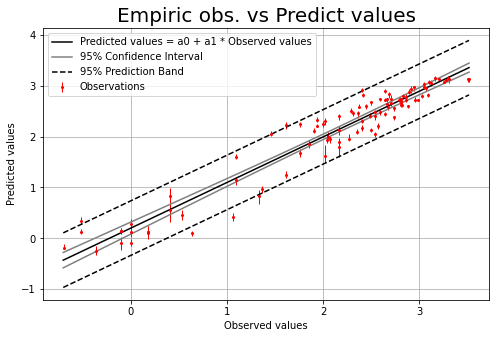

In [23]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-0.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: %_cover: mean - 0.157, median - 0.156, CI - [0.139-0.177]

SHAP-values for: mf_chm_MAX: mean - 0.329, median - 0.337, CI - [0.252-0.411]

SHAP-values for: mf_chm_MEAN: mean - 0.377, median - 0.374, CI - [0.317-0.44]



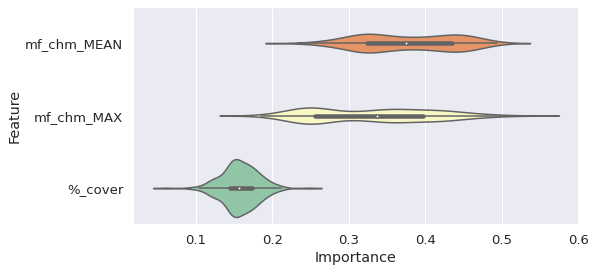

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['mf_chm_MEAN', 'mf_chm_MAX', '%_cover'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [29]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 75.625, median: 81.0,
 pred. interval (P(0.025)-P(0.975)): 44.0-96.0, 
 conf. interval (p-value=0.95): 54.811-94.546 
***
Aggregate bias statistic: 
 mean: -0.015, median: -0.007,
 pred. interval (P(0.025)-P(0.975)): -0.122-0.099, 
 conf. interval (p-value=0.95): -0.066-0.026 
***
Aggregate RMSE statistic: 
 mean: 0.29, median: 0.286, pred. interval (P(0.025)-P(0.975)): 0.215-0.414, 
 conf. interval (p-value=0.95): 0.251-0.326 
***
Aggregate MSE statistic: 
 mean: 0.086, median: 0.082, pred. interval (P(0.025)-P(0.975)): 0.046-0.171, 
 conf. interval (p-value=0.95): 0.063-0.107 
***
Aggregate R^2 statistic: 
 mean: 0.91, median: 0.92, pred. interval (P(0.025)-P(0.975)): 0.806-0.959, 
 conf. interval (p-value=0.95): 0.885-0.94 
***
Aggregate bias(%) statistic: 
 mean: -0.615, median: -0.36, pred. interval (P(0.025)-P(0.975)): -5.534-5.581, 
 conf. interval (p-value=0.95): -2.967-1.31

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

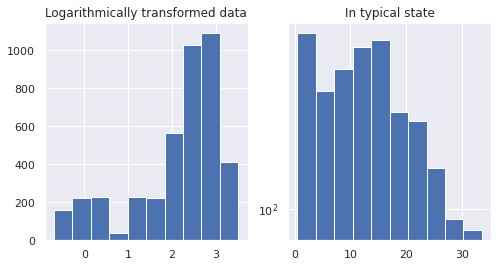

In [30]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [31]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-1, 0, 1, 2, 3])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 5, 10, 15, 20,30])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

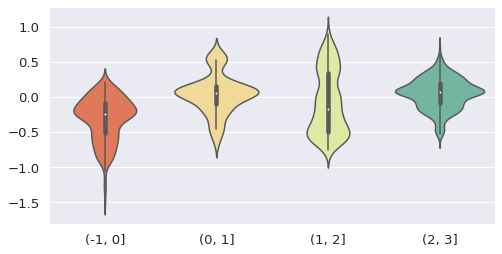

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [ ]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

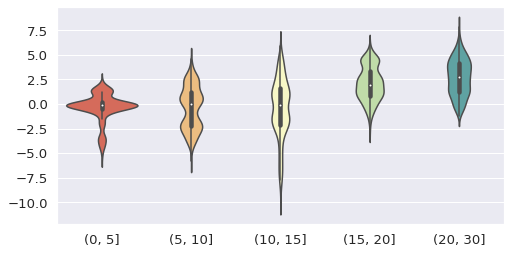

In [36]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

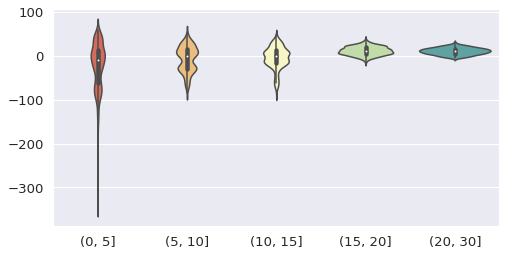

In [37]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [38]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [39]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [40]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.78395
[1]	validation_0-rmse:1.66525
[2]	validation_0-rmse:1.55737
[3]	validation_0-rmse:1.45528
[4]	validation_0-rmse:1.36072
[5]	validation_0-rmse:1.27203
[6]	validation_0-rmse:1.19010
[7]	validation_0-rmse:1.11383
[8]	validation_0-rmse:1.04309
[9]	validation_0-rmse:0.97610
[10]	validation_0-rmse:0.91523


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.85763
[12]	validation_0-rmse:0.80472
[13]	validation_0-rmse:0.75479
[14]	validation_0-rmse:0.70851
[15]	validation_0-rmse:0.66632
[16]	validation_0-rmse:0.62649
[17]	validation_0-rmse:0.59013
[18]	validation_0-rmse:0.55605
[19]	validation_0-rmse:0.52472
[20]	validation_0-rmse:0.49542
[21]	validation_0-rmse:0.46755
[22]	validation_0-rmse:0.44180
[23]	validation_0-rmse:0.41787
[24]	validation_0-rmse:0.39664
[25]	validation_0-rmse:0.37608
[26]	validation_0-rmse:0.35746
[27]	validation_0-rmse:0.34000
[28]	validation_0-rmse:0.32431
[29]	validation_0-rmse:0.30973
[30]	validation_0-rmse:0.29699
[31]	validation_0-rmse:0.28518
[32]	validation_0-rmse:0.27451
[33]	validation_0-rmse:0.26529
[34]	validation_0-rmse:0.25600
[35]	validation_0-rmse:0.24782
[36]	validation_0-rmse:0.24071
[37]	validation_0-rmse:0.23438
[38]	validation_0-rmse:0.22865
[39]	validation_0-rmse:0.22334
[40]	validation_0-rmse:0.21809
[41]	validation_0-rmse:0.21337
[42]	validation_0-rmse:0.20927
[43]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [41]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 96


In [42]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

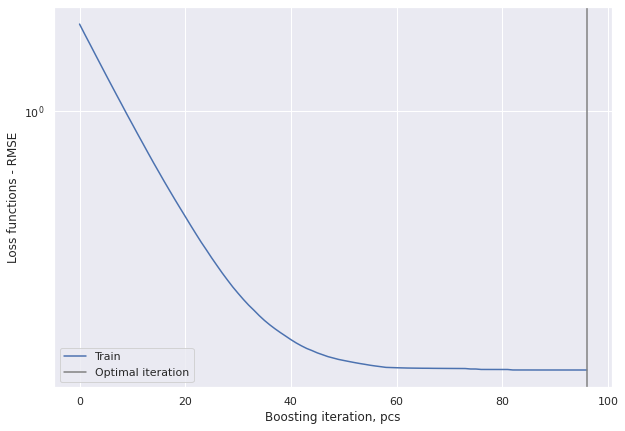

In [43]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [44]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.08
RMSE: 0.2
Relative RMSE(%):  8.541
MSE: 0.0
R square: 97.2%


In [45]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.973
Uncertainty
a0: 0.13+/-0.04
a1: 0.936+/-0.015


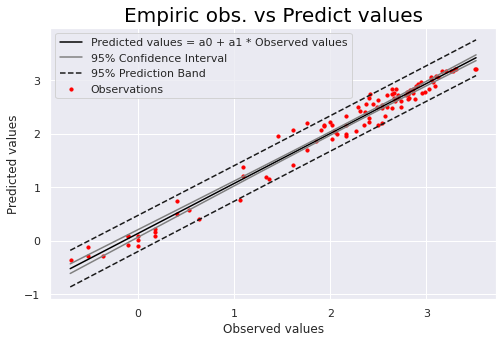

In [47]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-0.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

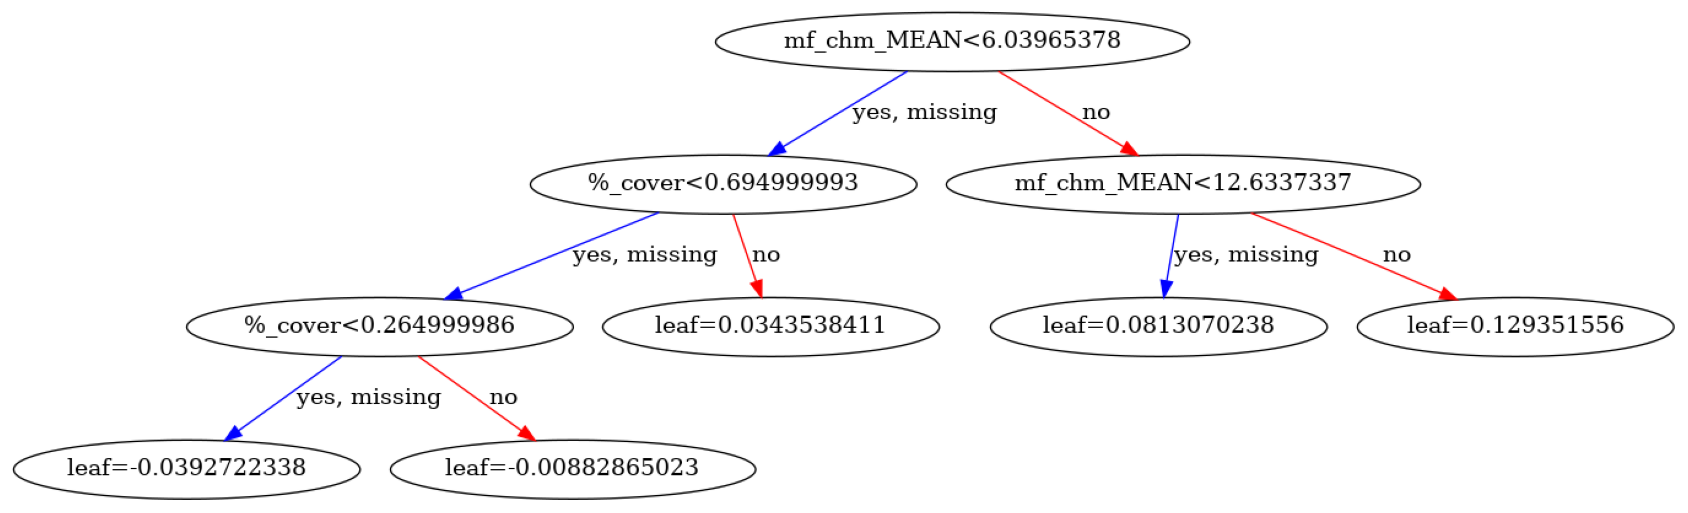

In [49]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

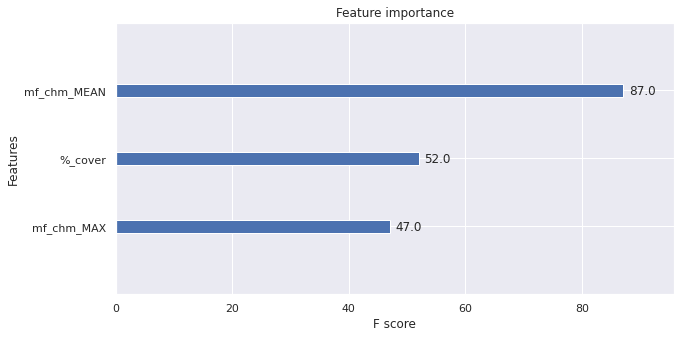

In [51]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

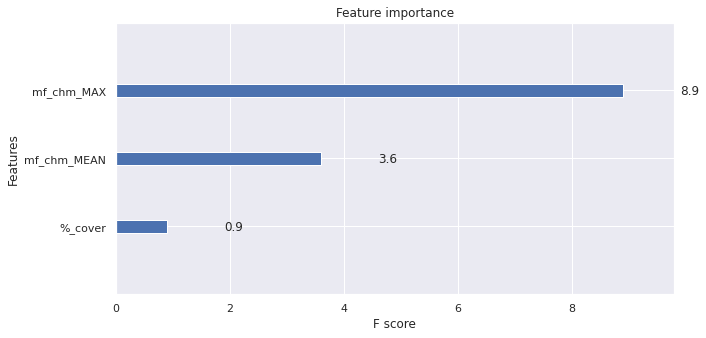

In [52]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

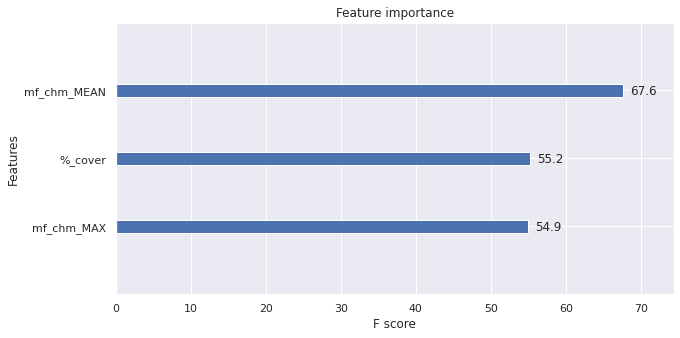

In [53]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [54]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


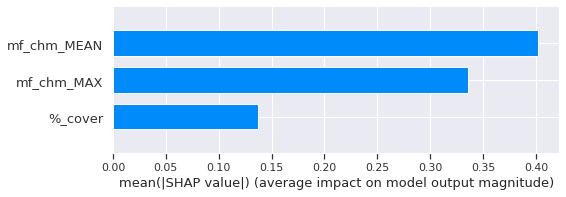

In [55]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

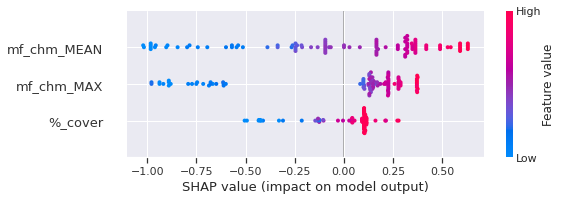

In [56]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

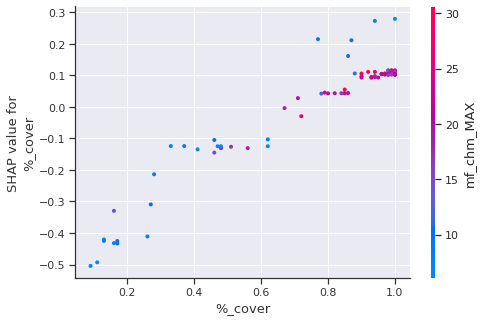

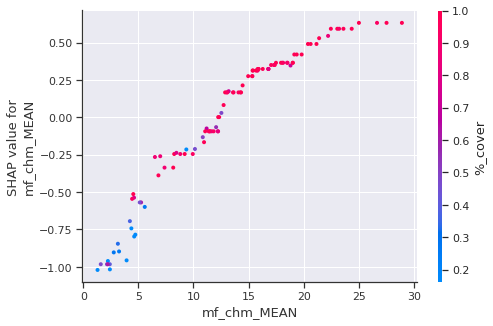

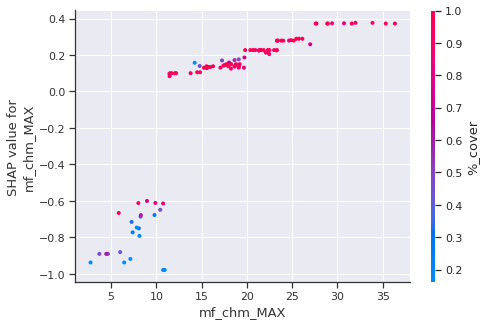

In [57]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [58]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/06_LN_M_AG_CHM_without_RGB_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/06_LN_M_AG_CHM_without_RGB_XGB_model.txt")